In [329]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [330]:
a = random.randint(-10,11)
b = random.randint(-10,11)
x1 = [0]*100
x2 = [0]*100
xout1 = [0]*1000
xout2 = [0]*1000
y = [-1]*100
yout = [-1]*1000
w = [1]*3
e_in = [0]*1000
e_in_pocket = [0]*1000
e_out = [0]*1000
e_out_pocket = [0]*1000
e_pocket = 100
w_pocket = [1]*3
incorrect = []
print("Target function x2 = ",a,"x1 -",b)
for i in range(100):
    x1[i] = random.randint(-50,51)
    x2[i] = random.randint(-50,51)
    print((x1[i],x2[i]))
    if(x2[i]-a*x1[i]-b>=0):
        y[i]=1
for i in range(1000):
    xout1[i] = random.randint(-50,51)
    xout2[i] = random.randint(-50,51)
    print((xout1[i],xout2[i]))
    if(xout2[i]-a*xout1[i]-b>=0):
        yout[i]=1
    

Target function x2 =  3 x1 - -4
(49, -31)
(-6, 41)
(-30, 4)
(32, -40)
(-10, -38)
(3, -21)
(-35, 10)
(-24, 46)
(-22, 47)
(-8, 49)
(-15, -44)
(-39, 9)
(30, -50)
(23, 26)
(2, 6)
(-48, 0)
(-3, 46)
(16, 15)
(23, 45)
(43, 11)
(24, 32)
(-8, -8)
(-33, -16)
(14, 6)
(-46, 35)
(3, -15)
(-28, -17)
(47, -17)
(46, 41)
(-47, 0)
(28, 13)
(48, 35)
(33, 20)
(19, -22)
(10, -29)
(-7, 46)
(9, 29)
(1, -21)
(-2, -30)
(36, 3)
(11, -27)
(-44, 21)
(1, 16)
(0, 0)
(-2, 20)
(-16, -34)
(-38, 20)
(-11, 30)
(-46, 7)
(-28, -1)
(-28, 42)
(-28, 14)
(40, -42)
(-9, 27)
(-18, -44)
(-8, 41)
(13, 44)
(27, 9)
(-14, 3)
(2, 3)
(29, 20)
(-42, -29)
(-27, -49)
(-12, -18)
(33, -10)
(31, 4)
(-3, -10)
(-46, 24)
(12, -46)
(-37, -2)
(3, -9)
(-30, 8)
(18, 42)
(-23, -34)
(-11, -18)
(-35, 36)
(-11, -4)
(-40, -50)
(39, -32)
(34, -26)
(1, 14)
(-3, -20)
(-5, -11)
(-50, 21)
(-21, 41)
(49, 2)
(1, -36)
(-37, -26)
(-27, 19)
(-2, 22)
(-34, -7)
(-19, -43)
(-35, 23)
(-8, -20)
(22, 47)
(7, -30)
(-7, -18)
(20, 6)
(-48, 31)
(14, 12)
(-8, -47)
(31, -41

In [331]:
swaps = random.sample(range(100),10) #generate 10 random distinct indices to swap
for i in swaps:
    y[i]=-y[i]
outswaps = random.sample(range(1000),100) #generate 10 random distinct indices to swap
for i in swaps:
    yout[i]=-yout[i]

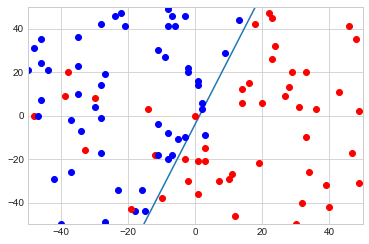

In [332]:
fig = plt.figure()
ax = plt.axes()
plt.xlim(-50, 50)
plt.ylim(-50, 50)
x = np.linspace(-50, 50, 1000)
plt.plot(x,a*x+b)
for i in range(100):
    if(y[i]==1):
        plt.plot(x1[i],x2[i],'o',color='blue')
    else:
        plt.plot(x1[i],x2[i],'o',color='red')

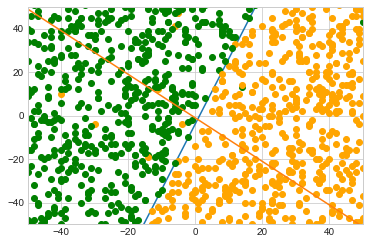

In [333]:
fig = plt.figure()
ax = plt.axes()
plt.xlim(-50, 50)
plt.ylim(-50, 50)
x = np.linspace(-50, 50, 1000)
plt.plot(x,a*x+b)
for i in range(1000):
    if(yout[i]==1):
        plt.plot(xout1[i],xout2[i],'o',color='green')
    else:
        plt.plot(xout1[i],xout2[i],'o',color='orange')
plt.plot(x,-w[1]/w[2]*x-w[0]/w[2])

In [334]:
def evaluate(x1,x2,w,y,incorrect):
    incorrect = []
    for i in range(len(x1)):
        output = np.sign(w[0]+w[1]*x1[i]+w[2]*x2[i]);
        if(y[i]!=output):
            incorrect.append(i)
    return incorrect

In [335]:
def evaluate_out(x1,x2,w,y):
    count=0
    for i in range(len(x1)):
        output = np.sign(w[0]+w[1]*x1[i]+w[2]*x2[i]);
        if(y[i]!=output):
            count+=1
    return count

In [336]:
incorrect = evaluate(x1,x2,w,y,incorrect)
for k in range(20):
    w = [1]*3
    w_pocket = [1]*3
    e_pocket = 100
    for i in range(1000):
        index = random.choice(incorrect)
        w[0] = w[0] + y[index]
        w[1] = w[1] + y[index]*x1[index]
        w[2] = w[2] + y[index]*x2[index]
        incorrect = evaluate(x1,x2,w,y,incorrect)
        e_in[i]+=len(incorrect)
        e_out[i]+=evaluate_out(xout1,xout2,w,yout)
        if(len(incorrect)<e_pocket):
            e_pocket = len(incorrect)
            for j in range(3):
                w_pocket[j] = w[j]
        e_in_pocket[i]+=e_pocket
        e_out_pocket[i]+=evaluate_out(xout1,xout2,w_pocket,yout)
        print("After ",i+1, "iterations")
        print("E_in(w), E_in(w hat): ",len(incorrect), " ", e_pocket)
        print(e_in[i], " ", e_in_pocket[i])
        print("w: ",w)
        print("w hat: ",w_pocket)
#e_in = np.true_divide(e_in,20)
#e_in_pocket = np.true_divide(e_out_pocket,20)
#e_out = np.true_divide(e_in,20)
#e_out_pocket = np.true_divide(e_out_pocket,20)

After  1 iterations
E_in(w), E_in(w hat):  53   53
53   53
w:  [2, -15, -33]
w hat:  [2, -15, -33]
After  2 iterations
E_in(w), E_in(w hat):  18   18
18   18
w:  [3, -50, 3]
w hat:  [3, -50, 3]
After  3 iterations
E_in(w), E_in(w hat):  21   18
21   18
w:  [2, -38, 21]
w hat:  [3, -50, 3]
After  4 iterations
E_in(w), E_in(w hat):  15   15
15   15
w:  [3, -43, 10]
w hat:  [3, -43, 10]
After  5 iterations
E_in(w), E_in(w hat):  15   15
15   15
w:  [2, -4, 1]
w hat:  [3, -43, 10]
After  6 iterations
E_in(w), E_in(w hat):  34   15
34   15
w:  [3, -2, 4]
w hat:  [3, -43, 10]
After  7 iterations
E_in(w), E_in(w hat):  51   15
51   15
w:  [2, -25, -41]
w hat:  [3, -43, 10]
After  8 iterations
E_in(w), E_in(w hat):  60   15
60   15
w:  [1, 5, -49]
w hat:  [3, -43, 10]
After  9 iterations
E_in(w), E_in(w hat):  39   15
39   15
w:  [2, -45, -28]
w hat:  [3, -43, 10]
After  10 iterations
E_in(w), E_in(w hat):  13   13
13   13
w:  [1, -57, 18]
w hat:  [1, -57, 18]
After  11 iterations
E_in(w), E_i

E_in(w), E_in(w hat):  31   12
31   12
w:  [9, -25, 36]
w hat:  [2, -39, 13]
After  89 iterations
E_in(w), E_in(w hat):  29   12
29   12
w:  [10, -40, -8]
w hat:  [2, -39, 13]
After  90 iterations
E_in(w), E_in(w hat):  21   12
21   12
w:  [11, -38, -2]
w hat:  [2, -39, 13]
After  91 iterations
E_in(w), E_in(w hat):  20   12
20   12
w:  [10, -26, 16]
w hat:  [2, -39, 13]
After  92 iterations
E_in(w), E_in(w hat):  20   12
20   12
w:  [9, -26, 16]
w hat:  [2, -39, 13]
After  93 iterations
E_in(w), E_in(w hat):  40   12
40   12
w:  [10, -41, -28]
w hat:  [2, -39, 13]
After  94 iterations
E_in(w), E_in(w hat):  33   12
33   12
w:  [9, -29, -10]
w hat:  [2, -39, 13]
After  95 iterations
E_in(w), E_in(w hat):  34   12
34   12
w:  [10, -16, 34]
w hat:  [2, -39, 13]
After  96 iterations
E_in(w), E_in(w hat):  16   12
16   12
w:  [11, -58, 5]
w hat:  [2, -39, 13]
After  97 iterations
E_in(w), E_in(w hat):  16   12
16   12
w:  [10, -58, 5]
w hat:  [2, -39, 13]
After  98 iterations
E_in(w), E_in

After  222 iterations
E_in(w), E_in(w hat):  33   12
33   12
w:  [-23, -11, -4]
w hat:  [2, -39, 13]
After  223 iterations
E_in(w), E_in(w hat):  26   12
26   12
w:  [-22, -10, 12]
w hat:  [2, -39, 13]
After  224 iterations
E_in(w), E_in(w hat):  43   12
43   12
w:  [-21, -37, -37]
w hat:  [2, -39, 13]
After  225 iterations
E_in(w), E_in(w hat):  14   12
14   12
w:  [-22, -49, 9]
w hat:  [2, -39, 13]
After  226 iterations
E_in(w), E_in(w hat):  17   12
17   12
w:  [-23, -19, 1]
w hat:  [2, -39, 13]
After  227 iterations
E_in(w), E_in(w hat):  75   12
75   12
w:  [-24, 19, -19]
w hat:  [2, -39, 13]
After  228 iterations
E_in(w), E_in(w hat):  46   12
46   12
w:  [-23, -11, -15]
w hat:  [2, -39, 13]
After  229 iterations
E_in(w), E_in(w hat):  76   12
76   12
w:  [-24, 28, -24]
w hat:  [2, -39, 13]
After  230 iterations
E_in(w), E_in(w hat):  56   12
56   12
w:  [-23, 21, 22]
w hat:  [2, -39, 13]
After  231 iterations
E_in(w), E_in(w hat):  53   12
53   12
w:  [-22, -6, -27]
w hat:  [2, 

After  373 iterations
E_in(w), E_in(w hat):  13   12
13   12
w:  [-32, -67, 24]
w hat:  [2, -39, 13]
After  374 iterations
E_in(w), E_in(w hat):  26   12
26   12
w:  [-33, -34, 40]
w hat:  [2, -39, 13]
After  375 iterations
E_in(w), E_in(w hat):  44   12
44   12
w:  [-34, -1, 56]
w hat:  [2, -39, 13]
After  376 iterations
E_in(w), E_in(w hat):  43   12
43   12
w:  [-35, 13, 53]
w hat:  [2, -39, 13]
After  377 iterations
E_in(w), E_in(w hat):  16   12
16   12
w:  [-34, -27, 3]
w hat:  [2, -39, 13]
After  378 iterations
E_in(w), E_in(w hat):  85   12
85   12
w:  [-35, 12, -6]
w hat:  [2, -39, 13]
After  379 iterations
E_in(w), E_in(w hat):  48   12
48   12
w:  [-34, -16, -23]
w hat:  [2, -39, 13]
After  380 iterations
E_in(w), E_in(w hat):  21   12
21   12
w:  [-33, -24, 18]
w hat:  [2, -39, 13]
After  381 iterations
E_in(w), E_in(w hat):  44   12
44   12
w:  [-34, 9, 34]
w hat:  [2, -39, 13]
After  382 iterations
E_in(w), E_in(w hat):  14   12
14   12
w:  [-33, -28, 8]
w hat:  [2, -39, 

E_in(w), E_in(w hat):  66   12
66   12
w:  [-41, 27, -53]
w hat:  [2, -39, 13]
After  455 iterations
E_in(w), E_in(w hat):  86   12
86   12
w:  [-42, 15, -7]
w hat:  [2, -39, 13]
After  456 iterations
E_in(w), E_in(w hat):  54   12
54   12
w:  [-41, 28, 37]
w hat:  [2, -39, 13]
After  457 iterations
E_in(w), E_in(w hat):  53   12
53   12
w:  [-40, 20, 29]
w hat:  [2, -39, 13]
After  458 iterations
E_in(w), E_in(w hat):  58   12
58   12
w:  [-39, 13, 11]
w hat:  [2, -39, 13]
After  459 iterations
E_in(w), E_in(w hat):  40   12
40   12
w:  [-40, -33, -30]
w hat:  [2, -39, 13]
After  460 iterations
E_in(w), E_in(w hat):  14   12
14   12
w:  [-39, -61, 12]
w hat:  [2, -39, 13]
After  461 iterations
E_in(w), E_in(w hat):  17   12
17   12
w:  [-40, -22, 3]
w hat:  [2, -39, 13]
After  462 iterations
E_in(w), E_in(w hat):  21   12
21   12
w:  [-41, -8, 0]
w hat:  [2, -39, 13]
After  463 iterations
E_in(w), E_in(w hat):  34   12
34   12
w:  [-40, -7, 16]
w hat:  [2, -39, 13]
After  464 iteratio

w:  [-36, -31, 58]
w hat:  [2, -39, 13]
After  600 iterations
E_in(w), E_in(w hat):  33   12
33   12
w:  [-35, -28, 49]
w hat:  [2, -39, 13]
After  601 iterations
E_in(w), E_in(w hat):  26   12
26   12
w:  [-34, -33, 38]
w hat:  [2, -39, 13]
After  602 iterations
E_in(w), E_in(w hat):  26   12
26   12
w:  [-35, -55, -9]
w hat:  [2, -39, 13]
After  603 iterations
E_in(w), E_in(w hat):  50   12
50   12
w:  [-36, -17, -29]
w hat:  [2, -39, 13]
After  604 iterations
E_in(w), E_in(w hat):  45   12
45   12
w:  [-37, 2, 14]
w hat:  [2, -39, 13]
After  605 iterations
E_in(w), E_in(w hat):  24   12
24   12
w:  [-36, -26, -3]
w hat:  [2, -39, 13]
After  606 iterations
E_in(w), E_in(w hat):  37   12
37   12
w:  [-35, -23, -12]
w hat:  [2, -39, 13]
After  607 iterations
E_in(w), E_in(w hat):  25   12
25   12
w:  [-34, -31, 29]
w hat:  [2, -39, 13]
After  608 iterations
E_in(w), E_in(w hat):  17   12
17   12
w:  [-35, -54, 3]
w hat:  [2, -39, 13]
After  609 iterations
E_in(w), E_in(w hat):  27   12

34   12
w:  [-33, -39, -16]
w hat:  [2, -39, 13]
After  747 iterations
E_in(w), E_in(w hat):  66   12
66   12
w:  [-34, 9, -16]
w hat:  [2, -39, 13]
After  748 iterations
E_in(w), E_in(w hat):  15   12
15   12
w:  [-33, -41, 5]
w hat:  [2, -39, 13]
After  749 iterations
E_in(w), E_in(w hat):  14   12
14   12
w:  [-32, -39, 11]
w hat:  [2, -39, 13]
After  750 iterations
E_in(w), E_in(w hat):  35   12
35   12
w:  [-33, -20, 54]
w hat:  [2, -39, 13]
After  751 iterations
E_in(w), E_in(w hat):  49   12
49   12
w:  [-34, 18, 34]
w hat:  [2, -39, 13]
After  752 iterations
E_in(w), E_in(w hat):  52   12
52   12
w:  [-35, -4, -13]
w hat:  [2, -39, 13]
After  753 iterations
E_in(w), E_in(w hat):  13   12
13   12
w:  [-36, -53, 18]
w hat:  [2, -39, 13]
After  754 iterations
E_in(w), E_in(w hat):  14   12
14   12
w:  [-35, -50, 9]
w hat:  [2, -39, 13]
After  755 iterations
E_in(w), E_in(w hat):  32   12
32   12
w:  [-36, -31, 52]
w hat:  [2, -39, 13]
After  756 iterations
E_in(w), E_in(w hat):  1

w:  [-43, -26, 19]
w hat:  [2, -39, 13]
After  903 iterations
E_in(w), E_in(w hat):  17   12
17   12
w:  [-42, -23, 10]
w hat:  [2, -39, 13]
After  904 iterations
E_in(w), E_in(w hat):  40   12
40   12
w:  [-41, -38, -34]
w hat:  [2, -39, 13]
After  905 iterations
E_in(w), E_in(w hat):  15   12
15   12
w:  [-42, -50, 12]
w hat:  [2, -39, 13]
After  906 iterations
E_in(w), E_in(w hat):  14   12
14   12
w:  [-41, -48, 15]
w hat:  [2, -39, 13]
After  907 iterations
E_in(w), E_in(w hat):  43   12
43   12
w:  [-42, 0, 15]
w hat:  [2, -39, 13]
After  908 iterations
E_in(w), E_in(w hat):  25   12
25   12
w:  [-41, -5, 4]
w hat:  [2, -39, 13]
After  909 iterations
E_in(w), E_in(w hat):  30   12
30   12
w:  [-40, -13, -4]
w hat:  [2, -39, 13]
After  910 iterations
E_in(w), E_in(w hat):  45   12
45   12
w:  [-39, -10, -13]
w hat:  [2, -39, 13]
After  911 iterations
E_in(w), E_in(w hat):  33   12
33   12
w:  [-40, -11, 23]
w hat:  [2, -39, 13]
After  912 iterations
E_in(w), E_in(w hat):  34   12


w hat:  [-2, -65, 21]
After  61 iterations
E_in(w), E_in(w hat):  35   12
69   24
w:  [-2, -6, -3]
w hat:  [-2, -65, 21]
After  62 iterations
E_in(w), E_in(w hat):  46   12
78   24
w:  [-3, 6, 15]
w hat:  [-2, -65, 21]
After  63 iterations
E_in(w), E_in(w hat):  27   12
42   24
w:  [-4, -27, -5]
w hat:  [-2, -65, 21]
After  64 iterations
E_in(w), E_in(w hat):  38   12
70   24
w:  [-5, -8, 38]
w hat:  [-2, -65, 21]
After  65 iterations
E_in(w), E_in(w hat):  15   12
36   24
w:  [-4, -31, 4]
w hat:  [-2, -65, 21]
After  66 iterations
E_in(w), E_in(w hat):  13   12
25   24
w:  [-3, -29, 10]
w hat:  [-2, -65, 21]
After  67 iterations
E_in(w), E_in(w hat):  74   12
123   24
w:  [-4, 9, -10]
w hat:  [-2, -65, 21]
After  68 iterations
E_in(w), E_in(w hat):  33   12
68   24
w:  [-5, -21, 40]
w hat:  [-2, -65, 21]
After  69 iterations
E_in(w), E_in(w hat):  27   12
49   24
w:  [-6, -43, -7]
w hat:  [-2, -65, 21]
After  70 iterations
E_in(w), E_in(w hat):  14   12
29   24
w:  [-5, -45, 13]
w hat

After  216 iterations
E_in(w), E_in(w hat):  15   12
70   24
w:  [-11, -98, 9]
w hat:  [-2, -65, 21]
After  217 iterations
E_in(w), E_in(w hat):  18   12
40   24
w:  [-12, -59, 0]
w hat:  [-2, -65, 21]
After  218 iterations
E_in(w), E_in(w hat):  13   12
73   24
w:  [-11, -58, 16]
w hat:  [-2, -65, 21]
After  219 iterations
E_in(w), E_in(w hat):  14   12
40   24
w:  [-12, -28, 8]
w hat:  [-2, -65, 21]
After  220 iterations
E_in(w), E_in(w hat):  72   12
121   24
w:  [-13, 10, -12]
w hat:  [-2, -65, 21]
After  221 iterations
E_in(w), E_in(w hat):  23   12
76   24
w:  [-14, -23, -2]
w hat:  [-2, -65, 21]
After  222 iterations
E_in(w), E_in(w hat):  20   12
53   24
w:  [-13, -22, 14]
w hat:  [-2, -65, 21]
After  223 iterations
E_in(w), E_in(w hat):  39   12
65   24
w:  [-14, -44, -33]
w hat:  [-2, -65, 21]
After  224 iterations
E_in(w), E_in(w hat):  15   12
58   24
w:  [-13, -72, 9]
w hat:  [-2, -65, 21]
After  225 iterations
E_in(w), E_in(w hat):  15   12
29   24
w:  [-14, -69, 29]
w ha

w:  [-31, -54, 38]
w hat:  [-2, -65, 21]
After  303 iterations
E_in(w), E_in(w hat):  13   12
43   24
w:  [-30, -65, 20]
w hat:  [-2, -65, 21]
After  304 iterations
E_in(w), E_in(w hat):  18   12
56   24
w:  [-31, -27, 0]
w hat:  [-2, -65, 21]
After  305 iterations
E_in(w), E_in(w hat):  32   12
46   24
w:  [-32, -17, 38]
w hat:  [-2, -65, 21]
After  306 iterations
E_in(w), E_in(w hat):  28   12
59   24
w:  [-31, -57, -12]
w hat:  [-2, -65, 21]
After  307 iterations
E_in(w), E_in(w hat):  14   12
34   24
w:  [-32, -58, 9]
w hat:  [-2, -65, 21]
After  308 iterations
E_in(w), E_in(w hat):  14   12
35   24
w:  [-33, -44, 6]
w hat:  [-2, -65, 21]
After  309 iterations
E_in(w), E_in(w hat):  33   12
58   24
w:  [-34, -11, 22]
w hat:  [-2, -65, 21]
After  310 iterations
E_in(w), E_in(w hat):  32   12
65   24
w:  [-35, -57, -19]
w hat:  [-2, -65, 21]
After  311 iterations
E_in(w), E_in(w hat):  23   12
37   24
w:  [-34, -56, -5]
w hat:  [-2, -65, 21]
After  312 iterations
E_in(w), E_in(w hat)

After  455 iterations
E_in(w), E_in(w hat):  37   12
123   24
w:  [-36, -35, -21]
w hat:  [-2, -65, 21]
After  456 iterations
E_in(w), E_in(w hat):  18   12
72   24
w:  [-37, -38, 0]
w hat:  [-2, -65, 21]
After  457 iterations
E_in(w), E_in(w hat):  33   12
86   24
w:  [-38, -19, 43]
w hat:  [-2, -65, 21]
After  458 iterations
E_in(w), E_in(w hat):  20   12
78   24
w:  [-37, -47, 26]
w hat:  [-2, -65, 21]
After  459 iterations
E_in(w), E_in(w hat):  31   12
71   24
w:  [-36, -62, -18]
w hat:  [-2, -65, 21]
After  460 iterations
E_in(w), E_in(w hat):  43   12
57   24
w:  [-37, -23, -27]
w hat:  [-2, -65, 21]
After  461 iterations
E_in(w), E_in(w hat):  38   12
55   24
w:  [-36, -22, -11]
w hat:  [-2, -65, 21]
After  462 iterations
E_in(w), E_in(w hat):  25   12
46   24
w:  [-37, -34, 35]
w hat:  [-2, -65, 21]
After  463 iterations
E_in(w), E_in(w hat):  28   12
62   24
w:  [-36, -49, -9]
w hat:  [-2, -65, 21]
After  464 iterations
E_in(w), E_in(w hat):  51   12
94   24
w:  [-37, -10, -1

w:  [-44, -77, 11]
w hat:  [-2, -65, 21]
After  584 iterations
E_in(w), E_in(w hat):  21   12
65   24
w:  [-45, -67, 49]
w hat:  [-2, -65, 21]
After  585 iterations
E_in(w), E_in(w hat):  33   12
65   24
w:  [-46, -34, 65]
w hat:  [-2, -65, 21]
After  586 iterations
E_in(w), E_in(w hat):  41   12
59   24
w:  [-47, -4, 57]
w hat:  [-2, -65, 21]
After  587 iterations
E_in(w), E_in(w hat):  25   12
56   24
w:  [-48, -37, 37]
w hat:  [-2, -65, 21]
After  588 iterations
E_in(w), E_in(w hat):  20   12
37   24
w:  [-47, -45, 29]
w hat:  [-2, -65, 21]
After  589 iterations
E_in(w), E_in(w hat):  28   12
69   24
w:  [-48, -63, -13]
w hat:  [-2, -65, 21]
After  590 iterations
E_in(w), E_in(w hat):  15   12
82   24
w:  [-49, -66, 8]
w hat:  [-2, -65, 21]
After  591 iterations
E_in(w), E_in(w hat):  24   12
48   24
w:  [-48, -53, 52]
w hat:  [-2, -65, 21]
After  592 iterations
E_in(w), E_in(w hat):  33   12
60   24
w:  [-49, -23, 44]
w hat:  [-2, -65, 21]
After  593 iterations
E_in(w), E_in(w hat)

w:  [-47, -3, -17]
w hat:  [-2, -65, 21]
After  667 iterations
E_in(w), E_in(w hat):  39   12
53   24
w:  [-46, -6, 29]
w hat:  [-2, -65, 21]
After  668 iterations
E_in(w), E_in(w hat):  17   12
31   24
w:  [-45, -34, 12]
w hat:  [-2, -65, 21]
After  669 iterations
E_in(w), E_in(w hat):  26   12
59   24
w:  [-44, -41, -6]
w hat:  [-2, -65, 21]
After  670 iterations
E_in(w), E_in(w hat):  15   12
50   24
w:  [-43, -40, 8]
w hat:  [-2, -65, 21]
After  671 iterations
E_in(w), E_in(w hat):  26   12
69   24
w:  [-42, -31, 37]
w hat:  [-2, -65, 21]
After  672 iterations
E_in(w), E_in(w hat):  23   12
37   24
w:  [-43, -49, -5]
w hat:  [-2, -65, 21]
After  673 iterations
E_in(w), E_in(w hat):  39   12
71   24
w:  [-44, -19, -13]
w hat:  [-2, -65, 21]
After  674 iterations
E_in(w), E_in(w hat):  26   12
43   24
w:  [-43, -26, 33]
w hat:  [-2, -65, 21]
After  675 iterations
E_in(w), E_in(w hat):  56   12
73   24
w:  [-44, 12, 13]
w hat:  [-2, -65, 21]
After  676 iterations
E_in(w), E_in(w hat):

70   24
w:  [-42, -57, -3]
w hat:  [-2, -65, 21]
After  810 iterations
E_in(w), E_in(w hat):  17   12
42   24
w:  [-41, -55, 3]
w hat:  [-2, -65, 21]
After  811 iterations
E_in(w), E_in(w hat):  14   12
57   24
w:  [-40, -54, 19]
w hat:  [-2, -65, 21]
After  812 iterations
E_in(w), E_in(w hat):  18   12
88   24
w:  [-39, -61, 1]
w hat:  [-2, -65, 21]
After  813 iterations
E_in(w), E_in(w hat):  17   12
93   24
w:  [-38, -59, 4]
w hat:  [-2, -65, 21]
After  814 iterations
E_in(w), E_in(w hat):  14   12
42   24
w:  [-37, -57, 7]
w hat:  [-2, -65, 21]
After  815 iterations
E_in(w), E_in(w hat):  15   12
61   24
w:  [-36, -55, 13]
w hat:  [-2, -65, 21]
After  816 iterations
E_in(w), E_in(w hat):  21   12
55   24
w:  [-37, -43, 31]
w hat:  [-2, -65, 21]
After  817 iterations
E_in(w), E_in(w hat):  28   12
61   24
w:  [-36, -61, -13]
w hat:  [-2, -65, 21]
After  818 iterations
E_in(w), E_in(w hat):  16   12
43   24
w:  [-35, -63, 7]
w hat:  [-2, -65, 21]
After  819 iterations
E_in(w), E_in(w

E_in(w), E_in(w hat):  17   12
42   24
w:  [-23, -68, 4]
w hat:  [-2, -65, 21]
After  957 iterations
E_in(w), E_in(w hat):  14   12
28   24
w:  [-22, -67, 18]
w hat:  [-2, -65, 21]
After  958 iterations
E_in(w), E_in(w hat):  13   12
45   24
w:  [-23, -28, 9]
w hat:  [-2, -65, 21]
After  959 iterations
E_in(w), E_in(w hat):  21   12
38   24
w:  [-22, -26, 15]
w hat:  [-2, -65, 21]
After  960 iterations
E_in(w), E_in(w hat):  14   12
42   24
w:  [-21, -31, 4]
w hat:  [-2, -65, 21]
After  961 iterations
E_in(w), E_in(w hat):  35   12
53   24
w:  [-20, -18, 48]
w hat:  [-2, -65, 21]
After  962 iterations
E_in(w), E_in(w hat):  33   12
54   24
w:  [-19, -21, 38]
w hat:  [-2, -65, 21]
After  963 iterations
E_in(w), E_in(w hat):  19   12
38   24
w:  [-20, -67, -3]
w hat:  [-2, -65, 21]
After  964 iterations
E_in(w), E_in(w hat):  21   12
43   24
w:  [-21, -57, 35]
w hat:  [-2, -65, 21]
After  965 iterations
E_in(w), E_in(w hat):  23   12
37   24
w:  [-20, -75, -9]
w hat:  [-2, -65, 21]
After

w:  [-15, -38, 1]
w hat:  [-3, -52, 19]
After  103 iterations
E_in(w), E_in(w hat):  77   12
115   36
w:  [-16, 10, 1]
w hat:  [-3, -52, 19]
After  104 iterations
E_in(w), E_in(w hat):  24   12
84   36
w:  [-15, -25, 24]
w hat:  [-3, -52, 19]
After  105 iterations
E_in(w), E_in(w hat):  15   12
50   36
w:  [-14, -33, 4]
w hat:  [-3, -52, 19]
After  106 iterations
E_in(w), E_in(w hat):  13   12
39   36
w:  [-13, -31, 10]
w hat:  [-3, -52, 19]
After  107 iterations
E_in(w), E_in(w hat):  17   12
90   36
w:  [-14, -17, 7]
w hat:  [-3, -52, 19]
After  108 iterations
E_in(w), E_in(w hat):  83   12
125   36
w:  [-15, 13, -1]
w hat:  [-3, -52, 19]
After  109 iterations
E_in(w), E_in(w hat):  69   12
108   36
w:  [-14, 8, -12]
w hat:  [-3, -52, 19]
After  110 iterations
E_in(w), E_in(w hat):  39   12
113   36
w:  [-15, -2, 17]
w hat:  [-3, -52, 19]
After  111 iterations
E_in(w), E_in(w hat):  45   12
78   36
w:  [-14, 1, 8]
w hat:  [-3, -52, 19]
After  112 iterations
E_in(w), E_in(w hat):  81 

w:  [-19, -29, 3]
w hat:  [-3, -52, 19]
After  265 iterations
E_in(w), E_in(w hat):  44   12
127   36
w:  [-20, 4, 19]
w hat:  [-3, -52, 19]
After  266 iterations
E_in(w), E_in(w hat):  81   12
146   36
w:  [-21, 42, -1]
w hat:  [-3, -52, 19]
After  267 iterations
E_in(w), E_in(w hat):  38   12
92   36
w:  [-22, -7, 30]
w hat:  [-3, -52, 19]
After  268 iterations
E_in(w), E_in(w hat):  25   12
60   36
w:  [-23, -21, 24]
w hat:  [-3, -52, 19]
After  269 iterations
E_in(w), E_in(w hat):  37   12
85   36
w:  [-22, -39, -20]
w hat:  [-3, -52, 19]
After  270 iterations
E_in(w), E_in(w hat):  22   12
104   36
w:  [-23, -27, -2]
w hat:  [-3, -52, 19]
After  271 iterations
E_in(w), E_in(w hat):  64   12
122   36
w:  [-24, 11, -22]
w hat:  [-3, -52, 19]
After  272 iterations
E_in(w), E_in(w hat):  15   12
97   36
w:  [-23, -35, 13]
w hat:  [-3, -52, 19]
After  273 iterations
E_in(w), E_in(w hat):  26   12
79   36
w:  [-22, -43, -7]
w hat:  [-3, -52, 19]
After  274 iterations
E_in(w), E_in(w hat

E_in(w), E_in(w hat):  32   12
64   36
w:  [-21, -42, 69]
w hat:  [-3, -52, 19]
After  421 iterations
E_in(w), E_in(w hat):  14   12
64   36
w:  [-20, -69, 20]
w hat:  [-3, -52, 19]
After  422 iterations
E_in(w), E_in(w hat):  18   12
63   36
w:  [-21, -31, 0]
w hat:  [-3, -52, 19]
After  423 iterations
E_in(w), E_in(w hat):  17   12
81   36
w:  [-20, -30, 14]
w hat:  [-3, -52, 19]
After  424 iterations
E_in(w), E_in(w hat):  34   12
127   36
w:  [-19, -46, -20]
w hat:  [-3, -52, 19]
After  425 iterations
E_in(w), E_in(w hat):  18   12
136   36
w:  [-18, -53, 26]
w hat:  [-3, -52, 19]
After  426 iterations
E_in(w), E_in(w hat):  21   12
105   36
w:  [-19, -39, 23]
w hat:  [-3, -52, 19]
After  427 iterations
E_in(w), E_in(w hat):  13   12
140   36
w:  [-18, -42, 13]
w hat:  [-3, -52, 19]
After  428 iterations
E_in(w), E_in(w hat):  14   12
93   36
w:  [-19, -28, 10]
w hat:  [-3, -52, 19]
After  429 iterations
E_in(w), E_in(w hat):  18   12
76   36
w:  [-18, -25, 1]
w hat:  [-3, -52, 19]

After  563 iterations
E_in(w), E_in(w hat):  38   12
99   36
w:  [-18, -8, 36]
w hat:  [-3, -52, 19]
After  564 iterations
E_in(w), E_in(w hat):  19   12
91   36
w:  [-17, -36, 19]
w hat:  [-3, -52, 19]
After  565 iterations
E_in(w), E_in(w hat):  20   12
100   36
w:  [-16, -34, 22]
w hat:  [-3, -52, 19]
After  566 iterations
E_in(w), E_in(w hat):  44   12
118   36
w:  [-17, -1, 38]
w hat:  [-3, -52, 19]
After  567 iterations
E_in(w), E_in(w hat):  27   12
109   36
w:  [-18, -17, 23]
w hat:  [-3, -52, 19]
After  568 iterations
E_in(w), E_in(w hat):  14   12
102   36
w:  [-17, -24, 5]
w hat:  [-3, -52, 19]
After  569 iterations
E_in(w), E_in(w hat):  16   12
142   36
w:  [-18, -10, 2]
w hat:  [-3, -52, 19]
After  570 iterations
E_in(w), E_in(w hat):  88   12
137   36
w:  [-19, 4, -1]
w hat:  [-3, -52, 19]
After  571 iterations
E_in(w), E_in(w hat):  50   12
174   36
w:  [-20, -20, -33]
w hat:  [-3, -52, 19]
After  572 iterations
E_in(w), E_in(w hat):  13   12
81   36
w:  [-19, -42, 14]


E_in(w), E_in(w hat):  14   12
46   36
w:  [-19, -29, 9]
w hat:  [-3, -52, 19]
After  721 iterations
E_in(w), E_in(w hat):  17   12
57   36
w:  [-18, -27, 12]
w hat:  [-3, -52, 19]
After  722 iterations
E_in(w), E_in(w hat):  44   12
99   36
w:  [-19, 6, 28]
w hat:  [-3, -52, 19]
After  723 iterations
E_in(w), E_in(w hat):  62   12
130   36
w:  [-20, 36, 20]
w hat:  [-3, -52, 19]
After  724 iterations
E_in(w), E_in(w hat):  44   12
94   36
w:  [-21, 3, 30]
w hat:  [-3, -52, 19]
After  725 iterations
E_in(w), E_in(w hat):  23   12
55   36
w:  [-22, -24, 21]
w hat:  [-3, -52, 19]
After  726 iterations
E_in(w), E_in(w hat):  18   12
53   36
w:  [-21, -32, 1]
w hat:  [-3, -52, 19]
After  727 iterations
E_in(w), E_in(w hat):  31   12
97   36
w:  [-20, -29, -8]
w hat:  [-3, -52, 19]
After  728 iterations
E_in(w), E_in(w hat):  49   12
127   36
w:  [-21, 4, 8]
w hat:  [-3, -52, 19]
After  729 iterations
E_in(w), E_in(w hat):  34   12
115   36
w:  [-20, -24, -9]
w hat:  [-3, -52, 19]
After  73

E_in(w), E_in(w hat):  21   12
69   36
w:  [-24, -24, 17]
w hat:  [-3, -52, 19]
After  804 iterations
E_in(w), E_in(w hat):  38   12
78   36
w:  [-25, -46, -30]
w hat:  [-3, -52, 19]
After  805 iterations
E_in(w), E_in(w hat):  27   12
80   36
w:  [-24, -48, -8]
w hat:  [-3, -52, 19]
After  806 iterations
E_in(w), E_in(w hat):  53   12
102   36
w:  [-25, -10, -28]
w hat:  [-3, -52, 19]
After  807 iterations
E_in(w), E_in(w hat):  46   12
82   36
w:  [-24, -9, -12]
w hat:  [-3, -52, 19]
After  808 iterations
E_in(w), E_in(w hat):  22   12
90   36
w:  [-25, -12, 9]
w hat:  [-3, -52, 19]
After  809 iterations
E_in(w), E_in(w hat):  43   12
113   36
w:  [-24, -39, -40]
w hat:  [-3, -52, 19]
After  810 iterations
E_in(w), E_in(w hat):  34   12
76   36
w:  [-23, -41, -18]
w hat:  [-3, -52, 19]
After  811 iterations
E_in(w), E_in(w hat):  15   12
72   36
w:  [-24, -48, 12]
w hat:  [-3, -52, 19]
After  812 iterations
E_in(w), E_in(w hat):  43   12
131   36
w:  [-25, 0, 12]
w hat:  [-3, -52, 19

w hat:  [-3, -52, 19]
After  956 iterations
E_in(w), E_in(w hat):  14   12
56   36
w:  [-41, -45, 15]
w hat:  [-3, -52, 19]
After  957 iterations
E_in(w), E_in(w hat):  39   12
67   36
w:  [-42, -7, -5]
w hat:  [-3, -52, 19]
After  958 iterations
E_in(w), E_in(w hat):  35   12
80   36
w:  [-41, -15, 44]
w hat:  [-3, -52, 19]
After  959 iterations
E_in(w), E_in(w hat):  18   12
56   36
w:  [-40, -30, 0]
w hat:  [-3, -52, 19]
After  960 iterations
E_in(w), E_in(w hat):  33   12
75   36
w:  [-41, -20, 38]
w hat:  [-3, -52, 19]
After  961 iterations
E_in(w), E_in(w hat):  21   12
74   36
w:  [-40, -31, 20]
w hat:  [-3, -52, 19]
After  962 iterations
E_in(w), E_in(w hat):  30   12
84   36
w:  [-39, -54, -14]
w hat:  [-3, -52, 19]
After  963 iterations
E_in(w), E_in(w hat):  49   12
87   36
w:  [-40, -15, -23]
w hat:  [-3, -52, 19]
After  964 iterations
E_in(w), E_in(w hat):  21   12
64   36
w:  [-41, -45, 27]
w hat:  [-3, -52, 19]
After  965 iterations
E_in(w), E_in(w hat):  31   12
68   36

56   48
w:  [-5, -43, 16]
w hat:  [-5, -18, 6]
After  99 iterations
E_in(w), E_in(w hat):  16   12
65   48
w:  [-4, -41, 19]
w hat:  [-5, -18, 6]
After  100 iterations
E_in(w), E_in(w hat):  33   12
122   48
w:  [-5, -3, -1]
w hat:  [-5, -18, 6]
After  101 iterations
E_in(w), E_in(w hat):  44   12
105   48
w:  [-4, 10, 43]
w hat:  [-5, -18, 6]
After  102 iterations
E_in(w), E_in(w hat):  23   12
97   48
w:  [-5, -33, 32]
w hat:  [-5, -18, 6]
After  103 iterations
E_in(w), E_in(w hat):  39   12
154   48
w:  [-6, -3, 24]
w hat:  [-5, -18, 6]
After  104 iterations
E_in(w), E_in(w hat):  41   12
125   48
w:  [-7, -25, -23]
w hat:  [-5, -18, 6]
After  105 iterations
E_in(w), E_in(w hat):  23   12
73   48
w:  [-6, -27, -3]
w hat:  [-5, -18, 6]
After  106 iterations
E_in(w), E_in(w hat):  24   12
63   48
w:  [-7, -25, 27]
w hat:  [-5, -18, 6]
After  107 iterations
E_in(w), E_in(w hat):  20   12
110   48
w:  [-6, -33, 19]
w hat:  [-5, -18, 6]
After  108 iterations
E_in(w), E_in(w hat):  86   1

w hat:  [-5, -18, 6]
After  244 iterations
E_in(w), E_in(w hat):  19   12
93   48
w:  [-7, -43, -2]
w hat:  [-5, -18, 6]
After  245 iterations
E_in(w), E_in(w hat):  14   12
98   48
w:  [-6, -42, 12]
w hat:  [-5, -18, 6]
After  246 iterations
E_in(w), E_in(w hat):  51   12
98   48
w:  [-7, -4, -8]
w hat:  [-5, -18, 6]
After  247 iterations
E_in(w), E_in(w hat):  47   12
111   48
w:  [-8, 15, 35]
w hat:  [-5, -18, 6]
After  248 iterations
E_in(w), E_in(w hat):  52   12
117   48
w:  [-7, 18, 26]
w hat:  [-5, -18, 6]
After  249 iterations
E_in(w), E_in(w hat):  32   12
83   48
w:  [-6, -17, 36]
w hat:  [-5, -18, 6]
After  250 iterations
E_in(w), E_in(w hat):  29   12
112   48
w:  [-5, -35, -8]
w hat:  [-5, -18, 6]
After  251 iterations
E_in(w), E_in(w hat):  54   12
196   48
w:  [-6, -5, -16]
w hat:  [-5, -18, 6]
After  252 iterations
E_in(w), E_in(w hat):  53   12
146   48
w:  [-5, -3, -13]
w hat:  [-5, -18, 6]
After  253 iterations
E_in(w), E_in(w hat):  55   12
153   48
w:  [-4, -1, -1

E_in(w), E_in(w hat):  21   12
121   48
w:  [-3, -55, -4]
w hat:  [-5, -18, 6]
After  395 iterations
E_in(w), E_in(w hat):  12   12
101   48
w:  [-4, -43, 14]
w hat:  [-5, -18, 6]
After  396 iterations
E_in(w), E_in(w hat):  24   12
101   48
w:  [-5, -31, 32]
w hat:  [-5, -18, 6]
After  397 iterations
E_in(w), E_in(w hat):  21   12
103   48
w:  [-4, -39, 24]
w hat:  [-5, -18, 6]
After  398 iterations
E_in(w), E_in(w hat):  31   12
130   48
w:  [-5, -57, -18]
w hat:  [-5, -18, 6]
After  399 iterations
E_in(w), E_in(w hat):  18   12
83   48
w:  [-4, -65, 31]
w hat:  [-5, -18, 6]
After  400 iterations
E_in(w), E_in(w hat):  14   12
109   48
w:  [-3, -72, 13]
w hat:  [-5, -18, 6]
After  401 iterations
E_in(w), E_in(w hat):  20   12
101   48
w:  [-4, -39, 29]
w hat:  [-5, -18, 6]
After  402 iterations
E_in(w), E_in(w hat):  33   12
89   48
w:  [-5, -9, 21]
w hat:  [-5, -18, 6]
After  403 iterations
E_in(w), E_in(w hat):  61   12
117   48
w:  [-6, 21, 13]
w hat:  [-5, -18, 6]
After  404 iter

After  480 iterations
E_in(w), E_in(w hat):  18   12
145   48
w:  [-5, -66, 1]
w hat:  [-5, -18, 6]
After  481 iterations
E_in(w), E_in(w hat):  15   12
97   48
w:  [-4, -64, 7]
w hat:  [-5, -18, 6]
After  482 iterations
E_in(w), E_in(w hat):  18   12
97   48
w:  [-5, -34, -1]
w hat:  [-5, -18, 6]
After  483 iterations
E_in(w), E_in(w hat):  41   12
102   48
w:  [-6, -1, 15]
w hat:  [-5, -18, 6]
After  484 iterations
E_in(w), E_in(w hat):  18   12
69   48
w:  [-7, -17, 0]
w hat:  [-5, -18, 6]
After  485 iterations
E_in(w), E_in(w hat):  37   12
135   48
w:  [-8, -5, 18]
w hat:  [-5, -18, 6]
After  486 iterations
E_in(w), E_in(w hat):  13   12
105   48
w:  [-9, -19, 6]
w hat:  [-5, -18, 6]
After  487 iterations
E_in(w), E_in(w hat):  21   12
81   48
w:  [-8, -17, 12]
w hat:  [-5, -18, 6]
After  488 iterations
E_in(w), E_in(w hat):  35   12
157   48
w:  [-9, -3, 9]
w hat:  [-5, -18, 6]
After  489 iterations
E_in(w), E_in(w hat):  27   12
106   48
w:  [-8, -6, -1]
w hat:  [-5, -18, 6]
Aft

After  634 iterations
E_in(w), E_in(w hat):  39   12
99   48
w:  [3, -9, 42]
w hat:  [-5, -18, 6]
After  635 iterations
E_in(w), E_in(w hat):  19   12
100   48
w:  [2, -27, 0]
w hat:  [-5, -18, 6]
After  636 iterations
E_in(w), E_in(w hat):  47   12
141   48
w:  [1, 6, 16]
w hat:  [-5, -18, 6]
After  637 iterations
E_in(w), E_in(w hat):  44   12
112   48
w:  [2, -17, -18]
w hat:  [-5, -18, 6]
After  638 iterations
E_in(w), E_in(w hat):  24   12
103   48
w:  [1, -29, 28]
w hat:  [-5, -18, 6]
After  639 iterations
E_in(w), E_in(w hat):  24   12
148   48
w:  [2, -52, -6]
w hat:  [-5, -18, 6]
After  640 iterations
E_in(w), E_in(w hat):  32   12
112   48
w:  [3, -49, -15]
w hat:  [-5, -18, 6]
After  641 iterations
E_in(w), E_in(w hat):  54   12
155   48
w:  [2, -10, -24]
w hat:  [-5, -18, 6]
After  642 iterations
E_in(w), E_in(w hat):  24   12
119   48
w:  [3, -18, 17]
w hat:  [-5, -18, 6]
After  643 iterations
E_in(w), E_in(w hat):  38   12
119   48
w:  [4, -58, -33]
w hat:  [-5, -18, 6]
A

E_in(w), E_in(w hat):  37   12
135   48
w:  [-15, -32, -17]
w hat:  [-5, -18, 6]
After  757 iterations
E_in(w), E_in(w hat):  14   12
89   48
w:  [-16, -42, 12]
w hat:  [-5, -18, 6]
After  758 iterations
E_in(w), E_in(w hat):  17   12
72   48
w:  [-15, -39, 3]
w hat:  [-5, -18, 6]
After  759 iterations
E_in(w), E_in(w hat):  14   12
89   48
w:  [-14, -37, 9]
w hat:  [-5, -18, 6]
After  760 iterations
E_in(w), E_in(w hat):  58   12
120   48
w:  [-15, 11, 9]
w hat:  [-5, -18, 6]
After  761 iterations
E_in(w), E_in(w hat):  15   12
98   48
w:  [-16, -25, 6]
w hat:  [-5, -18, 6]
After  762 iterations
E_in(w), E_in(w hat):  33   12
144   48
w:  [-17, -13, 24]
w hat:  [-5, -18, 6]
After  763 iterations
E_in(w), E_in(w hat):  14   12
95   48
w:  [-16, -41, 7]
w hat:  [-5, -18, 6]
After  764 iterations
E_in(w), E_in(w hat):  33   12
110   48
w:  [-17, -22, 50]
w hat:  [-5, -18, 6]
After  765 iterations
E_in(w), E_in(w hat):  24   12
112   48
w:  [-18, -36, 38]
w hat:  [-5, -18, 6]
After  766 i

E_in(w), E_in(w hat):  23   12
132   48
w:  [-14, -64, -9]
w hat:  [-5, -18, 6]
After  868 iterations
E_in(w), E_in(w hat):  20   12
140   48
w:  [-13, -67, 37]
w hat:  [-5, -18, 6]
After  869 iterations
E_in(w), E_in(w hat):  33   12
138   48
w:  [-14, -19, 37]
w hat:  [-5, -18, 6]
After  870 iterations
E_in(w), E_in(w hat):  29   12
139   48
w:  [-15, -41, -10]
w hat:  [-5, -18, 6]
After  871 iterations
E_in(w), E_in(w hat):  14   12
70   48
w:  [-14, -40, 6]
w hat:  [-5, -18, 6]
After  872 iterations
E_in(w), E_in(w hat):  60   12
110   48
w:  [-15, 8, 6]
w hat:  [-5, -18, 6]
After  873 iterations
E_in(w), E_in(w hat):  23   12
140   48
w:  [-14, -40, 37]
w hat:  [-5, -18, 6]
After  874 iterations
E_in(w), E_in(w hat):  23   12
109   48
w:  [-15, -63, -8]
w hat:  [-5, -18, 6]
After  875 iterations
E_in(w), E_in(w hat):  21   12
206   48
w:  [-14, -50, 36]
w hat:  [-5, -18, 6]
After  876 iterations
E_in(w), E_in(w hat):  26   12
194   48
w:  [-15, -72, -11]
w hat:  [-5, -18, 6]
After

w:  [-21, -39, 38]
w hat:  [-5, -18, 6]
After  989 iterations
E_in(w), E_in(w hat):  36   12
155   48
w:  [-22, -9, 30]
w hat:  [-5, -18, 6]
After  990 iterations
E_in(w), E_in(w hat):  17   12
127   48
w:  [-21, -46, 4]
w hat:  [-5, -18, 6]
After  991 iterations
E_in(w), E_in(w hat):  31   12
129   48
w:  [-22, -13, 20]
w hat:  [-5, -18, 6]
After  992 iterations
E_in(w), E_in(w hat):  34   12
131   48
w:  [-21, -36, -14]
w hat:  [-5, -18, 6]
After  993 iterations
E_in(w), E_in(w hat):  14   12
124   48
w:  [-20, -45, 13]
w hat:  [-5, -18, 6]
After  994 iterations
E_in(w), E_in(w hat):  24   12
140   48
w:  [-21, -33, 31]
w hat:  [-5, -18, 6]
After  995 iterations
E_in(w), E_in(w hat):  30   12
129   48
w:  [-20, -73, -19]
w hat:  [-5, -18, 6]
After  996 iterations
E_in(w), E_in(w hat):  40   12
183   48
w:  [-21, -34, -28]
w hat:  [-5, -18, 6]
After  997 iterations
E_in(w), E_in(w hat):  18   12
116   48
w:  [-22, -41, 2]
w hat:  [-5, -18, 6]
After  998 iterations
E_in(w), E_in(w hat)

w:  [-7, -45, -10]
w hat:  [-3, -43, 15]
After  123 iterations
E_in(w), E_in(w hat):  63   12
184   60
w:  [-8, 3, -10]
w hat:  [-3, -43, 15]
After  124 iterations
E_in(w), E_in(w hat):  18   12
120   60
w:  [-9, -30, 0]
w hat:  [-3, -43, 15]
After  125 iterations
E_in(w), E_in(w hat):  65   12
203   60
w:  [-10, 8, -20]
w hat:  [-3, -43, 15]
After  126 iterations
E_in(w), E_in(w hat):  21   12
140   60
w:  [-11, -32, 22]
w hat:  [-3, -43, 15]
After  127 iterations
E_in(w), E_in(w hat):  49   12
169   60
w:  [-12, 7, 13]
w hat:  [-3, -43, 15]
After  128 iterations
E_in(w), E_in(w hat):  30   12
120   60
w:  [-13, -26, -7]
w hat:  [-3, -43, 15]
After  129 iterations
E_in(w), E_in(w hat):  14   12
196   60
w:  [-14, -29, 8]
w hat:  [-3, -43, 15]
After  130 iterations
E_in(w), E_in(w hat):  20   12
133   60
w:  [-13, -32, -2]
w hat:  [-3, -43, 15]
After  131 iterations
E_in(w), E_in(w hat):  27   12
136   60
w:  [-12, -35, 44]
w hat:  [-3, -43, 15]
After  132 iterations
E_in(w), E_in(w ha

161   60
w:  [-9, -24, 6]
w hat:  [-3, -43, 15]
After  277 iterations
E_in(w), E_in(w hat):  69   12
156   60
w:  [-10, 24, 6]
w hat:  [-3, -43, 15]
After  278 iterations
E_in(w), E_in(w hat):  14   12
184   60
w:  [-9, -13, 4]
w hat:  [-3, -43, 15]
After  279 iterations
E_in(w), E_in(w hat):  36   12
142   60
w:  [-8, -10, -5]
w hat:  [-3, -43, 15]
After  280 iterations
E_in(w), E_in(w hat):  26   12
153   60
w:  [-7, -21, 25]
w hat:  [-3, -43, 15]
After  281 iterations
E_in(w), E_in(w hat):  14   12
121   60
w:  [-6, -32, 7]
w hat:  [-3, -43, 15]
After  282 iterations
E_in(w), E_in(w hat):  12   12
75   60
w:  [-5, -30, 10]
w hat:  [-3, -43, 15]
After  283 iterations
E_in(w), E_in(w hat):  16   12
166   60
w:  [-4, -28, 13]
w hat:  [-3, -43, 15]
After  284 iterations
E_in(w), E_in(w hat):  67   12
254   60
w:  [-5, 11, 4]
w hat:  [-3, -43, 15]
After  285 iterations
E_in(w), E_in(w hat):  37   12
196   60
w:  [-6, -17, -9]
w hat:  [-3, -43, 15]
After  286 iterations
E_in(w), E_in(w ha

209   60
w:  [-15, 6, 14]
w hat:  [-3, -43, 15]
After  425 iterations
E_in(w), E_in(w hat):  43   12
197   60
w:  [-14, -17, -20]
w hat:  [-3, -43, 15]
After  426 iterations
E_in(w), E_in(w hat):  72   12
197   60
w:  [-15, 22, -29]
w hat:  [-3, -43, 15]
After  427 iterations
E_in(w), E_in(w hat):  43   12
216   60
w:  [-16, -27, -31]
w hat:  [-3, -43, 15]
After  428 iterations
E_in(w), E_in(w hat):  23   12
129   60
w:  [-17, -38, -4]
w hat:  [-3, -43, 15]
After  429 iterations
E_in(w), E_in(w hat):  26   12
129   60
w:  [-18, -28, 34]
w hat:  [-3, -43, 15]
After  430 iterations
E_in(w), E_in(w hat):  32   12
255   60
w:  [-19, -14, 31]
w hat:  [-3, -43, 15]
After  431 iterations
E_in(w), E_in(w hat):  58   12
173   60
w:  [-20, 25, 22]
w hat:  [-3, -43, 15]
After  432 iterations
E_in(w), E_in(w hat):  59   12
157   60
w:  [-21, 3, -25]
w hat:  [-3, -43, 15]
After  433 iterations
E_in(w), E_in(w hat):  55   12
182   60
w:  [-20, 16, 19]
w hat:  [-3, -43, 15]
After  434 iterations
E_in

131   60
w:  [-23, -52, 20]
w hat:  [-3, -43, 15]
After  579 iterations
E_in(w), E_in(w hat):  14   12
120   60
w:  [-22, -49, 11]
w hat:  [-3, -43, 15]
After  580 iterations
E_in(w), E_in(w hat):  22   12
189   60
w:  [-23, -37, 29]
w hat:  [-3, -43, 15]
After  581 iterations
E_in(w), E_in(w hat):  14   12
149   60
w:  [-22, -48, 11]
w hat:  [-3, -43, 15]
After  582 iterations
E_in(w), E_in(w hat):  18   12
136   60
w:  [-21, -45, 2]
w hat:  [-3, -43, 15]
After  583 iterations
E_in(w), E_in(w hat):  16   12
151   60
w:  [-20, -44, 18]
w hat:  [-3, -43, 15]
After  584 iterations
E_in(w), E_in(w hat):  18   12
154   60
w:  [-21, -30, 15]
w hat:  [-3, -43, 15]
After  585 iterations
E_in(w), E_in(w hat):  14   12
150   60
w:  [-20, -33, 5]
w hat:  [-3, -43, 15]
After  586 iterations
E_in(w), E_in(w hat):  36   12
157   60
w:  [-21, -14, 48]
w hat:  [-3, -43, 15]
After  587 iterations
E_in(w), E_in(w hat):  32   12
151   60
w:  [-20, -17, 38]
w hat:  [-3, -43, 15]
After  588 iterations
E_i

w:  [-26, -28, -12]
w hat:  [-3, -43, 15]
After  722 iterations
E_in(w), E_in(w hat):  14   12
144   60
w:  [-27, -31, 9]
w hat:  [-3, -43, 15]
After  723 iterations
E_in(w), E_in(w hat):  30   12
175   60
w:  [-28, -19, 27]
w hat:  [-3, -43, 15]
After  724 iterations
E_in(w), E_in(w hat):  33   12
158   60
w:  [-27, -59, -23]
w hat:  [-3, -43, 15]
After  725 iterations
E_in(w), E_in(w hat):  13   12
81   60
w:  [-26, -66, 23]
w hat:  [-3, -43, 15]
After  726 iterations
E_in(w), E_in(w hat):  26   12
106   60
w:  [-27, -18, 23]
w hat:  [-3, -43, 15]
After  727 iterations
E_in(w), E_in(w hat):  20   12
137   60
w:  [-26, -21, 13]
w hat:  [-3, -43, 15]
After  728 iterations
E_in(w), E_in(w hat):  47   12
218   60
w:  [-27, 12, 29]
w hat:  [-3, -43, 15]
After  729 iterations
E_in(w), E_in(w hat):  53   12
182   60
w:  [-26, -6, -15]
w hat:  [-3, -43, 15]
After  730 iterations
E_in(w), E_in(w hat):  78   12
280   60
w:  [-27, 33, -24]
w hat:  [-3, -43, 15]
After  731 iterations
E_in(w), E_

143   60
w:  [-39, -29, 23]
w hat:  [-3, -43, 15]
After  807 iterations
E_in(w), E_in(w hat):  17   12
160   60
w:  [-38, -32, 13]
w hat:  [-3, -43, 15]
After  808 iterations
E_in(w), E_in(w hat):  72   12
194   60
w:  [-39, 6, -7]
w hat:  [-3, -43, 15]
After  809 iterations
E_in(w), E_in(w hat):  43   12
180   60
w:  [-40, -42, -42]
w hat:  [-3, -43, 15]
After  810 iterations
E_in(w), E_in(w hat):  28   12
143   60
w:  [-39, -53, -12]
w hat:  [-3, -43, 15]
After  811 iterations
E_in(w), E_in(w hat):  24   12
127   60
w:  [-40, -34, 31]
w hat:  [-3, -43, 15]
After  812 iterations
E_in(w), E_in(w hat):  48   12
207   60
w:  [-41, 14, 31]
w hat:  [-3, -43, 15]
After  813 iterations
E_in(w), E_in(w hat):  44   12
182   60
w:  [-40, 3, 13]
w hat:  [-3, -43, 15]
After  814 iterations
E_in(w), E_in(w hat):  85   12
198   60
w:  [-41, 41, -7]
w hat:  [-3, -43, 15]
After  815 iterations
E_in(w), E_in(w hat):  68   12
191   60
w:  [-42, 40, 14]
w hat:  [-3, -43, 15]
After  816 iterations
E_in(w

w:  [-42, -7, 44]
w hat:  [-3, -43, 15]
After  986 iterations
E_in(w), E_in(w hat):  24   12
128   60
w:  [-41, -47, -6]
w hat:  [-3, -43, 15]
After  987 iterations
E_in(w), E_in(w hat):  23   12
121   60
w:  [-40, -50, 40]
w hat:  [-3, -43, 15]
After  988 iterations
E_in(w), E_in(w hat):  23   12
184   60
w:  [-39, -90, -10]
w hat:  [-3, -43, 15]
After  989 iterations
E_in(w), E_in(w hat):  15   12
170   60
w:  [-40, -87, 10]
w hat:  [-3, -43, 15]
After  990 iterations
E_in(w), E_in(w hat):  15   12
142   60
w:  [-41, -75, 28]
w hat:  [-3, -43, 15]
After  991 iterations
E_in(w), E_in(w hat):  15   12
144   60
w:  [-40, -82, 10]
w hat:  [-3, -43, 15]
After  992 iterations
E_in(w), E_in(w hat):  23   12
154   60
w:  [-41, -63, 53]
w hat:  [-3, -43, 15]
After  993 iterations
E_in(w), E_in(w hat):  14   12
138   60
w:  [-40, -79, 19]
w hat:  [-3, -43, 15]
After  994 iterations
E_in(w), E_in(w hat):  24   12
164   60
w:  [-41, -60, 62]
w hat:  [-3, -43, 15]
After  995 iterations
E_in(w), E

After  148 iterations
E_in(w), E_in(w hat):  44   12
219   72
w:  [-11, 0, 13]
w hat:  [2, -41, 14]
After  149 iterations
E_in(w), E_in(w hat):  50   12
241   72
w:  [-12, -18, -29]
w hat:  [2, -41, 14]
After  150 iterations
E_in(w), E_in(w hat):  18   12
157   72
w:  [-13, -25, 1]
w hat:  [2, -41, 14]
After  151 iterations
E_in(w), E_in(w hat):  21   12
152   72
w:  [-12, -24, 15]
w hat:  [2, -41, 14]
After  152 iterations
E_in(w), E_in(w hat):  61   12
248   72
w:  [-13, 24, 15]
w hat:  [2, -41, 14]
After  153 iterations
E_in(w), E_in(w hat):  58   12
233   72
w:  [-14, 2, -32]
w hat:  [2, -41, 14]
After  154 iterations
E_in(w), E_in(w hat):  28   12
183   72
w:  [-13, -9, -2]
w hat:  [2, -41, 14]
After  155 iterations
E_in(w), E_in(w hat):  32   12
132   72
w:  [-14, -12, 19]
w hat:  [2, -41, 14]
After  156 iterations
E_in(w), E_in(w hat):  63   12
159   72
w:  [-15, 36, 19]
w hat:  [2, -41, 14]
After  157 iterations
E_in(w), E_in(w hat):  82   12
262   72
w:  [-16, 13, -7]
w hat:  

After  318 iterations
E_in(w), E_in(w hat):  44   12
177   72
w:  [-19, 2, 28]
w hat:  [2, -41, 14]
After  319 iterations
E_in(w), E_in(w hat):  51   12
210   72
w:  [-20, 16, 25]
w hat:  [2, -41, 14]
After  320 iterations
E_in(w), E_in(w hat):  33   12
192   72
w:  [-19, -32, 56]
w hat:  [2, -41, 14]
After  321 iterations
E_in(w), E_in(w hat):  44   12
163   72
w:  [-20, 16, 56]
w hat:  [2, -41, 14]
After  322 iterations
E_in(w), E_in(w hat):  32   12
150   72
w:  [-21, -27, 45]
w hat:  [2, -41, 14]
After  323 iterations
E_in(w), E_in(w hat):  24   12
173   72
w:  [-20, -35, 37]
w hat:  [2, -41, 14]
After  324 iterations
E_in(w), E_in(w hat):  17   12
158   72
w:  [-21, -59, 5]
w hat:  [2, -41, 14]
After  325 iterations
E_in(w), E_in(w hat):  16   12
230   72
w:  [-22, -56, 25]
w hat:  [2, -41, 14]
After  326 iterations
E_in(w), E_in(w hat):  30   12
224   72
w:  [-21, -74, -19]
w hat:  [2, -41, 14]
After  327 iterations
E_in(w), E_in(w hat):  33   12
211   72
w:  [-20, -71, -28]
w ha

w:  [-26, 15, -49]
w hat:  [2, -41, 14]
After  468 iterations
E_in(w), E_in(w hat):  61   12
215   72
w:  [-25, 4, -19]
w hat:  [2, -41, 14]
After  469 iterations
E_in(w), E_in(w hat):  35   12
196   72
w:  [-26, -45, -21]
w hat:  [2, -41, 14]
After  470 iterations
E_in(w), E_in(w hat):  18   12
178   72
w:  [-25, -47, -1]
w hat:  [2, -41, 14]
After  471 iterations
E_in(w), E_in(w hat):  15   12
183   72
w:  [-24, -45, 5]
w hat:  [2, -41, 14]
After  472 iterations
E_in(w), E_in(w hat):  23   12
253   72
w:  [-23, -42, -4]
w hat:  [2, -41, 14]
After  473 iterations
E_in(w), E_in(w hat):  32   12
192   72
w:  [-24, -23, 39]
w hat:  [2, -41, 14]
After  474 iterations
E_in(w), E_in(w hat):  24   12
169   72
w:  [-23, -38, -5]
w hat:  [2, -41, 14]
After  475 iterations
E_in(w), E_in(w hat):  23   12
206   72
w:  [-24, -39, 31]
w hat:  [2, -41, 14]
After  476 iterations
E_in(w), E_in(w hat):  28   12
202   72
w:  [-25, -62, -14]
w hat:  [2, -41, 14]
After  477 iterations
E_in(w), E_in(w hat)

E_in(w), E_in(w hat):  24   12
183   72
w:  [-42, -26, 23]
w hat:  [2, -41, 14]
After  628 iterations
E_in(w), E_in(w hat):  35   12
168   72
w:  [-41, -44, -21]
w hat:  [2, -41, 14]
After  629 iterations
E_in(w), E_in(w hat):  18   12
125   72
w:  [-42, -41, -1]
w hat:  [2, -41, 14]
After  630 iterations
E_in(w), E_in(w hat):  14   12
188   72
w:  [-41, -40, 13]
w hat:  [2, -41, 14]
After  631 iterations
E_in(w), E_in(w hat):  27   12
190   72
w:  [-40, -31, 42]
w hat:  [2, -41, 14]
After  632 iterations
E_in(w), E_in(w hat):  18   12
156   72
w:  [-39, -49, -2]
w hat:  [2, -41, 14]
After  633 iterations
E_in(w), E_in(w hat):  52   12
163   72
w:  [-40, -11, -22]
w hat:  [2, -41, 14]
After  634 iterations
E_in(w), E_in(w hat):  14   12
128   72
w:  [-39, -57, 13]
w hat:  [2, -41, 14]
After  635 iterations
E_in(w), E_in(w hat):  14   12
157   72
w:  [-38, -55, 16]
w hat:  [2, -41, 14]
After  636 iterations
E_in(w), E_in(w hat):  30   12
202   72
w:  [-39, -22, 32]
w hat:  [2, -41, 14]


w hat:  [2, -41, 14]
After  785 iterations
E_in(w), E_in(w hat):  37   12
182   72
w:  [-44, -43, -23]
w hat:  [2, -41, 14]
After  786 iterations
E_in(w), E_in(w hat):  34   12
151   72
w:  [-43, -41, -17]
w hat:  [2, -41, 14]
After  787 iterations
E_in(w), E_in(w hat):  26   12
150   72
w:  [-44, -8, -1]
w hat:  [2, -41, 14]
After  788 iterations
E_in(w), E_in(w hat):  34   12
187   72
w:  [-43, -10, 21]
w hat:  [2, -41, 14]
After  789 iterations
E_in(w), E_in(w hat):  34   12
191   72
w:  [-42, -8, 24]
w hat:  [2, -41, 14]
After  790 iterations
E_in(w), E_in(w hat):  39   12
161   72
w:  [-41, -26, -20]
w hat:  [2, -41, 14]
After  791 iterations
E_in(w), E_in(w hat):  21   12
129   72
w:  [-42, -27, 16]
w hat:  [2, -41, 14]
After  792 iterations
E_in(w), E_in(w hat):  88   12
246   72
w:  [-43, 11, -4]
w hat:  [2, -41, 14]
After  793 iterations
E_in(w), E_in(w hat):  49   12
229   72
w:  [-42, 24, 40]
w hat:  [2, -41, 14]
After  794 iterations
E_in(w), E_in(w hat):  35   12
180   72


256   72
w:  [-30, 37, -1]
w hat:  [2, -41, 14]
After  932 iterations
E_in(w), E_in(w hat):  89   12
237   72
w:  [-29, 34, -11]
w hat:  [2, -41, 14]
After  933 iterations
E_in(w), E_in(w hat):  58   12
260   72
w:  [-28, 23, 19]
w hat:  [2, -41, 14]
After  934 iterations
E_in(w), E_in(w hat):  60   12
179   72
w:  [-27, 15, 11]
w hat:  [2, -41, 14]
After  935 iterations
E_in(w), E_in(w hat):  39   12
152   72
w:  [-26, -22, -15]
w hat:  [2, -41, 14]
After  936 iterations
E_in(w), E_in(w hat):  18   12
130   72
w:  [-27, -25, 0]
w hat:  [2, -41, 14]
After  937 iterations
E_in(w), E_in(w hat):  68   12
239   72
w:  [-28, 13, -20]
w hat:  [2, -41, 14]
After  938 iterations
E_in(w), E_in(w hat):  18   12
168   72
w:  [-27, -33, 15]
w hat:  [2, -41, 14]
After  939 iterations
E_in(w), E_in(w hat):  44   12
150   72
w:  [-28, 0, 31]
w hat:  [2, -41, 14]
After  940 iterations
E_in(w), E_in(w hat):  37   12
158   72
w:  [-29, -23, -14]
w hat:  [2, -41, 14]
After  941 iterations
E_in(w), E_in(w

w hat:  [-1, -34, 11]
After  24 iterations
E_in(w), E_in(w hat):  44   12
270   90
w:  [-5, 3, 45]
w hat:  [-1, -34, 11]
After  25 iterations
E_in(w), E_in(w hat):  36   12
172   89
w:  [-4, -8, 27]
w hat:  [-1, -34, 11]
After  26 iterations
E_in(w), E_in(w hat):  29   12
280   89
w:  [-3, -31, -7]
w hat:  [-1, -34, 11]
After  27 iterations
E_in(w), E_in(w hat):  15   12
194   88
w:  [-4, -34, 14]
w hat:  [-1, -34, 11]
After  28 iterations
E_in(w), E_in(w hat):  14   12
206   88
w:  [-3, -31, 5]
w hat:  [-1, -34, 11]
After  29 iterations
E_in(w), E_in(w hat):  31   12
213   88
w:  [-2, -22, 34]
w hat:  [-1, -34, 11]
After  30 iterations
E_in(w), E_in(w hat):  45   12
266   88
w:  [-3, 11, 50]
w hat:  [-1, -34, 11]
After  31 iterations
E_in(w), E_in(w hat):  33   12
234   88
w:  [-4, -25, 47]
w hat:  [-1, -34, 11]
After  32 iterations
E_in(w), E_in(w hat):  18   12
270   88
w:  [-5, -54, 27]
w hat:  [-1, -34, 11]
After  33 iterations
E_in(w), E_in(w hat):  24   12
265   88
w:  [-6, -42,

272   84
w:  [-13, 14, 26]
w hat:  [-1, -34, 11]
After  169 iterations
E_in(w), E_in(w hat):  24   12
168   84
w:  [-12, -23, 24]
w hat:  [-1, -34, 11]
After  170 iterations
E_in(w), E_in(w hat):  14   12
153   84
w:  [-11, -34, 6]
w hat:  [-1, -34, 11]
After  171 iterations
E_in(w), E_in(w hat):  33   12
190   84
w:  [-10, -21, 50]
w hat:  [-1, -34, 11]
After  172 iterations
E_in(w), E_in(w hat):  49   12
288   84
w:  [-11, 17, 30]
w hat:  [-1, -34, 11]
After  173 iterations
E_in(w), E_in(w hat):  53   12
216   84
w:  [-10, 14, 20]
w hat:  [-1, -34, 11]
After  174 iterations
E_in(w), E_in(w hat):  25   12
189   84
w:  [-11, -33, 37]
w hat:  [-1, -34, 11]
After  175 iterations
E_in(w), E_in(w hat):  24   12
173   84
w:  [-10, -48, -7]
w hat:  [-1, -34, 11]
After  176 iterations
E_in(w), E_in(w hat):  14   12
168   84
w:  [-9, -47, 7]
w hat:  [-1, -34, 11]
After  177 iterations
E_in(w), E_in(w hat):  28   12
189   84
w:  [-10, -8, -2]
w hat:  [-1, -34, 11]
After  178 iterations
E_in(w),

w:  [-34, 17, 24]
w hat:  [-1, -34, 11]
After  314 iterations
E_in(w), E_in(w hat):  32   12
194   84
w:  [-33, -29, 48]
w hat:  [-1, -34, 11]
After  315 iterations
E_in(w), E_in(w hat):  44   12
196   84
w:  [-34, 4, 64]
w hat:  [-1, -34, 11]
After  316 iterations
E_in(w), E_in(w hat):  37   12
186   84
w:  [-35, -12, 49]
w hat:  [-1, -34, 11]
After  317 iterations
E_in(w), E_in(w hat):  32   12
211   84
w:  [-34, -17, 38]
w hat:  [-1, -34, 11]
After  318 iterations
E_in(w), E_in(w hat):  29   12
206   84
w:  [-33, -20, 28]
w hat:  [-1, -34, 11]
After  319 iterations
E_in(w), E_in(w hat):  44   12
254   84
w:  [-34, 13, 44]
w hat:  [-1, -34, 11]
After  320 iterations
E_in(w), E_in(w hat):  14   12
206   84
w:  [-35, -35, 9]
w hat:  [-1, -34, 11]
After  321 iterations
E_in(w), E_in(w hat):  82   12
245   84
w:  [-36, 4, 0]
w hat:  [-1, -34, 11]
After  322 iterations
E_in(w), E_in(w hat):  43   12
193   84
w:  [-37, -42, -41]
w hat:  [-1, -34, 11]
After  323 iterations
E_in(w), E_in(w h

w hat:  [-1, -34, 11]
After  394 iterations
E_in(w), E_in(w hat):  38   12
206   84
w:  [-49, -28, -14]
w hat:  [-1, -34, 11]
After  395 iterations
E_in(w), E_in(w hat):  21   12
203   84
w:  [-50, -26, 16]
w hat:  [-1, -34, 11]
After  396 iterations
E_in(w), E_in(w hat):  18   12
174   84
w:  [-49, -23, 7]
w hat:  [-1, -34, 11]
After  397 iterations
E_in(w), E_in(w hat):  17   12
153   84
w:  [-48, -21, 10]
w hat:  [-1, -34, 11]
After  398 iterations
E_in(w), E_in(w hat):  18   12
176   84
w:  [-47, -24, 0]
w hat:  [-1, -34, 11]
After  399 iterations
E_in(w), E_in(w hat):  32   12
154   84
w:  [-46, -15, 29]
w hat:  [-1, -34, 11]
After  400 iterations
E_in(w), E_in(w hat):  34   12
187   84
w:  [-47, -38, -16]
w hat:  [-1, -34, 11]
After  401 iterations
E_in(w), E_in(w hat):  18   12
170   84
w:  [-46, -37, 0]
w hat:  [-1, -34, 11]
After  402 iterations
E_in(w), E_in(w hat):  33   12
156   84
w:  [-45, -24, 44]
w hat:  [-1, -34, 11]
After  403 iterations
E_in(w), E_in(w hat):  14   12

w hat:  [-1, -34, 11]
After  538 iterations
E_in(w), E_in(w hat):  18   12
155   84
w:  [-31, -51, 1]
w hat:  [-1, -34, 11]
After  539 iterations
E_in(w), E_in(w hat):  21   12
166   84
w:  [-30, -42, 30]
w hat:  [-1, -34, 11]
After  540 iterations
E_in(w), E_in(w hat):  20   12
223   84
w:  [-29, -65, -4]
w hat:  [-1, -34, 11]
After  541 iterations
E_in(w), E_in(w hat):  14   12
179   84
w:  [-30, -62, 16]
w hat:  [-1, -34, 11]
After  542 iterations
E_in(w), E_in(w hat):  23   12
265   84
w:  [-29, -53, 45]
w hat:  [-1, -34, 11]
After  543 iterations
E_in(w), E_in(w hat):  35   12
274   84
w:  [-30, -20, 61]
w hat:  [-1, -34, 11]
After  544 iterations
E_in(w), E_in(w hat):  40   12
299   84
w:  [-31, -6, 58]
w hat:  [-1, -34, 11]
After  545 iterations
E_in(w), E_in(w hat):  14   12
281   84
w:  [-30, -33, 9]
w hat:  [-1, -34, 11]
After  546 iterations
E_in(w), E_in(w hat):  18   12
178   84
w:  [-29, -30, 0]
w hat:  [-1, -34, 11]
After  547 iterations
E_in(w), E_in(w hat):  81   12
28

w:  [-31, 9, -3]
w hat:  [-1, -34, 11]
After  687 iterations
E_in(w), E_in(w hat):  15   12
278   84
w:  [-32, -38, 14]
w hat:  [-1, -34, 11]
After  688 iterations
E_in(w), E_in(w hat):  24   12
185   84
w:  [-33, -8, 6]
w hat:  [-1, -34, 11]
After  689 iterations
E_in(w), E_in(w hat):  47   12
269   84
w:  [-32, -26, -38]
w hat:  [-1, -34, 11]
After  690 iterations
E_in(w), E_in(w hat):  58   12
213   84
w:  [-33, 4, -46]
w hat:  [-1, -34, 11]
After  691 iterations
E_in(w), E_in(w hat):  25   12
173   84
w:  [-32, -4, 3]
w hat:  [-1, -34, 11]
After  692 iterations
E_in(w), E_in(w hat):  61   12
298   84
w:  [-33, 29, 19]
w hat:  [-1, -34, 11]
After  693 iterations
E_in(w), E_in(w hat):  45   12
175   84
w:  [-34, 1, 6]
w hat:  [-1, -34, 11]
After  694 iterations
E_in(w), E_in(w hat):  23   12
182   84
w:  [-35, -42, -5]
w hat:  [-1, -34, 11]
After  695 iterations
E_in(w), E_in(w hat):  33   12
184   84
w:  [-34, -39, -14]
w hat:  [-1, -34, 11]
After  696 iterations
E_in(w), E_in(w hat

E_in(w), E_in(w hat):  18   12
237   84
w:  [-40, -62, 0]
w hat:  [-1, -34, 11]
After  776 iterations
E_in(w), E_in(w hat):  23   12
267   84
w:  [-39, -49, 44]
w hat:  [-1, -34, 11]
After  777 iterations
E_in(w), E_in(w hat):  33   12
226   84
w:  [-40, -11, 24]
w hat:  [-1, -34, 11]
After  778 iterations
E_in(w), E_in(w hat):  61   12
243   84
w:  [-41, 37, 24]
w hat:  [-1, -34, 11]
After  779 iterations
E_in(w), E_in(w hat):  70   12
215   84
w:  [-40, 26, 6]
w hat:  [-1, -34, 11]
After  780 iterations
E_in(w), E_in(w hat):  41   12
218   84
w:  [-41, -4, 56]
w hat:  [-1, -34, 11]
After  781 iterations
E_in(w), E_in(w hat):  32   12
261   84
w:  [-42, -20, 41]
w hat:  [-1, -34, 11]
After  782 iterations
E_in(w), E_in(w hat):  17   12
230   84
w:  [-43, -53, 21]
w hat:  [-1, -34, 11]
After  783 iterations
E_in(w), E_in(w hat):  17   12
191   84
w:  [-44, -15, 1]
w hat:  [-1, -34, 11]
After  784 iterations
E_in(w), E_in(w hat):  19   12
160   84
w:  [-43, -13, 4]
w hat:  [-1, -34, 11]

w hat:  [-1, -34, 11]
After  924 iterations
E_in(w), E_in(w hat):  38   12
185   84
w:  [-37, -52, -33]
w hat:  [-1, -34, 11]
After  925 iterations
E_in(w), E_in(w hat):  14   12
160   84
w:  [-36, -39, 11]
w hat:  [-1, -34, 11]
After  926 iterations
E_in(w), E_in(w hat):  25   12
183   84
w:  [-37, -27, 29]
w hat:  [-1, -34, 11]
After  927 iterations
E_in(w), E_in(w hat):  32   12
170   84
w:  [-38, -13, 26]
w hat:  [-1, -34, 11]
After  928 iterations
E_in(w), E_in(w hat):  37   12
204   84
w:  [-39, -36, -19]
w hat:  [-1, -34, 11]
After  929 iterations
E_in(w), E_in(w hat):  33   12
242   84
w:  [-38, -34, -13]
w hat:  [-1, -34, 11]
After  930 iterations
E_in(w), E_in(w hat):  23   12
270   84
w:  [-37, -42, 36]
w hat:  [-1, -34, 11]
After  931 iterations
E_in(w), E_in(w hat):  18   12
274   84
w:  [-36, -58, 2]
w hat:  [-1, -34, 11]
After  932 iterations
E_in(w), E_in(w hat):  13   12
250   84
w:  [-35, -57, 18]
w hat:  [-1, -34, 11]
After  933 iterations
E_in(w), E_in(w hat):  23  

w hat:  [-3, -69, 22]
After  77 iterations
E_in(w), E_in(w hat):  23   12
212   96
w:  [-4, -34, -4]
w hat:  [-3, -69, 22]
After  78 iterations
E_in(w), E_in(w hat):  40   12
227   96
w:  [-5, -1, 12]
w hat:  [-3, -69, 22]
After  79 iterations
E_in(w), E_in(w hat):  85   12
351   96
w:  [-6, 37, -8]
w hat:  [-3, -69, 22]
After  80 iterations
E_in(w), E_in(w hat):  61   12
307   96
w:  [-5, 3, -15]
w hat:  [-3, -69, 22]
After  81 iterations
E_in(w), E_in(w hat):  27   12
293   96
w:  [-6, -30, -5]
w hat:  [-3, -69, 22]
After  82 iterations
E_in(w), E_in(w hat):  19   12
231   96
w:  [-7, -31, 16]
w hat:  [-3, -69, 22]
After  83 iterations
E_in(w), E_in(w hat):  23   12
214   96
w:  [-6, -39, -4]
w hat:  [-3, -69, 22]
After  84 iterations
E_in(w), E_in(w hat):  22   12
324   96
w:  [-5, -30, 25]
w hat:  [-3, -69, 22]
After  85 iterations
E_in(w), E_in(w hat):  20   12
235   96
w:  [-4, -27, 16]
w hat:  [-3, -69, 22]
After  86 iterations
E_in(w), E_in(w hat):  14   12
244   96
w:  [-3, -2

340   96
w:  [-22, -63, 33]
w hat:  [-3, -69, 22]
After  228 iterations
E_in(w), E_in(w hat):  14   12
303   96
w:  [-21, -60, 24]
w hat:  [-3, -69, 22]
After  229 iterations
E_in(w), E_in(w hat):  22   12
221   96
w:  [-22, -48, 42]
w hat:  [-3, -69, 22]
After  230 iterations
E_in(w), E_in(w hat):  33   12
221   96
w:  [-23, -18, 34]
w hat:  [-3, -69, 22]
After  231 iterations
E_in(w), E_in(w hat):  32   12
264   96
w:  [-22, -45, -15]
w hat:  [-3, -69, 22]
After  232 iterations
E_in(w), E_in(w hat):  14   12
243   96
w:  [-21, -47, 7]
w hat:  [-3, -69, 22]
After  233 iterations
E_in(w), E_in(w hat):  14   12
261   96
w:  [-20, -45, 13]
w hat:  [-3, -69, 22]
After  234 iterations
E_in(w), E_in(w hat):  26   12
235   96
w:  [-19, -36, 42]
w hat:  [-3, -69, 22]
After  235 iterations
E_in(w), E_in(w hat):  42   12
213   96
w:  [-20, -3, 58]
w hat:  [-3, -69, 22]
After  236 iterations
E_in(w), E_in(w hat):  27   12
198   96
w:  [-19, -31, 41]
w hat:  [-3, -69, 22]
After  237 iterations
E_

E_in(w), E_in(w hat):  16   12
178   96
w:  [-12, -38, 17]
w hat:  [-3, -69, 22]
After  382 iterations
E_in(w), E_in(w hat):  45   12
212   96
w:  [-13, 1, 8]
w hat:  [-3, -69, 22]
After  383 iterations
E_in(w), E_in(w hat):  32   12
290   96
w:  [-14, -13, -4]
w hat:  [-3, -69, 22]
After  384 iterations
E_in(w), E_in(w hat):  45   12
251   96
w:  [-13, -10, -13]
w hat:  [-3, -69, 22]
After  385 iterations
E_in(w), E_in(w hat):  23   12
232   96
w:  [-14, -20, 16]
w hat:  [-3, -69, 22]
After  386 iterations
E_in(w), E_in(w hat):  39   12
247   96
w:  [-13, -35, -28]
w hat:  [-3, -69, 22]
After  387 iterations
E_in(w), E_in(w hat):  58   12
212   96
w:  [-14, 3, -48]
w hat:  [-3, -69, 22]
After  388 iterations
E_in(w), E_in(w hat):  56   12
235   96
w:  [-13, 1, -28]
w hat:  [-3, -69, 22]
After  389 iterations
E_in(w), E_in(w hat):  37   12
244   96
w:  [-14, -32, -18]
w hat:  [-3, -69, 22]
After  390 iterations
E_in(w), E_in(w hat):  18   12
183   96
w:  [-13, -56, 28]
w hat:  [-3, -69

After  525 iterations
E_in(w), E_in(w hat):  19   12
162   96
w:  [-24, -45, -2]
w hat:  [-3, -69, 22]
After  526 iterations
E_in(w), E_in(w hat):  16   12
180   96
w:  [-25, -42, 18]
w hat:  [-3, -69, 22]
After  527 iterations
E_in(w), E_in(w hat):  34   12
221   96
w:  [-24, -60, -26]
w hat:  [-3, -69, 22]
After  528 iterations
E_in(w), E_in(w hat):  33   12
247   96
w:  [-23, -58, -23]
w hat:  [-3, -69, 22]
After  529 iterations
E_in(w), E_in(w hat):  14   12
189   96
w:  [-22, -64, 18]
w hat:  [-3, -69, 22]
After  530 iterations
E_in(w), E_in(w hat):  22   12
180   96
w:  [-21, -55, 47]
w hat:  [-3, -69, 22]
After  531 iterations
E_in(w), E_in(w hat):  18   12
208   96
w:  [-20, -73, 3]
w hat:  [-3, -69, 22]
After  532 iterations
E_in(w), E_in(w hat):  13   12
199   96
w:  [-21, -61, 21]
w hat:  [-3, -69, 22]
After  533 iterations
E_in(w), E_in(w hat):  31   12
256   96
w:  [-20, -76, -23]
w hat:  [-3, -69, 22]
After  534 iterations
E_in(w), E_in(w hat):  19   12
230   96
w:  [-21,

E_in(w), E_in(w hat):  18   12
246   96
w:  [-29, -58, -2]
w hat:  [-3, -69, 22]
After  611 iterations
E_in(w), E_in(w hat):  13   12
227   96
w:  [-30, -55, 18]
w hat:  [-3, -69, 22]
After  612 iterations
E_in(w), E_in(w hat):  24   12
239   96
w:  [-29, -46, 47]
w hat:  [-3, -69, 22]
After  613 iterations
E_in(w), E_in(w hat):  14   12
181   96
w:  [-30, -69, 21]
w hat:  [-3, -69, 22]
After  614 iterations
E_in(w), E_in(w hat):  26   12
196   96
w:  [-29, -56, 65]
w hat:  [-3, -69, 22]
After  615 iterations
E_in(w), E_in(w hat):  18   12
201   96
w:  [-30, -79, 39]
w hat:  [-3, -69, 22]
After  616 iterations
E_in(w), E_in(w hat):  19   12
265   96
w:  [-29, -94, -5]
w hat:  [-3, -69, 22]
After  617 iterations
E_in(w), E_in(w hat):  30   12
320   96
w:  [-30, -55, -14]
w hat:  [-3, -69, 22]
After  618 iterations
E_in(w), E_in(w hat):  18   12
286   96
w:  [-29, -54, 2]
w hat:  [-3, -69, 22]
After  619 iterations
E_in(w), E_in(w hat):  17   12
287   96
w:  [-28, -52, 5]
w hat:  [-3, -6

w hat:  [-3, -69, 22]
After  760 iterations
E_in(w), E_in(w hat):  15   12
263   96
w:  [-33, -42, 5]
w hat:  [-3, -69, 22]
After  761 iterations
E_in(w), E_in(w hat):  28   12
255   96
w:  [-34, -12, -3]
w hat:  [-3, -69, 22]
After  762 iterations
E_in(w), E_in(w hat):  44   12
292   96
w:  [-33, 1, 41]
w hat:  [-3, -69, 22]
After  763 iterations
E_in(w), E_in(w hat):  34   12
194   96
w:  [-32, -7, 21]
w hat:  [-3, -69, 22]
After  764 iterations
E_in(w), E_in(w hat):  43   12
215   96
w:  [-31, -22, -23]
w hat:  [-3, -69, 22]
After  765 iterations
E_in(w), E_in(w hat):  25   12
254   96
w:  [-30, -24, -3]
w hat:  [-3, -69, 22]
After  766 iterations
E_in(w), E_in(w hat):  78   12
285   96
w:  [-31, 15, -12]
w hat:  [-3, -69, 22]
After  767 iterations
E_in(w), E_in(w hat):  43   12
216   96
w:  [-30, 7, 29]
w hat:  [-3, -69, 22]
After  768 iterations
E_in(w), E_in(w hat):  18   12
270   96
w:  [-29, -35, 0]
w hat:  [-3, -69, 22]
After  769 iterations
E_in(w), E_in(w hat):  17   12
219 

After  913 iterations
E_in(w), E_in(w hat):  14   12
198   96
w:  [-32, -45, 15]
w hat:  [-3, -69, 22]
After  914 iterations
E_in(w), E_in(w hat):  16   12
152   96
w:  [-31, -48, 5]
w hat:  [-3, -69, 22]
After  915 iterations
E_in(w), E_in(w hat):  25   12
190   96
w:  [-32, -38, 43]
w hat:  [-3, -69, 22]
After  916 iterations
E_in(w), E_in(w hat):  44   12
166   96
w:  [-33, 0, 23]
w hat:  [-3, -69, 22]
After  917 iterations
E_in(w), E_in(w hat):  23   12
210   96
w:  [-34, -14, 11]
w hat:  [-3, -69, 22]
After  918 iterations
E_in(w), E_in(w hat):  42   12
225   96
w:  [-35, 0, 8]
w hat:  [-3, -69, 22]
After  919 iterations
E_in(w), E_in(w hat):  14   12
228   96
w:  [-34, -37, 6]
w hat:  [-3, -69, 22]
After  920 iterations
E_in(w), E_in(w hat):  25   12
251   96
w:  [-35, -25, 24]
w hat:  [-3, -69, 22]
After  921 iterations
E_in(w), E_in(w hat):  21   12
263   96
w:  [-34, -22, 15]
w hat:  [-3, -69, 22]
After  922 iterations
E_in(w), E_in(w hat):  31   12
265   96
w:  [-35, -8, 12]


After  56 iterations
E_in(w), E_in(w hat):  18   12
308   110
w:  [-1, -57, 28]
w hat:  [-2, -53, 20]
After  57 iterations
E_in(w), E_in(w hat):  20   12
249   110
w:  [-2, -43, 25]
w hat:  [-2, -53, 20]
After  58 iterations
E_in(w), E_in(w hat):  15   12
232   110
w:  [-1, -51, 5]
w hat:  [-2, -53, 20]
After  59 iterations
E_in(w), E_in(w hat):  19   12
224   110
w:  [-2, -48, 25]
w hat:  [-2, -53, 20]
After  60 iterations
E_in(w), E_in(w hat):  12   12
247   110
w:  [-1, -45, 16]
w hat:  [-2, -53, 20]
After  61 iterations
E_in(w), E_in(w hat):  15   12
194   109
w:  [0, -42, 7]
w hat:  [-2, -53, 20]
After  62 iterations
E_in(w), E_in(w hat):  21   12
276   109
w:  [-1, -12, -1]
w hat:  [-2, -53, 20]
After  63 iterations
E_in(w), E_in(w hat):  15   12
236   109
w:  [0, -10, 2]
w hat:  [-2, -53, 20]
After  64 iterations
E_in(w), E_in(w hat):  60   12
294   109
w:  [-1, 23, 18]
w hat:  [-2, -53, 20]
After  65 iterations
E_in(w), E_in(w hat):  43   12
251   109
w:  [-2, -23, -23]
w hat: 

E_in(w), E_in(w hat):  14   12
323   108
w:  [-2, -24, 6]
w hat:  [-2, -53, 20]
After  204 iterations
E_in(w), E_in(w hat):  15   12
322   108
w:  [-1, -22, 9]
w hat:  [-2, -53, 20]
After  205 iterations
E_in(w), E_in(w hat):  81   12
342   108
w:  [-2, 17, 0]
w hat:  [-2, -53, 20]
After  206 iterations
E_in(w), E_in(w hat):  51   12
288   108
w:  [-3, -3, -6]
w hat:  [-2, -53, 20]
After  207 iterations
E_in(w), E_in(w hat):  69   12
380   108
w:  [-4, 30, 10]
w hat:  [-2, -53, 20]
After  208 iterations
E_in(w), E_in(w hat):  46   12
326   108
w:  [-5, -18, -25]
w hat:  [-2, -53, 20]
After  209 iterations
E_in(w), E_in(w hat):  13   12
334   108
w:  [-6, -50, 15]
w hat:  [-2, -53, 20]
After  210 iterations
E_in(w), E_in(w hat):  24   12
212   108
w:  [-5, -41, 44]
w hat:  [-2, -53, 20]
After  211 iterations
E_in(w), E_in(w hat):  18   12
272   108
w:  [-6, -59, 2]
w hat:  [-2, -53, 20]
After  212 iterations
E_in(w), E_in(w hat):  21   12
268   108
w:  [-7, -26, 18]
w hat:  [-2, -53, 20

After  346 iterations
E_in(w), E_in(w hat):  14   12
198   108
w:  [-7, -21, 8]
w hat:  [-2, -53, 20]
After  347 iterations
E_in(w), E_in(w hat):  49   12
337   108
w:  [-8, 12, 24]
w hat:  [-2, -53, 20]
After  348 iterations
E_in(w), E_in(w hat):  53   12
296   108
w:  [-7, -4, -10]
w hat:  [-2, -53, 20]
After  349 iterations
E_in(w), E_in(w hat):  28   12
257   108
w:  [-6, -3, 4]
w hat:  [-2, -53, 20]
After  350 iterations
E_in(w), E_in(w hat):  43   12
284   108
w:  [-5, -6, -6]
w hat:  [-2, -53, 20]
After  351 iterations
E_in(w), E_in(w hat):  31   12
359   108
w:  [-4, -28, 41]
w hat:  [-2, -53, 20]
After  352 iterations
E_in(w), E_in(w hat):  48   12
381   108
w:  [-5, 10, 21]
w hat:  [-2, -53, 20]
After  353 iterations
E_in(w), E_in(w hat):  49   12
319   108
w:  [-4, 7, 11]
w hat:  [-2, -53, 20]
After  354 iterations
E_in(w), E_in(w hat):  23   12
263   108
w:  [-3, -39, 35]
w hat:  [-2, -53, 20]
After  355 iterations
E_in(w), E_in(w hat):  26   12
274   108
w:  [-2, -57, -9]


w hat:  [-2, -53, 20]
After  489 iterations
E_in(w), E_in(w hat):  14   12
238   108
w:  [-16, -46, 7]
w hat:  [-2, -53, 20]
After  490 iterations
E_in(w), E_in(w hat):  33   12
265   108
w:  [-17, -13, 23]
w hat:  [-2, -53, 20]
After  491 iterations
E_in(w), E_in(w hat):  17   12
344   108
w:  [-18, -27, 11]
w hat:  [-2, -53, 20]
After  492 iterations
E_in(w), E_in(w hat):  30   12
251   108
w:  [-17, -35, -9]
w hat:  [-2, -53, 20]
After  493 iterations
E_in(w), E_in(w hat):  59   12
362   108
w:  [-18, 3, -29]
w hat:  [-2, -53, 20]
After  494 iterations
E_in(w), E_in(w hat):  18   12
270   108
w:  [-17, -25, 13]
w hat:  [-2, -53, 20]
After  495 iterations
E_in(w), E_in(w hat):  36   12
381   108
w:  [-16, -41, -21]
w hat:  [-2, -53, 20]
After  496 iterations
E_in(w), E_in(w hat):  33   12
419   108
w:  [-15, -39, -15]
w hat:  [-2, -53, 20]
After  497 iterations
E_in(w), E_in(w hat):  67   12
336   108
w:  [-16, 9, -15]
w hat:  [-2, -53, 20]
After  498 iterations
E_in(w), E_in(w hat):

358   108
w:  [-27, -40, 31]
w hat:  [-2, -53, 20]
After  643 iterations
E_in(w), E_in(w hat):  29   12
323   108
w:  [-26, -55, -13]
w hat:  [-2, -53, 20]
After  644 iterations
E_in(w), E_in(w hat):  18   12
238   108
w:  [-27, -58, 2]
w hat:  [-2, -53, 20]
After  645 iterations
E_in(w), E_in(w hat):  16   12
225   108
w:  [-28, -46, 20]
w hat:  [-2, -53, 20]
After  646 iterations
E_in(w), E_in(w hat):  45   12
311   108
w:  [-29, 2, 20]
w hat:  [-2, -53, 20]
After  647 iterations
E_in(w), E_in(w hat):  23   12
264   108
w:  [-28, -28, 24]
w hat:  [-2, -53, 20]
After  648 iterations
E_in(w), E_in(w hat):  34   12
313   108
w:  [-27, -46, -20]
w hat:  [-2, -53, 20]
After  649 iterations
E_in(w), E_in(w hat):  18   12
330   108
w:  [-26, -48, 2]
w hat:  [-2, -53, 20]
After  650 iterations
E_in(w), E_in(w hat):  39   12
259   108
w:  [-27, -9, -7]
w hat:  [-2, -53, 20]
After  651 iterations
E_in(w), E_in(w hat):  30   12
222   108
w:  [-28, -16, 23]
w hat:  [-2, -53, 20]
After  652 itera

w:  [-44, 6, -6]
w hat:  [-2, -53, 20]
After  804 iterations
E_in(w), E_in(w hat):  17   12
193   108
w:  [-45, -27, 4]
w hat:  [-2, -53, 20]
After  805 iterations
E_in(w), E_in(w hat):  27   12
200   108
w:  [-44, -24, -5]
w hat:  [-2, -53, 20]
After  806 iterations
E_in(w), E_in(w hat):  17   12
271   108
w:  [-43, -23, 9]
w hat:  [-2, -53, 20]
After  807 iterations
E_in(w), E_in(w hat):  23   12
343   108
w:  [-44, -9, 6]
w hat:  [-2, -53, 20]
After  808 iterations
E_in(w), E_in(w hat):  57   12
405   108
w:  [-45, 24, 22]
w hat:  [-2, -53, 20]
After  809 iterations
E_in(w), E_in(w hat):  40   12
330   108
w:  [-46, -22, -19]
w hat:  [-2, -53, 20]
After  810 iterations
E_in(w), E_in(w hat):  21   12
243   108
w:  [-45, -46, 27]
w hat:  [-2, -53, 20]
After  811 iterations
E_in(w), E_in(w hat):  14   12
207   108
w:  [-44, -51, 16]
w hat:  [-2, -53, 20]
After  812 iterations
E_in(w), E_in(w hat):  16   12
291   108
w:  [-43, -49, 19]
w hat:  [-2, -53, 20]
After  813 iterations
E_in(w)

After  953 iterations
E_in(w), E_in(w hat):  33   12
336   108
w:  [-60, -33, -12]
w hat:  [-2, -53, 20]
After  954 iterations
E_in(w), E_in(w hat):  16   12
244   108
w:  [-59, -32, 2]
w hat:  [-2, -53, 20]
After  955 iterations
E_in(w), E_in(w hat):  33   12
227   108
w:  [-60, -22, 40]
w hat:  [-2, -53, 20]
After  956 iterations
E_in(w), E_in(w hat):  22   12
217   108
w:  [-59, -40, -4]
w hat:  [-2, -53, 20]
After  957 iterations
E_in(w), E_in(w hat):  17   12
195   108
w:  [-58, -42, 16]
w hat:  [-2, -53, 20]
After  958 iterations
E_in(w), E_in(w hat):  34   12
314   108
w:  [-59, -23, 59]
w hat:  [-2, -53, 20]
After  959 iterations
E_in(w), E_in(w hat):  45   12
229   108
w:  [-60, 15, 39]
w hat:  [-2, -53, 20]
After  960 iterations
E_in(w), E_in(w hat):  30   12
282   108
w:  [-59, -31, 46]
w hat:  [-2, -53, 20]
After  961 iterations
E_in(w), E_in(w hat):  27   12
212   108
w:  [-58, -28, 37]
w hat:  [-2, -53, 20]
After  962 iterations
E_in(w), E_in(w hat):  28   12
271   108
w:

After  85 iterations
E_in(w), E_in(w hat):  18   12
266   120
w:  [-2, -21, 1]
w hat:  [1, -21, 7]
After  86 iterations
E_in(w), E_in(w hat):  12   12
271   120
w:  [-1, -19, 7]
w hat:  [1, -21, 7]
After  87 iterations
E_in(w), E_in(w hat):  44   12
248   120
w:  [-2, 0, 50]
w hat:  [1, -21, 7]
After  88 iterations
E_in(w), E_in(w hat):  13   12
224   120
w:  [-3, -48, 15]
w hat:  [1, -21, 7]
After  89 iterations
E_in(w), E_in(w hat):  44   12
283   120
w:  [-4, 0, 15]
w hat:  [1, -21, 7]
After  90 iterations
E_in(w), E_in(w hat):  49   12
375   120
w:  [-3, 3, 6]
w hat:  [1, -21, 7]
After  91 iterations
E_in(w), E_in(w hat):  47   12
329   120
w:  [-2, -8, -12]
w hat:  [1, -21, 7]
After  92 iterations
E_in(w), E_in(w hat):  31   12
294   120
w:  [-3, -5, 8]
w hat:  [1, -21, 7]
After  93 iterations
E_in(w), E_in(w hat):  50   12
353   120
w:  [-2, -20, -36]
w hat:  [1, -21, 7]
After  94 iterations
E_in(w), E_in(w hat):  39   12
332   120
w:  [-1, -22, -16]
w hat:  [1, -21, 7]
After  95

336   120
w:  [-17, -4, 25]
w hat:  [1, -21, 7]
After  233 iterations
E_in(w), E_in(w hat):  61   12
336   120
w:  [-18, 26, 17]
w hat:  [1, -21, 7]
After  234 iterations
E_in(w), E_in(w hat):  84   12
335   120
w:  [-17, 18, -3]
w hat:  [1, -21, 7]
After  235 iterations
E_in(w), E_in(w hat):  40   12
314   120
w:  [-16, -4, 44]
w hat:  [1, -21, 7]
After  236 iterations
E_in(w), E_in(w hat):  23   12
254   120
w:  [-17, -26, -3]
w hat:  [1, -21, 7]
After  237 iterations
E_in(w), E_in(w hat):  21   12
359   120
w:  [-16, -28, 17]
w hat:  [1, -21, 7]
After  238 iterations
E_in(w), E_in(w hat):  37   12
330   120
w:  [-15, -46, -27]
w hat:  [1, -21, 7]
After  239 iterations
E_in(w), E_in(w hat):  23   12
286   120
w:  [-14, -48, -5]
w hat:  [1, -21, 7]
After  240 iterations
E_in(w), E_in(w hat):  49   12
390   120
w:  [-15, -9, -14]
w hat:  [1, -21, 7]
After  241 iterations
E_in(w), E_in(w hat):  14   12
311   120
w:  [-16, -28, 8]
w hat:  [1, -21, 7]
After  242 iterations
E_in(w), E_in(w

E_in(w), E_in(w hat):  18   12
349   120
w:  [-8, -53, 0]
w hat:  [1, -21, 7]
After  378 iterations
E_in(w), E_in(w hat):  13   12
423   120
w:  [-7, -52, 14]
w hat:  [1, -21, 7]
After  379 iterations
E_in(w), E_in(w hat):  15   12
301   120
w:  [-6, -49, 5]
w hat:  [1, -21, 7]
After  380 iterations
E_in(w), E_in(w hat):  27   12
272   120
w:  [-7, -16, 21]
w hat:  [1, -21, 7]
After  381 iterations
E_in(w), E_in(w hat):  63   12
265   120
w:  [-8, 23, 12]
w hat:  [1, -21, 7]
After  382 iterations
E_in(w), E_in(w hat):  17   12
247   120
w:  [-7, -11, 5]
w hat:  [1, -21, 7]
After  383 iterations
E_in(w), E_in(w hat):  84   12
398   120
w:  [-8, 19, -3]
w hat:  [1, -21, 7]
After  384 iterations
E_in(w), E_in(w hat):  47   12
341   120
w:  [-7, 10, 24]
w hat:  [1, -21, 7]
After  385 iterations
E_in(w), E_in(w hat):  42   12
293   120
w:  [-6, -1, 20]
w hat:  [1, -21, 7]
After  386 iterations
E_in(w), E_in(w hat):  54   12
357   120
w:  [-7, 13, 17]
w hat:  [1, -21, 7]
After  387 iteration

w hat:  [1, -21, 7]
After  516 iterations
E_in(w), E_in(w hat):  18   12
383   120
w:  [-3, -48, 24]
w hat:  [1, -21, 7]
After  517 iterations
E_in(w), E_in(w hat):  26   12
234   120
w:  [-4, -36, 42]
w hat:  [1, -21, 7]
After  518 iterations
E_in(w), E_in(w hat):  19   12
342   120
w:  [-5, -52, 27]
w hat:  [1, -21, 7]
After  519 iterations
E_in(w), E_in(w hat):  22   12
320   120
w:  [-6, -22, 19]
w hat:  [1, -21, 7]
After  520 iterations
E_in(w), E_in(w hat):  13   12
218   120
w:  [-5, -25, 9]
w hat:  [1, -21, 7]
After  521 iterations
E_in(w), E_in(w hat):  19   12
306   120
w:  [-4, -28, -1]
w hat:  [1, -21, 7]
After  522 iterations
E_in(w), E_in(w hat):  61   12
315   120
w:  [-5, 2, -9]
w hat:  [1, -21, 7]
After  523 iterations
E_in(w), E_in(w hat):  40   12
364   120
w:  [-6, -1, 12]
w hat:  [1, -21, 7]
After  524 iterations
E_in(w), E_in(w hat):  53   12
286   120
w:  [-5, 2, 3]
w hat:  [1, -21, 7]
After  525 iterations
E_in(w), E_in(w hat):  16   12
196   120
w:  [-4, -26, 2

After  657 iterations
E_in(w), E_in(w hat):  31   12
351   120
w:  [-18, -65, -19]
w hat:  [1, -21, 7]
After  658 iterations
E_in(w), E_in(w hat):  13   12
320   120
w:  [-17, -71, 22]
w hat:  [1, -21, 7]
After  659 iterations
E_in(w), E_in(w hat):  12   12
261   120
w:  [-18, -57, 19]
w hat:  [1, -21, 7]
After  660 iterations
E_in(w), E_in(w hat):  21   12
217   120
w:  [-19, -18, 10]
w hat:  [1, -21, 7]
After  661 iterations
E_in(w), E_in(w hat):  17   12
221   120
w:  [-18, -15, 1]
w hat:  [1, -21, 7]
After  662 iterations
E_in(w), E_in(w hat):  57   12
318   120
w:  [-19, 18, 17]
w hat:  [1, -21, 7]
After  663 iterations
E_in(w), E_in(w hat):  36   12
324   120
w:  [-18, -17, 53]
w hat:  [1, -21, 7]
After  664 iterations
E_in(w), E_in(w hat):  20   12
301   120
w:  [-17, -33, 19]
w hat:  [1, -21, 7]
After  665 iterations
E_in(w), E_in(w hat):  31   12
372   120
w:  [-16, -49, -15]
w hat:  [1, -21, 7]
After  666 iterations
E_in(w), E_in(w hat):  14   12
241   120
w:  [-15, -51, 7]
w

After  780 iterations
E_in(w), E_in(w hat):  35   12
294   120
w:  [-17, -15, 45]
w hat:  [1, -21, 7]
After  781 iterations
E_in(w), E_in(w hat):  46   12
369   120
w:  [-18, 15, 37]
w hat:  [1, -21, 7]
After  782 iterations
E_in(w), E_in(w hat):  17   12
370   120
w:  [-19, -33, 2]
w hat:  [1, -21, 7]
After  783 iterations
E_in(w), E_in(w hat):  44   12
276   120
w:  [-20, 0, 18]
w hat:  [1, -21, 7]
After  784 iterations
E_in(w), E_in(w hat):  45   12
250   120
w:  [-21, -22, -29]
w hat:  [1, -21, 7]
After  785 iterations
E_in(w), E_in(w hat):  35   12
392   120
w:  [-22, -19, -9]
w hat:  [1, -21, 7]
After  786 iterations
E_in(w), E_in(w hat):  27   12
298   120
w:  [-23, -20, 27]
w hat:  [1, -21, 7]
After  787 iterations
E_in(w), E_in(w hat):  34   12
237   120
w:  [-24, -38, -15]
w hat:  [1, -21, 7]
After  788 iterations
E_in(w), E_in(w hat):  30   12
281   120
w:  [-25, -19, 28]
w hat:  [1, -21, 7]
After  789 iterations
E_in(w), E_in(w hat):  14   12
320   120
w:  [-24, -27, 8]
w h

w:  [-39, -50, 39]
w hat:  [1, -21, 7]
After  917 iterations
E_in(w), E_in(w hat):  25   12
249   120
w:  [-40, -36, 36]
w hat:  [1, -21, 7]
After  918 iterations
E_in(w), E_in(w hat):  25   12
270   120
w:  [-39, -34, 39]
w hat:  [1, -21, 7]
After  919 iterations
E_in(w), E_in(w hat):  18   12
264   120
w:  [-38, -45, 21]
w hat:  [1, -21, 7]
After  920 iterations
E_in(w), E_in(w hat):  14   12
300   120
w:  [-37, -42, 12]
w hat:  [1, -21, 7]
After  921 iterations
E_in(w), E_in(w hat):  17   12
312   120
w:  [-36, -45, 2]
w hat:  [1, -21, 7]
After  922 iterations
E_in(w), E_in(w hat):  17   12
304   120
w:  [-35, -44, 18]
w hat:  [1, -21, 7]
After  923 iterations
E_in(w), E_in(w hat):  14   12
356   120
w:  [-34, -49, 7]
w hat:  [1, -21, 7]
After  924 iterations
E_in(w), E_in(w hat):  18   12
281   120
w:  [-33, -46, -2]
w hat:  [1, -21, 7]
After  925 iterations
E_in(w), E_in(w hat):  18   12
262   120
w:  [-34, -34, 16]
w hat:  [1, -21, 7]
After  926 iterations
E_in(w), E_in(w hat):  

After  42 iterations
E_in(w), E_in(w hat):  42   12
376   139
w:  [-1, -1, 21]
w hat:  [-1, -62, 23]
After  43 iterations
E_in(w), E_in(w hat):  24   12
321   139
w:  [0, -38, -5]
w hat:  [-1, -62, 23]
After  44 iterations
E_in(w), E_in(w hat):  21   12
266   138
w:  [-1, -39, 31]
w hat:  [-1, -62, 23]
After  45 iterations
E_in(w), E_in(w hat):  40   12
356   137
w:  [-2, -6, 47]
w hat:  [-1, -62, 23]
After  46 iterations
E_in(w), E_in(w hat):  14   12
284   136
w:  [-3, -24, 5]
w hat:  [-1, -62, 23]
After  47 iterations
E_in(w), E_in(w hat):  33   12
265   136
w:  [-2, -15, 34]
w hat:  [-1, -62, 23]
After  48 iterations
E_in(w), E_in(w hat):  15   12
360   136
w:  [-1, -57, 5]
w hat:  [-1, -62, 23]
After  49 iterations
E_in(w), E_in(w hat):  22   12
488   135
w:  [-2, -24, 21]
w hat:  [-1, -62, 23]
After  50 iterations
E_in(w), E_in(w hat):  47   12
346   135
w:  [-3, 6, 13]
w hat:  [-1, -62, 23]
After  51 iterations
E_in(w), E_in(w hat):  18   12
302   135
w:  [-2, -40, 20]
w hat:  [

E_in(w), E_in(w hat):  36   12
336   132
w:  [-2, -3, 10]
w hat:  [-1, -62, 23]
After  186 iterations
E_in(w), E_in(w hat):  18   12
322   132
w:  [-3, -30, 1]
w hat:  [-1, -62, 23]
After  187 iterations
E_in(w), E_in(w hat):  24   12
331   132
w:  [-4, -18, 19]
w hat:  [-1, -62, 23]
After  188 iterations
E_in(w), E_in(w hat):  15   12
278   132
w:  [-3, -21, 9]
w hat:  [-1, -62, 23]
After  189 iterations
E_in(w), E_in(w hat):  18   12
331   132
w:  [-2, -18, 0]
w hat:  [-1, -62, 23]
After  190 iterations
E_in(w), E_in(w hat):  79   12
439   132
w:  [-3, 12, -8]
w hat:  [-1, -62, 23]
After  191 iterations
E_in(w), E_in(w hat):  43   12
331   132
w:  [-4, -36, -43]
w hat:  [-1, -62, 23]
After  192 iterations
E_in(w), E_in(w hat):  58   12
347   132
w:  [-5, 3, -52]
w hat:  [-1, -62, 23]
After  193 iterations
E_in(w), E_in(w hat):  53   12
324   132
w:  [-6, -4, -22]
w hat:  [-1, -62, 23]
After  194 iterations
E_in(w), E_in(w hat):  18   12
309   132
w:  [-5, -39, 1]
w hat:  [-1, -62, 23

After  300 iterations
E_in(w), E_in(w hat):  37   12
416   132
w:  [-15, -31, -18]
w hat:  [-1, -62, 23]
After  301 iterations
E_in(w), E_in(w hat):  21   12
399   132
w:  [-14, -38, 28]
w hat:  [-1, -62, 23]
After  302 iterations
E_in(w), E_in(w hat):  31   12
275   132
w:  [-13, -65, -21]
w hat:  [-1, -62, 23]
After  303 iterations
E_in(w), E_in(w hat):  35   12
359   132
w:  [-12, -62, -30]
w hat:  [-1, -62, 23]
After  304 iterations
E_in(w), E_in(w hat):  14   12
341   132
w:  [-13, -43, 13]
w hat:  [-1, -62, 23]
After  305 iterations
E_in(w), E_in(w hat):  13   12
359   132
w:  [-14, -29, 10]
w hat:  [-1, -62, 23]
After  306 iterations
E_in(w), E_in(w hat):  18   12
415   132
w:  [-13, -32, 0]
w hat:  [-1, -62, 23]
After  307 iterations
E_in(w), E_in(w hat):  81   12
409   132
w:  [-14, 16, 0]
w hat:  [-1, -62, 23]
After  308 iterations
E_in(w), E_in(w hat):  63   12
369   132
w:  [-15, 2, -6]
w hat:  [-1, -62, 23]
After  309 iterations
E_in(w), E_in(w hat):  49   12
362   132
w: 

w hat:  [-1, -62, 23]
After  396 iterations
E_in(w), E_in(w hat):  16   12
254   132
w:  [-29, -39, 17]
w hat:  [-1, -62, 23]
After  397 iterations
E_in(w), E_in(w hat):  42   12
257   132
w:  [-30, 0, 8]
w hat:  [-1, -62, 23]
After  398 iterations
E_in(w), E_in(w hat):  18   12
267   132
w:  [-29, -34, 1]
w hat:  [-1, -62, 23]
After  399 iterations
E_in(w), E_in(w hat):  51   12
289   132
w:  [-30, -4, -7]
w hat:  [-1, -62, 23]
After  400 iterations
E_in(w), E_in(w hat):  80   12
363   132
w:  [-31, 26, -15]
w hat:  [-1, -62, 23]
After  401 iterations
E_in(w), E_in(w hat):  47   12
288   132
w:  [-32, 14, 31]
w hat:  [-1, -62, 23]
After  402 iterations
E_in(w), E_in(w hat):  70   12
309   132
w:  [-33, 52, 11]
w hat:  [-1, -62, 23]
After  403 iterations
E_in(w), E_in(w hat):  83   12
331   132
w:  [-34, 24, -2]
w hat:  [-1, -62, 23]
After  404 iterations
E_in(w), E_in(w hat):  49   12
318   132
w:  [-35, 14, 27]
w hat:  [-1, -62, 23]
After  405 iterations
E_in(w), E_in(w hat):  32   1

After  529 iterations
E_in(w), E_in(w hat):  43   12
311   132
w:  [-30, -22, -27]
w hat:  [-1, -62, 23]
After  530 iterations
E_in(w), E_in(w hat):  18   12
310   132
w:  [-29, -30, 14]
w hat:  [-1, -62, 23]
After  531 iterations
E_in(w), E_in(w hat):  79   12
326   132
w:  [-30, 8, -6]
w hat:  [-1, -62, 23]
After  532 iterations
E_in(w), E_in(w hat):  33   12
308   132
w:  [-29, -20, 36]
w hat:  [-1, -62, 23]
After  533 iterations
E_in(w), E_in(w hat):  58   12
412   132
w:  [-30, 18, 16]
w hat:  [-1, -62, 23]
After  534 iterations
E_in(w), E_in(w hat):  23   12
320   132
w:  [-29, -10, -1]
w hat:  [-1, -62, 23]
After  535 iterations
E_in(w), E_in(w hat):  30   12
295   132
w:  [-28, -9, 13]
w hat:  [-1, -62, 23]
After  536 iterations
E_in(w), E_in(w hat):  32   12
242   132
w:  [-27, -51, -16]
w hat:  [-1, -62, 23]
After  537 iterations
E_in(w), E_in(w hat):  37   12
333   132
w:  [-28, -37, -19]
w hat:  [-1, -62, 23]
After  538 iterations
E_in(w), E_in(w hat):  18   12
256   132
w:

After  644 iterations
E_in(w), E_in(w hat):  17   12
307   132
w:  [-41, -66, 5]
w hat:  [-1, -62, 23]
After  645 iterations
E_in(w), E_in(w hat):  26   12
284   132
w:  [-42, -27, -4]
w hat:  [-1, -62, 23]
After  646 iterations
E_in(w), E_in(w hat):  17   12
413   132
w:  [-41, -26, 10]
w hat:  [-1, -62, 23]
After  647 iterations
E_in(w), E_in(w hat):  21   12
329   132
w:  [-40, -24, 13]
w hat:  [-1, -62, 23]
After  648 iterations
E_in(w), E_in(w hat):  44   12
385   132
w:  [-41, 9, 29]
w hat:  [-1, -62, 23]
After  649 iterations
E_in(w), E_in(w hat):  37   12
399   132
w:  [-42, -5, 23]
w hat:  [-1, -62, 23]
After  650 iterations
E_in(w), E_in(w hat):  21   12
298   132
w:  [-43, -19, 11]
w hat:  [-1, -62, 23]
After  651 iterations
E_in(w), E_in(w hat):  28   12
326   132
w:  [-42, -30, -7]
w hat:  [-1, -62, 23]
After  652 iterations
E_in(w), E_in(w hat):  37   12
441   132
w:  [-41, -27, -16]
w hat:  [-1, -62, 23]
After  653 iterations
E_in(w), E_in(w hat):  21   12
304   132
w:  

w hat:  [-1, -62, 23]
After  730 iterations
E_in(w), E_in(w hat):  32   12
426   132
w:  [-37, -12, 23]
w hat:  [-1, -62, 23]
After  731 iterations
E_in(w), E_in(w hat):  61   12
437   132
w:  [-38, 36, 23]
w hat:  [-1, -62, 23]
After  732 iterations
E_in(w), E_in(w hat):  42   12
391   132
w:  [-37, -1, 21]
w hat:  [-1, -62, 23]
After  733 iterations
E_in(w), E_in(w hat):  18   12
337   132
w:  [-36, -38, 19]
w hat:  [-1, -62, 23]
After  734 iterations
E_in(w), E_in(w hat):  49   12
400   132
w:  [-37, 10, 19]
w hat:  [-1, -62, 23]
After  735 iterations
E_in(w), E_in(w hat):  18   12
276   132
w:  [-38, -18, 6]
w hat:  [-1, -62, 23]
After  736 iterations
E_in(w), E_in(w hat):  86   12
347   132
w:  [-39, 21, -3]
w hat:  [-1, -62, 23]
After  737 iterations
E_in(w), E_in(w hat):  24   12
344   132
w:  [-38, -25, 21]
w hat:  [-1, -62, 23]
After  738 iterations
E_in(w), E_in(w hat):  17   12
408   132
w:  [-37, -33, 13]
w hat:  [-1, -62, 23]
After  739 iterations
E_in(w), E_in(w hat):  17

After  809 iterations
E_in(w), E_in(w hat):  23   12
379   132
w:  [-26, -39, 32]
w hat:  [-1, -62, 23]
After  810 iterations
E_in(w), E_in(w hat):  18   12
289   132
w:  [-25, -62, -2]
w hat:  [-1, -62, 23]
After  811 iterations
E_in(w), E_in(w hat):  23   12
245   132
w:  [-26, -48, -5]
w hat:  [-1, -62, 23]
After  812 iterations
E_in(w), E_in(w hat):  58   12
373   132
w:  [-27, 0, -5]
w hat:  [-1, -62, 23]
After  813 iterations
E_in(w), E_in(w hat):  20   12
296   132
w:  [-26, -46, 30]
w hat:  [-1, -62, 23]
After  814 iterations
E_in(w), E_in(w hat):  14   12
346   132
w:  [-25, -57, 12]
w hat:  [-1, -62, 23]
After  815 iterations
E_in(w), E_in(w hat):  16   12
369   132
w:  [-26, -18, 3]
w hat:  [-1, -62, 23]
After  816 iterations
E_in(w), E_in(w hat):  88   12
404   132
w:  [-27, 12, -5]
w hat:  [-1, -62, 23]
After  817 iterations
E_in(w), E_in(w hat):  55   12
392   132
w:  [-28, -2, -11]
w hat:  [-1, -62, 23]
After  818 iterations
E_in(w), E_in(w hat):  30   12
354   132
w:  [

After  928 iterations
E_in(w), E_in(w hat):  24   12
296   132
w:  [-31, -12, 10]
w hat:  [-1, -62, 23]
After  929 iterations
E_in(w), E_in(w hat):  27   12
342   132
w:  [-30, -10, 13]
w hat:  [-1, -62, 23]
After  930 iterations
E_in(w), E_in(w hat):  37   12
378   132
w:  [-31, -34, -19]
w hat:  [-1, -62, 23]
After  931 iterations
E_in(w), E_in(w hat):  15   12
343   132
w:  [-32, -32, 11]
w hat:  [-1, -62, 23]
After  932 iterations
E_in(w), E_in(w hat):  30   12
369   132
w:  [-33, -20, 29]
w hat:  [-1, -62, 23]
After  933 iterations
E_in(w), E_in(w hat):  56   12
409   132
w:  [-34, 19, 20]
w hat:  [-1, -62, 23]
After  934 iterations
E_in(w), E_in(w hat):  24   12
380   132
w:  [-33, -15, 13]
w hat:  [-1, -62, 23]
After  935 iterations
E_in(w), E_in(w hat):  37   12
356   132
w:  [-32, -38, -21]
w hat:  [-1, -62, 23]
After  936 iterations
E_in(w), E_in(w hat):  16   12
299   132
w:  [-31, -46, 20]
w hat:  [-1, -62, 23]
After  937 iterations
E_in(w), E_in(w hat):  18   12
401   132


w:  [-12, -12, -13]
w hat:  [-5, -62, 21]
After  88 iterations
E_in(w), E_in(w hat):  32   12
279   144
w:  [-11, -15, 33]
w hat:  [-5, -62, 21]
After  89 iterations
E_in(w), E_in(w hat):  62   12
369   144
w:  [-12, 23, 13]
w hat:  [-5, -62, 21]
After  90 iterations
E_in(w), E_in(w hat):  37   12
439   144
w:  [-13, -11, 39]
w hat:  [-5, -62, 21]
After  91 iterations
E_in(w), E_in(w hat):  13   12
363   144
w:  [-12, -48, 13]
w hat:  [-5, -62, 21]
After  92 iterations
E_in(w), E_in(w hat):  24   12
338   144
w:  [-11, -39, 42]
w hat:  [-5, -62, 21]
After  93 iterations
E_in(w), E_in(w hat):  19   12
392   144
w:  [-10, -54, -2]
w hat:  [-5, -62, 21]
After  94 iterations
E_in(w), E_in(w hat):  33   12
390   144
w:  [-11, -6, -2]
w hat:  [-5, -62, 21]
After  95 iterations
E_in(w), E_in(w hat):  34   12
357   144
w:  [-12, -18, 44]
w hat:  [-5, -62, 21]
After  96 iterations
E_in(w), E_in(w hat):  49   12
381   144
w:  [-13, 21, 35]
w hat:  [-5, -62, 21]
After  97 iterations
E_in(w), E_in

w:  [-9, -32, 11]
w hat:  [-5, -62, 21]
After  201 iterations
E_in(w), E_in(w hat):  30   12
329   144
w:  [-10, -20, 29]
w hat:  [-5, -62, 21]
After  202 iterations
E_in(w), E_in(w hat):  13   12
324   144
w:  [-9, -31, 11]
w hat:  [-5, -62, 21]
After  203 iterations
E_in(w), E_in(w hat):  18   12
462   144
w:  [-8, -29, 14]
w hat:  [-5, -62, 21]
After  204 iterations
E_in(w), E_in(w hat):  45   12
416   144
w:  [-9, 1, 6]
w hat:  [-5, -62, 21]
After  205 iterations
E_in(w), E_in(w hat):  50   12
449   144
w:  [-8, -26, -43]
w hat:  [-5, -62, 21]
After  206 iterations
E_in(w), E_in(w hat):  32   12
369   144
w:  [-9, -16, -5]
w hat:  [-5, -62, 21]
After  207 iterations
E_in(w), E_in(w hat):  35   12
453   144
w:  [-10, -4, 13]
w hat:  [-5, -62, 21]
After  208 iterations
E_in(w), E_in(w hat):  40   12
396   144
w:  [-9, -44, -37]
w hat:  [-5, -62, 21]
After  209 iterations
E_in(w), E_in(w hat):  14   12
400   144
w:  [-8, -51, 9]
w hat:  [-5, -62, 21]
After  210 iterations
E_in(w), E_i

After  331 iterations
E_in(w), E_in(w hat):  75   12
370   144
w:  [-20, 12, -12]
w hat:  [-5, -62, 21]
After  332 iterations
E_in(w), E_in(w hat):  69   12
451   144
w:  [-21, 24, 6]
w hat:  [-5, -62, 21]
After  333 iterations
E_in(w), E_in(w hat):  81   12
410   144
w:  [-22, 10, -6]
w hat:  [-5, -62, 21]
After  334 iterations
E_in(w), E_in(w hat):  53   12
523   144
w:  [-23, -4, -12]
w hat:  [-5, -62, 21]
After  335 iterations
E_in(w), E_in(w hat):  52   12
457   144
w:  [-22, -2, -6]
w hat:  [-5, -62, 21]
After  336 iterations
E_in(w), E_in(w hat):  41   12
471   144
w:  [-21, -1, 8]
w hat:  [-5, -62, 21]
After  337 iterations
E_in(w), E_in(w hat):  50   12
391   144
w:  [-22, -23, -39]
w hat:  [-5, -62, 21]
After  338 iterations
E_in(w), E_in(w hat):  14   12
379   144
w:  [-23, -53, 11]
w hat:  [-5, -62, 21]
After  339 iterations
E_in(w), E_in(w hat):  31   12
352   144
w:  [-24, -34, 54]
w hat:  [-5, -62, 21]
After  340 iterations
E_in(w), E_in(w hat):  14   12
329   144
w:  [-

369   144
w:  [-38, -12, 10]
w hat:  [-5, -62, 21]
After  464 iterations
E_in(w), E_in(w hat):  38   12
444   144
w:  [-37, -20, -10]
w hat:  [-5, -62, 21]
After  465 iterations
E_in(w), E_in(w hat):  24   12
399   144
w:  [-38, -32, 36]
w hat:  [-5, -62, 21]
After  466 iterations
E_in(w), E_in(w hat):  33   12
358   144
w:  [-39, -18, 33]
w hat:  [-5, -62, 21]
After  467 iterations
E_in(w), E_in(w hat):  33   12
356   144
w:  [-40, -40, -14]
w hat:  [-5, -62, 21]
After  468 iterations
E_in(w), E_in(w hat):  16   12
418   144
w:  [-41, -28, 4]
w hat:  [-5, -62, 21]
After  469 iterations
E_in(w), E_in(w hat):  27   12
361   144
w:  [-40, -25, -5]
w hat:  [-5, -62, 21]
After  470 iterations
E_in(w), E_in(w hat):  63   12
393   144
w:  [-41, 5, -13]
w hat:  [-5, -62, 21]
After  471 iterations
E_in(w), E_in(w hat):  36   12
340   144
w:  [-40, -32, -15]
w hat:  [-5, -62, 21]
After  472 iterations
E_in(w), E_in(w hat):  16   12
425   144
w:  [-41, -39, 15]
w hat:  [-5, -62, 21]
After  473 i

w:  [-39, 7, -22]
w hat:  [-5, -62, 21]
After  557 iterations
E_in(w), E_in(w hat):  39   12
402   144
w:  [-38, -23, -18]
w hat:  [-5, -62, 21]
After  558 iterations
E_in(w), E_in(w hat):  15   12
298   144
w:  [-37, -34, 12]
w hat:  [-5, -62, 21]
After  559 iterations
E_in(w), E_in(w hat):  16   12
272   144
w:  [-36, -31, 3]
w hat:  [-5, -62, 21]
After  560 iterations
E_in(w), E_in(w hat):  80   12
461   144
w:  [-37, 8, -6]
w hat:  [-5, -62, 21]
After  561 iterations
E_in(w), E_in(w hat):  43   12
309   144
w:  [-36, -34, -35]
w hat:  [-5, -62, 21]
After  562 iterations
E_in(w), E_in(w hat):  28   12
334   144
w:  [-35, -43, -8]
w hat:  [-5, -62, 21]
After  563 iterations
E_in(w), E_in(w hat):  20   12
313   144
w:  [-34, -34, 21]
w hat:  [-5, -62, 21]
After  564 iterations
E_in(w), E_in(w hat):  33   12
405   144
w:  [-35, -57, -24]
w hat:  [-5, -62, 21]
After  565 iterations
E_in(w), E_in(w hat):  32   12
399   144
w:  [-34, -55, -18]
w hat:  [-5, -62, 21]
After  566 iterations
E

After  695 iterations
E_in(w), E_in(w hat):  43   12
320   144
w:  [-36, 0, 17]
w hat:  [-5, -62, 21]
After  696 iterations
E_in(w), E_in(w hat):  34   12
348   144
w:  [-35, -3, 7]
w hat:  [-5, -62, 21]
After  697 iterations
E_in(w), E_in(w hat):  89   12
369   144
w:  [-36, 35, -13]
w hat:  [-5, -62, 21]
After  698 iterations
E_in(w), E_in(w hat):  54   12
364   144
w:  [-35, -7, -42]
w hat:  [-5, -62, 21]
After  699 iterations
E_in(w), E_in(w hat):  53   12
375   144
w:  [-34, -6, -26]
w hat:  [-5, -62, 21]
After  700 iterations
E_in(w), E_in(w hat):  55   12
323   144
w:  [-33, -4, -23]
w hat:  [-5, -62, 21]
After  701 iterations
E_in(w), E_in(w hat):  18   12
393   144
w:  [-32, -54, -2]
w hat:  [-5, -62, 21]
After  702 iterations
E_in(w), E_in(w hat):  20   12
386   144
w:  [-33, -52, 28]
w hat:  [-5, -62, 21]
After  703 iterations
E_in(w), E_in(w hat):  21   12
368   144
w:  [-34, -38, 25]
w hat:  [-5, -62, 21]
After  704 iterations
E_in(w), E_in(w hat):  15   12
338   144
w:  [

481   144
w:  [-44, -22, 27]
w hat:  [-5, -62, 21]
After  846 iterations
E_in(w), E_in(w hat):  67   12
360   144
w:  [-45, 16, 7]
w hat:  [-5, -62, 21]
After  847 iterations
E_in(w), E_in(w hat):  55   12
432   144
w:  [-44, -2, -37]
w hat:  [-5, -62, 21]
After  848 iterations
E_in(w), E_in(w hat):  55   12
380   144
w:  [-45, -3, -16]
w hat:  [-5, -62, 21]
After  849 iterations
E_in(w), E_in(w hat):  16   12
451   144
w:  [-44, -47, 5]
w hat:  [-5, -62, 21]
After  850 iterations
E_in(w), E_in(w hat):  24   12
359   144
w:  [-43, -38, 34]
w hat:  [-5, -62, 21]
After  851 iterations
E_in(w), E_in(w hat):  18   12
337   144
w:  [-42, -54, 0]
w hat:  [-5, -62, 21]
After  852 iterations
E_in(w), E_in(w hat):  17   12
302   144
w:  [-43, -51, 20]
w hat:  [-5, -62, 21]
After  853 iterations
E_in(w), E_in(w hat):  32   12
334   144
w:  [-44, -18, 36]
w hat:  [-5, -62, 21]
After  854 iterations
E_in(w), E_in(w hat):  14   12
361   144
w:  [-45, -51, 16]
w hat:  [-5, -62, 21]
After  855 iterat

E_in(w), E_in(w hat):  39   12
335   144
w:  [-45, -5, 26]
w hat:  [-5, -62, 21]
After  929 iterations
E_in(w), E_in(w hat):  39   12
381   144
w:  [-44, -32, -23]
w hat:  [-5, -62, 21]
After  930 iterations
E_in(w), E_in(w hat):  14   12
392   144
w:  [-43, -43, 7]
w hat:  [-5, -62, 21]
After  931 iterations
E_in(w), E_in(w hat):  52   12
395   144
w:  [-44, -5, -13]
w hat:  [-5, -62, 21]
After  932 iterations
E_in(w), E_in(w hat):  21   12
390   144
w:  [-45, -37, 27]
w hat:  [-5, -62, 21]
After  933 iterations
E_in(w), E_in(w hat):  30   12
439   144
w:  [-46, -55, -15]
w hat:  [-5, -62, 21]
After  934 iterations
E_in(w), E_in(w hat):  22   12
402   144
w:  [-47, -36, 28]
w hat:  [-5, -62, 21]
After  935 iterations
E_in(w), E_in(w hat):  45   12
401   144
w:  [-48, 2, 8]
w hat:  [-5, -62, 21]
After  936 iterations
E_in(w), E_in(w hat):  16   12
315   144
w:  [-49, -47, 6]
w hat:  [-5, -62, 21]
After  937 iterations
E_in(w), E_in(w hat):  24   12
425   144
w:  [-48, -38, 35]
w hat:  

276   190
w:  [-3, -38, 30]
w hat:  [1, -39, 12]
After  15 iterations
E_in(w), E_in(w hat):  19   14
381   186
w:  [-4, -62, -2]
w hat:  [1, -39, 12]
After  16 iterations
E_in(w), E_in(w hat):  23   14
351   179
w:  [-5, -48, -5]
w hat:  [1, -39, 12]
After  17 iterations
E_in(w), E_in(w hat):  18   14
444   179
w:  [-4, -46, 1]
w hat:  [1, -39, 12]
After  18 iterations
E_in(w), E_in(w hat):  34   14
407   175
w:  [-5, -16, -7]
w hat:  [1, -39, 12]
After  19 iterations
E_in(w), E_in(w hat):  85   14
541   175
w:  [-6, 32, -7]
w hat:  [1, -39, 12]
After  20 iterations
E_in(w), E_in(w hat):  60   14
578   175
w:  [-7, 9, -52]
w hat:  [1, -39, 12]
After  21 iterations
E_in(w), E_in(w hat):  63   14
463   173
w:  [-6, 1, -3]
w hat:  [1, -39, 12]
After  22 iterations
E_in(w), E_in(w hat):  39   14
428   173
w:  [-5, -7, 46]
w hat:  [1, -39, 12]
After  23 iterations
E_in(w), E_in(w hat):  33   14
486   173
w:  [-4, -14, 28]
w hat:  [1, -39, 12]
After  24 iterations
E_in(w), E_in(w hat):  13  

w:  [-28, -3, 15]
w hat:  [-21, -85, 28]
After  172 iterations
E_in(w), E_in(w hat):  23   12
465   156
w:  [-27, -14, 11]
w hat:  [-21, -85, 28]
After  173 iterations
E_in(w), E_in(w hat):  43   12
411   156
w:  [-26, -32, -33]
w hat:  [-21, -85, 28]
After  174 iterations
E_in(w), E_in(w hat):  15   12
421   156
w:  [-27, -22, 5]
w hat:  [-21, -85, 28]
After  175 iterations
E_in(w), E_in(w hat):  28   12
317   156
w:  [-26, -19, -4]
w hat:  [-21, -85, 28]
After  176 iterations
E_in(w), E_in(w hat):  33   12
378   156
w:  [-27, -7, 14]
w hat:  [-21, -85, 28]
After  177 iterations
E_in(w), E_in(w hat):  43   12
357   156
w:  [-26, -25, -30]
w hat:  [-21, -85, 28]
After  178 iterations
E_in(w), E_in(w hat):  21   12
366   156
w:  [-25, -33, 19]
w hat:  [-21, -85, 28]
After  179 iterations
E_in(w), E_in(w hat):  34   12
324   156
w:  [-26, -51, -23]
w hat:  [-21, -85, 28]
After  180 iterations
E_in(w), E_in(w hat):  39   12
322   156
w:  [-27, -37, -26]
w hat:  [-21, -85, 28]
After  181 i

w:  [-20, -10, 26]
w hat:  [-21, -85, 28]
After  326 iterations
E_in(w), E_in(w hat):  35   12
472   156
w:  [-19, -50, -24]
w hat:  [-21, -85, 28]
After  327 iterations
E_in(w), E_in(w hat):  54   12
421   156
w:  [-20, -11, -33]
w hat:  [-21, -85, 28]
After  328 iterations
E_in(w), E_in(w hat):  14   12
398   156
w:  [-21, -43, 7]
w hat:  [-21, -85, 28]
After  329 iterations
E_in(w), E_in(w hat):  33   12
416   156
w:  [-20, -30, 51]
w hat:  [-21, -85, 28]
After  330 iterations
E_in(w), E_in(w hat):  35   12
411   156
w:  [-21, -16, 48]
w hat:  [-21, -85, 28]
After  331 iterations
E_in(w), E_in(w hat):  18   12
388   156
w:  [-22, -38, 1]
w hat:  [-21, -85, 28]
After  332 iterations
E_in(w), E_in(w hat):  17   12
468   156
w:  [-21, -37, 17]
w hat:  [-21, -85, 28]
After  333 iterations
E_in(w), E_in(w hat):  14   12
424   156
w:  [-20, -42, 6]
w hat:  [-21, -85, 28]
After  334 iterations
E_in(w), E_in(w hat):  14   12
537   156
w:  [-19, -40, 12]
w hat:  [-21, -85, 28]
After  335 ite

351   156
w:  [-22, -8, 5]
w hat:  [-21, -85, 28]
After  416 iterations
E_in(w), E_in(w hat):  29   12
481   156
w:  [-21, -6, 8]
w hat:  [-21, -85, 28]
After  417 iterations
E_in(w), E_in(w hat):  37   12
428   156
w:  [-20, -17, -10]
w hat:  [-21, -85, 28]
After  418 iterations
E_in(w), E_in(w hat):  22   12
451   156
w:  [-19, -41, 36]
w hat:  [-21, -85, 28]
After  419 iterations
E_in(w), E_in(w hat):  39   12
419   156
w:  [-20, -3, 16]
w hat:  [-21, -85, 28]
After  420 iterations
E_in(w), E_in(w hat):  23   12
442   156
w:  [-21, -32, -4]
w hat:  [-21, -85, 28]
After  421 iterations
E_in(w), E_in(w hat):  87   12
520   156
w:  [-22, 16, -4]
w hat:  [-21, -85, 28]
After  422 iterations
E_in(w), E_in(w hat):  53   12
491   156
w:  [-21, -11, -53]
w hat:  [-21, -85, 28]
After  423 iterations
E_in(w), E_in(w hat):  43   12
478   156
w:  [-22, -22, -26]
w hat:  [-21, -85, 28]
After  424 iterations
E_in(w), E_in(w hat):  13   12
486   156
w:  [-21, -50, 16]
w hat:  [-21, -85, 28]
After 

E_in(w), E_in(w hat):  34   12
332   156
w:  [-13, -35, -15]
w hat:  [-21, -85, 28]
After  559 iterations
E_in(w), E_in(w hat):  31   12
303   156
w:  [-12, -33, -9]
w hat:  [-21, -85, 28]
After  560 iterations
E_in(w), E_in(w hat):  23   12
484   156
w:  [-13, -34, 27]
w hat:  [-21, -85, 28]
After  561 iterations
E_in(w), E_in(w hat):  49   12
358   156
w:  [-14, 4, 7]
w hat:  [-21, -85, 28]
After  562 iterations
E_in(w), E_in(w hat):  52   12
386   156
w:  [-13, -12, -27]
w hat:  [-21, -85, 28]
After  563 iterations
E_in(w), E_in(w hat):  23   12
336   156
w:  [-14, -24, 19]
w hat:  [-21, -85, 28]
After  564 iterations
E_in(w), E_in(w hat):  37   12
442   156
w:  [-13, -42, -25]
w hat:  [-21, -85, 28]
After  565 iterations
E_in(w), E_in(w hat):  14   12
413   156
w:  [-14, -54, 21]
w hat:  [-21, -85, 28]
After  566 iterations
E_in(w), E_in(w hat):  23   12
470   156
w:  [-15, -15, 12]
w hat:  [-21, -85, 28]
After  567 iterations
E_in(w), E_in(w hat):  17   12
302   156
w:  [-14, -18,

After  701 iterations
E_in(w), E_in(w hat):  85   12
478   156
w:  [-26, 10, -1]
w hat:  [-21, -85, 28]
After  702 iterations
E_in(w), E_in(w hat):  65   12
451   156
w:  [-25, 5, -12]
w hat:  [-21, -85, 28]
After  703 iterations
E_in(w), E_in(w hat):  69   12
437   156
w:  [-24, 6, 2]
w hat:  [-21, -85, 28]
After  704 iterations
E_in(w), E_in(w hat):  50   12
388   156
w:  [-25, -18, -30]
w hat:  [-21, -85, 28]
After  705 iterations
E_in(w), E_in(w hat):  39   12
430   156
w:  [-26, -21, -15]
w hat:  [-21, -85, 28]
After  706 iterations
E_in(w), E_in(w hat):  18   12
405   156
w:  [-27, -24, 0]
w hat:  [-21, -85, 28]
After  707 iterations
E_in(w), E_in(w hat):  30   12
398   156
w:  [-28, -10, -3]
w hat:  [-21, -85, 28]
After  708 iterations
E_in(w), E_in(w hat):  34   12
362   156
w:  [-27, -18, 46]
w hat:  [-21, -85, 28]
After  709 iterations
E_in(w), E_in(w hat):  14   12
284   156
w:  [-28, -42, 14]
w hat:  [-21, -85, 28]
After  710 iterations
E_in(w), E_in(w hat):  17   12
419   

w hat:  [-21, -85, 28]
After  871 iterations
E_in(w), E_in(w hat):  15   12
355   156
w:  [-20, -35, 13]
w hat:  [-21, -85, 28]
After  872 iterations
E_in(w), E_in(w hat):  25   12
446   156
w:  [-21, -5, 5]
w hat:  [-21, -85, 28]
After  873 iterations
E_in(w), E_in(w hat):  83   12
459   156
w:  [-22, 33, -15]
w hat:  [-21, -85, 28]
After  874 iterations
E_in(w), E_in(w hat):  60   12
379   156
w:  [-21, 5, -32]
w hat:  [-21, -85, 28]
After  875 iterations
E_in(w), E_in(w hat):  39   12
552   156
w:  [-22, -5, -3]
w hat:  [-21, -85, 28]
After  876 iterations
E_in(w), E_in(w hat):  36   12
501   156
w:  [-21, -12, 43]
w hat:  [-21, -85, 28]
After  877 iterations
E_in(w), E_in(w hat):  20   12
488   156
w:  [-22, -35, -2]
w hat:  [-21, -85, 28]
After  878 iterations
E_in(w), E_in(w hat):  34   12
481   156
w:  [-23, -16, 41]
w hat:  [-21, -85, 28]
After  879 iterations
E_in(w), E_in(w hat):  34   12
436   156
w:  [-22, -13, 32]
w hat:  [-21, -85, 28]
After  880 iterations
E_in(w), E_in(

w:  [0, -23, -31]
w hat:  [0, -32, 11]
After  14 iterations
E_in(w), E_in(w hat):  44   13
320   203
w:  [1, -21, -25]
w hat:  [0, -32, 11]
After  15 iterations
E_in(w), E_in(w hat):  15   13
396   199
w:  [2, -56, 11]
w hat:  [0, -32, 11]
After  16 iterations
E_in(w), E_in(w hat):  28   13
379   192
w:  [1, -23, 27]
w hat:  [0, -32, 11]
After  17 iterations
E_in(w), E_in(w hat):  15   13
459   192
w:  [0, -37, 15]
w hat:  [0, -32, 11]
After  18 iterations
E_in(w), E_in(w hat):  14   13
421   188
w:  [-1, -37, 15]
w hat:  [0, -32, 11]
After  19 iterations
E_in(w), E_in(w hat):  39   13
580   188
w:  [-2, -4, 31]
w hat:  [0, -32, 11]
After  20 iterations
E_in(w), E_in(w hat):  35   13
613   188
w:  [-1, -7, 21]
w hat:  [0, -32, 11]
After  21 iterations
E_in(w), E_in(w hat):  44   13
507   186
w:  [0, -22, -23]
w hat:  [0, -32, 11]
After  22 iterations
E_in(w), E_in(w hat):  54   13
482   186
w:  [-1, -8, -26]
w hat:  [0, -32, 11]
After  23 iterations
E_in(w), E_in(w hat):  68   13
554  

397   166
w:  [15, -31, 11]
w hat:  [17, -12, 4]
After  169 iterations
E_in(w), E_in(w hat):  17   10
330   166
w:  [16, -28, 2]
w hat:  [17, -12, 4]
After  170 iterations
E_in(w), E_in(w hat):  65   10
443   166
w:  [15, 2, -6]
w hat:  [17, -12, 4]
After  171 iterations
E_in(w), E_in(w hat):  20   10
409   166
w:  [14, -32, 20]
w hat:  [17, -12, 4]
After  172 iterations
E_in(w), E_in(w hat):  20   10
485   166
w:  [13, -32, 20]
w hat:  [17, -12, 4]
After  173 iterations
E_in(w), E_in(w hat):  13   10
424   166
w:  [14, -29, 11]
w hat:  [17, -12, 4]
After  174 iterations
E_in(w), E_in(w hat):  45   10
466   166
w:  [13, 4, 27]
w hat:  [17, -12, 4]
After  175 iterations
E_in(w), E_in(w hat):  38   10
355   166
w:  [14, -7, 23]
w hat:  [17, -12, 4]
After  176 iterations
E_in(w), E_in(w hat):  32   10
410   166
w:  [13, -53, -18]
w hat:  [17, -12, 4]
After  177 iterations
E_in(w), E_in(w hat):  21   10
378   166
w:  [14, -40, 26]
w hat:  [17, -12, 4]
After  178 iterations
E_in(w), E_in(w 

445   166
w:  [11, 1, 15]
w hat:  [17, -12, 4]
After  315 iterations
E_in(w), E_in(w hat):  51   10
456   166
w:  [12, 4, 6]
w hat:  [17, -12, 4]
After  316 iterations
E_in(w), E_in(w hat):  56   10
464   166
w:  [13, -11, -38]
w hat:  [17, -12, 4]
After  317 iterations
E_in(w), E_in(w hat):  31   10
418   166
w:  [14, -57, -14]
w hat:  [17, -12, 4]
After  318 iterations
E_in(w), E_in(w hat):  45   10
472   166
w:  [13, -18, -23]
w hat:  [17, -12, 4]
After  319 iterations
E_in(w), E_in(w hat):  22   10
529   166
w:  [14, -26, 18]
w hat:  [17, -12, 4]
After  320 iterations
E_in(w), E_in(w hat):  14   10
391   166
w:  [15, -29, 8]
w hat:  [17, -12, 4]
After  321 iterations
E_in(w), E_in(w hat):  71   10
477   166
w:  [14, 1, 0]
w hat:  [17, -12, 4]
After  322 iterations
E_in(w), E_in(w hat):  51   10
408   166
w:  [15, -26, -49]
w hat:  [17, -12, 4]
After  323 iterations
E_in(w), E_in(w hat):  19   10
385   166
w:  [16, -34, 0]
w hat:  [17, -12, 4]
After  324 iterations
E_in(w), E_in(w h

After  478 iterations
E_in(w), E_in(w hat):  73   10
457   166
w:  [-21, 4, -4]
w hat:  [17, -12, 4]
After  479 iterations
E_in(w), E_in(w hat):  31   10
383   166
w:  [-20, -24, 38]
w hat:  [17, -12, 4]
After  480 iterations
E_in(w), E_in(w hat):  20   10
452   166
w:  [-21, -40, 23]
w hat:  [17, -12, 4]
After  481 iterations
E_in(w), E_in(w hat):  39   10
369   166
w:  [-22, -7, 39]
w hat:  [17, -12, 4]
After  482 iterations
E_in(w), E_in(w hat):  24   10
346   166
w:  [-23, -23, 24]
w hat:  [17, -12, 4]
After  483 iterations
E_in(w), E_in(w hat):  21   10
370   166
w:  [-22, -20, 15]
w hat:  [17, -12, 4]
After  484 iterations
E_in(w), E_in(w hat):  23   10
332   166
w:  [-21, -31, -3]
w hat:  [17, -12, 4]
After  485 iterations
E_in(w), E_in(w hat):  85   10
456   166
w:  [-22, 17, -3]
w hat:  [17, -12, 4]
After  486 iterations
E_in(w), E_in(w hat):  44   10
458   166
w:  [-21, 11, 38]
w hat:  [17, -12, 4]
After  487 iterations
E_in(w), E_in(w hat):  32   10
370   166
w:  [-22, -20, 

w:  [-24, -37, -31]
w hat:  [17, -12, 4]
After  558 iterations
E_in(w), E_in(w hat):  30   10
362   166
w:  [-25, -38, -10]
w hat:  [17, -12, 4]
After  559 iterations
E_in(w), E_in(w hat):  22   10
325   166
w:  [-24, -41, 36]
w hat:  [17, -12, 4]
After  560 iterations
E_in(w), E_in(w hat):  13   10
497   166
w:  [-23, -49, 16]
w hat:  [17, -12, 4]
After  561 iterations
E_in(w), E_in(w hat):  33   10
391   166
w:  [-24, -11, -4]
w hat:  [17, -12, 4]
After  562 iterations
E_in(w), E_in(w hat):  40   10
426   166
w:  [-23, -2, 25]
w hat:  [17, -12, 4]
After  563 iterations
E_in(w), E_in(w hat):  14   10
350   166
w:  [-24, -31, 5]
w hat:  [17, -12, 4]
After  564 iterations
E_in(w), E_in(w hat):  37   10
479   166
w:  [-25, -12, 48]
w hat:  [17, -12, 4]
After  565 iterations
E_in(w), E_in(w hat):  18   10
431   166
w:  [-24, -52, -2]
w hat:  [17, -12, 4]
After  566 iterations
E_in(w), E_in(w hat):  24   10
494   166
w:  [-23, -39, 42]
w hat:  [17, -12, 4]
After  567 iterations
E_in(w), E_

w:  [-40, -45, 27]
w hat:  [17, -12, 4]
After  714 iterations
E_in(w), E_in(w hat):  30   10
386   166
w:  [-39, -63, -17]
w hat:  [17, -12, 4]
After  715 iterations
E_in(w), E_in(w hat):  18   10
483   166
w:  [-40, -66, -2]
w hat:  [17, -12, 4]
After  716 iterations
E_in(w), E_in(w hat):  34   10
502   166
w:  [-41, -27, -11]
w hat:  [17, -12, 4]
After  717 iterations
E_in(w), E_in(w hat):  27   10
399   166
w:  [-40, -25, -5]
w hat:  [17, -12, 4]
After  718 iterations
E_in(w), E_in(w hat):  39   10
409   166
w:  [-39, -22, -14]
w hat:  [17, -12, 4]
After  719 iterations
E_in(w), E_in(w hat):  16   10
455   166
w:  [-38, -21, 2]
w hat:  [17, -12, 4]
After  720 iterations
E_in(w), E_in(w hat):  39   10
351   166
w:  [-37, -8, 46]
w hat:  [17, -12, 4]
After  721 iterations
E_in(w), E_in(w hat):  17   10
318   166
w:  [-36, -31, 12]
w hat:  [17, -12, 4]
After  722 iterations
E_in(w), E_in(w hat):  28   10
409   166
w:  [-35, -39, -8]
w hat:  [17, -12, 4]
After  723 iterations
E_in(w), E

458   166
w:  [-43, -3, 8]
w hat:  [17, -12, 4]
After  851 iterations
E_in(w), E_in(w hat):  43   10
421   166
w:  [-42, -43, -42]
w hat:  [17, -12, 4]
After  852 iterations
E_in(w), E_in(w hat):  35   10
358   166
w:  [-41, -45, -22]
w hat:  [17, -12, 4]
After  853 iterations
E_in(w), E_in(w hat):  17   10
365   166
w:  [-40, -54, 5]
w hat:  [17, -12, 4]
After  854 iterations
E_in(w), E_in(w hat):  14   10
412   166
w:  [-39, -52, 11]
w hat:  [17, -12, 4]
After  855 iterations
E_in(w), E_in(w hat):  14   10
389   166
w:  [-38, -50, 14]
w hat:  [17, -12, 4]
After  856 iterations
E_in(w), E_in(w hat):  17   10
346   166
w:  [-39, -20, 6]
w hat:  [17, -12, 4]
After  857 iterations
E_in(w), E_in(w hat):  44   10
429   166
w:  [-40, -1, 49]
w hat:  [17, -12, 4]
After  858 iterations
E_in(w), E_in(w hat):  35   10
465   166
w:  [-41, -15, 43]
w hat:  [17, -12, 4]
After  859 iterations
E_in(w), E_in(w hat):  33   10
542   166
w:  [-40, -18, 33]
w hat:  [17, -12, 4]
After  860 iterations
E_in

After  941 iterations
E_in(w), E_in(w hat):  17   10
324   166
w:  [-50, -50, 4]
w hat:  [17, -12, 4]
After  942 iterations
E_in(w), E_in(w hat):  17   10
374   166
w:  [-51, -36, 1]
w hat:  [17, -12, 4]
After  943 iterations
E_in(w), E_in(w hat):  39   10
308   166
w:  [-52, -3, 17]
w hat:  [17, -12, 4]
After  944 iterations
E_in(w), E_in(w hat):  37   10
458   166
w:  [-53, -27, -15]
w hat:  [17, -12, 4]
After  945 iterations
E_in(w), E_in(w hat):  17   10
513   166
w:  [-52, -36, 12]
w hat:  [17, -12, 4]
After  946 iterations
E_in(w), E_in(w hat):  21   10
472   166
w:  [-51, -34, 18]
w hat:  [17, -12, 4]
After  947 iterations
E_in(w), E_in(w hat):  18   10
508   166
w:  [-50, -45, 0]
w hat:  [17, -12, 4]
After  948 iterations
E_in(w), E_in(w hat):  22   10
440   166
w:  [-51, -31, -3]
w hat:  [17, -12, 4]
After  949 iterations
E_in(w), E_in(w hat):  26   10
480   166
w:  [-50, -34, 43]
w hat:  [17, -12, 4]
After  950 iterations
E_in(w), E_in(w hat):  44   10
423   166
w:  [-51, 14,

w hat:  [0, -34, 10]
After  22 iterations
E_in(w), E_in(w hat):  21   14
503   200
w:  [-3, -46, 30]
w hat:  [0, -34, 10]
After  23 iterations
E_in(w), E_in(w hat):  35   14
589   200
w:  [-4, -7, 21]
w hat:  [0, -34, 10]
After  24 iterations
E_in(w), E_in(w hat):  25   14
524   198
w:  [-3, -10, 11]
w hat:  [0, -34, 10]
After  25 iterations
E_in(w), E_in(w hat):  34   14
414   197
w:  [-4, -33, -15]
w hat:  [0, -34, 10]
After  26 iterations
E_in(w), E_in(w hat):  20   14
453   197
w:  [-3, -39, 26]
w hat:  [0, -34, 10]
After  27 iterations
E_in(w), E_in(w hat):  39   14
453   196
w:  [-4, -1, 6]
w hat:  [0, -34, 10]
After  28 iterations
E_in(w), E_in(w hat):  33   14
444   193
w:  [-5, -15, -6]
w hat:  [0, -34, 10]
After  29 iterations
E_in(w), E_in(w hat):  44   14
495   193
w:  [-6, 4, 37]
w hat:  [0, -34, 10]
After  30 iterations
E_in(w), E_in(w hat):  33   14
506   193
w:  [-7, -16, 31]
w hat:  [0, -34, 10]
After  31 iterations
E_in(w), E_in(w hat):  18   14
459   193
w:  [-8, -32

After  165 iterations
E_in(w), E_in(w hat):  21   12
377   180
w:  [-2, -35, 24]
w hat:  [-3, -76, 25]
After  166 iterations
E_in(w), E_in(w hat):  15   12
373   178
w:  [-1, -46, 6]
w hat:  [-3, -76, 25]
After  167 iterations
E_in(w), E_in(w hat):  15   12
427   178
w:  [-2, -32, 3]
w hat:  [-3, -76, 25]
After  168 iterations
E_in(w), E_in(w hat):  14   12
411   178
w:  [-1, -30, 6]
w hat:  [-3, -76, 25]
After  169 iterations
E_in(w), E_in(w hat):  33   12
363   178
w:  [-2, -20, 44]
w hat:  [-3, -76, 25]
After  170 iterations
E_in(w), E_in(w hat):  23   12
466   178
w:  [-1, -60, -6]
w hat:  [-3, -76, 25]
After  171 iterations
E_in(w), E_in(w hat):  43   12
452   178
w:  [-2, -22, -26]
w hat:  [-3, -76, 25]
After  172 iterations
E_in(w), E_in(w hat):  29   12
514   178
w:  [-3, -23, -5]
w hat:  [-3, -76, 25]
After  173 iterations
E_in(w), E_in(w hat):  66   12
490   178
w:  [-4, 15, -25]
w hat:  [-3, -76, 25]
After  174 iterations
E_in(w), E_in(w hat):  62   12
528   178
w:  [-5, 34,

E_in(w), E_in(w hat):  13   12
429   178
w:  [4, -54, 20]
w hat:  [-3, -76, 25]
After  248 iterations
E_in(w), E_in(w hat):  33   12
478   178
w:  [5, -69, -24]
w hat:  [-3, -76, 25]
After  249 iterations
E_in(w), E_in(w hat):  21   12
379   178
w:  [4, -66, -4]
w hat:  [-3, -76, 25]
After  250 iterations
E_in(w), E_in(w hat):  15   12
487   178
w:  [3, -64, 26]
w hat:  [-3, -76, 25]
After  251 iterations
E_in(w), E_in(w hat):  14   12
501   178
w:  [4, -61, 17]
w hat:  [-3, -76, 25]
After  252 iterations
E_in(w), E_in(w hat):  13   12
384   178
w:  [3, -22, 8]
w hat:  [-3, -76, 25]
After  253 iterations
E_in(w), E_in(w hat):  20   12
448   178
w:  [4, -20, 11]
w hat:  [-3, -76, 25]
After  254 iterations
E_in(w), E_in(w hat):  82   12
567   178
w:  [3, 18, -9]
w hat:  [-3, -76, 25]
After  255 iterations
E_in(w), E_in(w hat):  86   12
621   178
w:  [4, 20, -3]
w hat:  [-3, -76, 25]
After  256 iterations
E_in(w), E_in(w hat):  17   12
552   178
w:  [5, -15, 7]
w hat:  [-3, -76, 25]
After

378   177
w:  [-8, -42, -24]
w hat:  [11, -32, 10]
After  396 iterations
E_in(w), E_in(w hat):  43   11
370   177
w:  [-9, -28, -27]
w hat:  [11, -32, 10]
After  397 iterations
E_in(w), E_in(w hat):  35   11
361   177
w:  [-8, -27, -13]
w hat:  [11, -32, 10]
After  398 iterations
E_in(w), E_in(w hat):  18   11
356   177
w:  [-9, -34, 17]
w hat:  [11, -32, 10]
After  399 iterations
E_in(w), E_in(w hat):  14   11
359   177
w:  [-8, -37, 7]
w hat:  [11, -32, 10]
After  400 iterations
E_in(w), E_in(w hat):  74   11
577   177
w:  [-9, 2, -2]
w hat:  [11, -32, 10]
After  401 iterations
E_in(w), E_in(w hat):  34   11
469   177
w:  [-10, -18, -8]
w hat:  [11, -32, 10]
After  402 iterations
E_in(w), E_in(w hat):  31   11
422   177
w:  [-9, -26, 41]
w hat:  [11, -32, 10]
After  403 iterations
E_in(w), E_in(w hat):  26   11
481   177
w:  [-8, -53, -8]
w hat:  [11, -32, 10]
After  404 iterations
E_in(w), E_in(w hat):  14   11
422   177
w:  [-9, -54, 13]
w hat:  [11, -32, 10]
After  405 iterations


After  479 iterations
E_in(w), E_in(w hat):  35   11
418   177
w:  [8, -54, -22]
w hat:  [11, -32, 10]
After  480 iterations
E_in(w), E_in(w hat):  24   11
476   177
w:  [9, -53, -6]
w hat:  [11, -32, 10]
After  481 iterations
E_in(w), E_in(w hat):  24   11
393   177
w:  [10, -40, 38]
w hat:  [11, -32, 10]
After  482 iterations
E_in(w), E_in(w hat):  28   11
374   177
w:  [9, -26, 35]
w hat:  [11, -32, 10]
After  483 iterations
E_in(w), E_in(w hat):  19   11
389   177
w:  [8, -42, 20]
w hat:  [11, -32, 10]
After  484 iterations
E_in(w), E_in(w hat):  31   11
363   177
w:  [9, -58, -14]
w hat:  [11, -32, 10]
After  485 iterations
E_in(w), E_in(w hat):  21   11
477   177
w:  [10, -45, 30]
w hat:  [11, -32, 10]
After  486 iterations
E_in(w), E_in(w hat):  31   11
489   177
w:  [9, -15, 22]
w hat:  [11, -32, 10]
After  487 iterations
E_in(w), E_in(w hat):  34   11
404   177
w:  [10, -31, -12]
w hat:  [11, -32, 10]
After  488 iterations
E_in(w), E_in(w hat):  15   11
402   177
w:  [9, -34, 

528   177
w:  [-1, -14, -14]
w hat:  [11, -32, 10]
After  619 iterations
E_in(w), E_in(w hat):  22   11
677   177
w:  [0, -25, 16]
w hat:  [11, -32, 10]
After  620 iterations
E_in(w), E_in(w hat):  24   11
470   177
w:  [1, -33, -4]
w hat:  [11, -32, 10]
After  621 iterations
E_in(w), E_in(w hat):  87   11
451   177
w:  [0, 15, -4]
w hat:  [11, -32, 10]
After  622 iterations
E_in(w), E_in(w hat):  56   11
480   177
w:  [1, -1, -38]
w hat:  [11, -32, 10]
After  623 iterations
E_in(w), E_in(w hat):  56   11
495   177
w:  [2, 0, -22]
w hat:  [11, -32, 10]
After  624 iterations
E_in(w), E_in(w hat):  88   11
508   177
w:  [1, 12, -4]
w hat:  [11, -32, 10]
After  625 iterations
E_in(w), E_in(w hat):  36   11
411   177
w:  [2, -22, -11]
w hat:  [11, -32, 10]
After  626 iterations
E_in(w), E_in(w hat):  26   11
517   177
w:  [1, -23, 25]
w hat:  [11, -32, 10]
After  627 iterations
E_in(w), E_in(w hat):  35   11
608   177
w:  [0, -9, 22]
w hat:  [11, -32, 10]
After  628 iterations
E_in(w), E_i

After  700 iterations
E_in(w), E_in(w hat):  23   11
421   177
w:  [-1, -23, 22]
w hat:  [11, -32, 10]
After  701 iterations
E_in(w), E_in(w hat):  18   11
551   177
w:  [0, -31, 2]
w hat:  [11, -32, 10]
After  702 iterations
E_in(w), E_in(w hat):  29   11
512   177
w:  [1, -22, 31]
w hat:  [11, -32, 10]
After  703 iterations
E_in(w), E_in(w hat):  21   11
479   177
w:  [0, -70, -4]
w hat:  [11, -32, 10]
After  704 iterations
E_in(w), E_in(w hat):  20   11
436   177
w:  [-1, -70, -4]
w hat:  [11, -32, 10]
After  705 iterations
E_in(w), E_in(w hat):  12   11
481   177
w:  [-2, -37, 12]
w hat:  [11, -32, 10]
After  706 iterations
E_in(w), E_in(w hat):  20   11
443   177
w:  [-3, -7, 4]
w hat:  [11, -32, 10]
After  707 iterations
E_in(w), E_in(w hat):  46   11
493   177
w:  [-2, -34, -45]
w hat:  [11, -32, 10]
After  708 iterations
E_in(w), E_in(w hat):  19   11
409   177
w:  [-1, -21, -1]
w hat:  [11, -32, 10]
After  709 iterations
E_in(w), E_in(w hat):  35   11
363   177
w:  [0, -12, 28

w hat:  [11, -32, 10]
After  843 iterations
E_in(w), E_in(w hat):  32   11
487   177
w:  [2, -37, 54]
w hat:  [11, -32, 10]
After  844 iterations
E_in(w), E_in(w hat):  21   11
434   177
w:  [1, -53, 39]
w hat:  [11, -32, 10]
After  845 iterations
E_in(w), E_in(w hat):  21   11
560   177
w:  [0, -53, 39]
w hat:  [11, -32, 10]
After  846 iterations
E_in(w), E_in(w hat):  27   11
436   177
w:  [-1, -23, 31]
w hat:  [11, -32, 10]
After  847 iterations
E_in(w), E_in(w hat):  32   11
506   177
w:  [0, -41, -13]
w hat:  [11, -32, 10]
After  848 iterations
E_in(w), E_in(w hat):  22   11
459   177
w:  [1, -44, 33]
w hat:  [11, -32, 10]
After  849 iterations
E_in(w), E_in(w hat):  19   11
554   177
w:  [2, -67, -1]
w hat:  [11, -32, 10]
After  850 iterations
E_in(w), E_in(w hat):  21   11
479   177
w:  [1, -19, -1]
w hat:  [11, -32, 10]
After  851 iterations
E_in(w), E_in(w hat):  34   11
455   177
w:  [0, -17, 29]
w hat:  [11, -32, 10]
After  852 iterations
E_in(w), E_in(w hat):  14   11
372  

w hat:  [11, -32, 10]
After  926 iterations
E_in(w), E_in(w hat):  18   11
484   177
w:  [-5, -40, -1]
w hat:  [11, -32, 10]
After  927 iterations
E_in(w), E_in(w hat):  18   11
428   177
w:  [-4, -38, 2]
w hat:  [11, -32, 10]
After  928 iterations
E_in(w), E_in(w hat):  71   11
472   177
w:  [-5, 10, 2]
w hat:  [11, -32, 10]
After  929 iterations
E_in(w), E_in(w hat):  31   11
467   177
w:  [-6, -30, 44]
w hat:  [11, -32, 10]
After  930 iterations
E_in(w), E_in(w hat):  18   11
447   177
w:  [-7, -53, -1]
w hat:  [11, -32, 10]
After  931 iterations
E_in(w), E_in(w hat):  22   11
464   177
w:  [-8, -43, 37]
w hat:  [11, -32, 10]
After  932 iterations
E_in(w), E_in(w hat):  20   11
447   177
w:  [-7, -46, 27]
w hat:  [11, -32, 10]
After  933 iterations
E_in(w), E_in(w hat):  36   11
536   177
w:  [-8, -13, 43]
w hat:  [11, -32, 10]
After  934 iterations
E_in(w), E_in(w hat):  17   11
501   177
w:  [-9, -36, 17]
w hat:  [11, -32, 10]
After  935 iterations
E_in(w), E_in(w hat):  34   11
5

w:  [-7, -27, 48]
w hat:  [-3, -52, 20]
After  93 iterations
E_in(w), E_in(w hat):  15   12
517   193
w:  [-6, -42, 4]
w hat:  [-3, -52, 20]
After  94 iterations
E_in(w), E_in(w hat):  33   12
595   193
w:  [-7, -9, 20]
w hat:  [-3, -52, 20]
After  95 iterations
E_in(w), E_in(w hat):  39   12
510   193
w:  [-8, -32, -25]
w hat:  [-3, -52, 20]
After  96 iterations
E_in(w), E_in(w hat):  18   12
459   193
w:  [-7, -41, 2]
w hat:  [-3, -52, 20]
After  97 iterations
E_in(w), E_in(w hat):  37   12
450   193
w:  [-8, -11, -6]
w hat:  [-3, -52, 20]
After  98 iterations
E_in(w), E_in(w hat):  85   12
428   193
w:  [-9, 37, -6]
w hat:  [-3, -52, 20]
After  99 iterations
E_in(w), E_in(w hat):  76   12
494   193
w:  [-10, 21, -21]
w hat:  [-3, -52, 20]
After  100 iterations
E_in(w), E_in(w hat):  78   12
618   193
w:  [-9, 23, -18]
w hat:  [-3, -52, 20]
After  101 iterations
E_in(w), E_in(w hat):  64   12
478   193
w:  [-10, 25, 12]
w hat:  [-3, -52, 20]
After  102 iterations
E_in(w), E_in(w hat)

533   190
w:  [-2, -34, 53]
w hat:  [-3, -52, 20]
After  236 iterations
E_in(w), E_in(w hat):  14   12
439   190
w:  [-1, -52, 9]
w hat:  [-3, -52, 20]
After  237 iterations
E_in(w), E_in(w hat):  15   12
561   190
w:  [0, -50, 12]
w hat:  [-3, -52, 20]
After  238 iterations
E_in(w), E_in(w hat):  21   12
567   190
w:  [-1, -38, 30]
w hat:  [-3, -52, 20]
After  239 iterations
E_in(w), E_in(w hat):  19   12
505   190
w:  [0, -41, 20]
w hat:  [-3, -52, 20]
After  240 iterations
E_in(w), E_in(w hat):  18   12
538   190
w:  [-1, -41, 20]
w hat:  [-3, -52, 20]
After  241 iterations
E_in(w), E_in(w hat):  15   12
432   190
w:  [0, -44, 10]
w hat:  [-3, -52, 20]
After  242 iterations
E_in(w), E_in(w hat):  13   12
591   190
w:  [1, -42, 16]
w hat:  [-3, -52, 20]
After  243 iterations
E_in(w), E_in(w hat):  44   12
552   190
w:  [0, -4, -4]
w hat:  [-3, -52, 20]
After  244 iterations
E_in(w), E_in(w hat):  65   12
435   190
w:  [-1, 29, 12]
w hat:  [-3, -52, 20]
After  245 iterations
E_in(w), 

w hat:  [-3, -52, 20]
After  373 iterations
E_in(w), E_in(w hat):  22   12
524   189
w:  [-18, -52, -4]
w hat:  [-3, -52, 20]
After  374 iterations
E_in(w), E_in(w hat):  22   12
643   189
w:  [-17, -55, 42]
w hat:  [-3, -52, 20]
After  375 iterations
E_in(w), E_in(w hat):  20   12
426   189
w:  [-16, -58, 32]
w hat:  [-3, -52, 20]
After  376 iterations
E_in(w), E_in(w hat):  21   12
535   189
w:  [-15, -56, 35]
w hat:  [-3, -52, 20]
After  377 iterations
E_in(w), E_in(w hat):  38   12
500   189
w:  [-16, -8, 35]
w hat:  [-3, -52, 20]
After  378 iterations
E_in(w), E_in(w hat):  17   12
599   189
w:  [-17, -32, 3]
w hat:  [-3, -52, 20]
After  379 iterations
E_in(w), E_in(w hat):  52   12
446   189
w:  [-18, -2, -5]
w hat:  [-3, -52, 20]
After  380 iterations
E_in(w), E_in(w hat):  54   12
483   189
w:  [-19, 10, 13]
w hat:  [-3, -52, 20]
After  381 iterations
E_in(w), E_in(w hat):  37   12
444   189
w:  [-20, -38, -22]
w hat:  [-3, -52, 20]
After  382 iterations
E_in(w), E_in(w hat):  

w hat:  [-3, -52, 20]
After  512 iterations
E_in(w), E_in(w hat):  31   12
492   189
w:  [-17, -47, -15]
w hat:  [-3, -52, 20]
After  513 iterations
E_in(w), E_in(w hat):  18   12
442   189
w:  [-16, -46, -1]
w hat:  [-3, -52, 20]
After  514 iterations
E_in(w), E_in(w hat):  24   12
437   189
w:  [-17, -36, 37]
w hat:  [-3, -52, 20]
After  515 iterations
E_in(w), E_in(w hat):  23   12
519   189
w:  [-18, -54, -5]
w hat:  [-3, -52, 20]
After  516 iterations
E_in(w), E_in(w hat):  14   12
566   189
w:  [-17, -53, 11]
w hat:  [-3, -52, 20]
After  517 iterations
E_in(w), E_in(w hat):  21   12
406   189
w:  [-18, -41, 29]
w hat:  [-3, -52, 20]
After  518 iterations
E_in(w), E_in(w hat):  30   12
518   189
w:  [-17, -59, -15]
w hat:  [-3, -52, 20]
After  519 iterations
E_in(w), E_in(w hat):  18   12
472   189
w:  [-16, -67, 34]
w hat:  [-3, -52, 20]
After  520 iterations
E_in(w), E_in(w hat):  30   12
388   189
w:  [-17, -34, 50]
w hat:  [-3, -52, 20]
After  521 iterations
E_in(w), E_in(w ha

w:  [-18, 0, -7]
w hat:  [-3, -52, 20]
After  662 iterations
E_in(w), E_in(w hat):  45   12
565   189
w:  [-19, 10, 31]
w hat:  [-3, -52, 20]
After  663 iterations
E_in(w), E_in(w hat):  27   12
496   189
w:  [-20, -21, 27]
w hat:  [-3, -52, 20]
After  664 iterations
E_in(w), E_in(w hat):  13   12
433   189
w:  [-19, -28, 9]
w hat:  [-3, -52, 20]
After  665 iterations
E_in(w), E_in(w hat):  39   12
552   189
w:  [-20, -9, 52]
w hat:  [-3, -52, 20]
After  666 iterations
E_in(w), E_in(w hat):  17   12
364   189
w:  [-19, -36, 3]
w hat:  [-3, -52, 20]
After  667 iterations
E_in(w), E_in(w hat):  14   12
552   189
w:  [-18, -34, 6]
w hat:  [-3, -52, 20]
After  668 iterations
E_in(w), E_in(w hat):  23   12
401   189
w:  [-17, -31, -3]
w hat:  [-3, -52, 20]
After  669 iterations
E_in(w), E_in(w hat):  24   12
426   189
w:  [-18, -29, 27]
w hat:  [-3, -52, 20]
After  670 iterations
E_in(w), E_in(w hat):  58   12
429   189
w:  [-19, 9, 7]
w hat:  [-3, -52, 20]
After  671 iterations
E_in(w), E_

w:  [-29, -43, -29]
w hat:  [-3, -52, 20]
After  807 iterations
E_in(w), E_in(w hat):  18   12
468   189
w:  [-28, -30, 15]
w hat:  [-3, -52, 20]
After  808 iterations
E_in(w), E_in(w hat):  22   12
600   189
w:  [-27, -37, -3]
w hat:  [-3, -52, 20]
After  809 iterations
E_in(w), E_in(w hat):  21   12
524   189
w:  [-28, -25, 15]
w hat:  [-3, -52, 20]
After  810 iterations
E_in(w), E_in(w hat):  39   12
427   189
w:  [-29, -47, -32]
w hat:  [-3, -52, 20]
After  811 iterations
E_in(w), E_in(w hat):  14   12
404   189
w:  [-28, -55, 9]
w hat:  [-3, -52, 20]
After  812 iterations
E_in(w), E_in(w hat):  17   12
462   189
w:  [-29, -25, 1]
w hat:  [-3, -52, 20]
After  813 iterations
E_in(w), E_in(w hat):  37   12
442   189
w:  [-28, -12, 45]
w hat:  [-3, -52, 20]
After  814 iterations
E_in(w), E_in(w hat):  26   12
520   189
w:  [-29, -32, 39]
w hat:  [-3, -52, 20]
After  815 iterations
E_in(w), E_in(w hat):  24   12
492   189
w:  [-28, -29, 30]
w hat:  [-3, -52, 20]
After  816 iterations
E

After  947 iterations
E_in(w), E_in(w hat):  36   12
557   189
w:  [-32, -9, 33]
w hat:  [-3, -52, 20]
After  948 iterations
E_in(w), E_in(w hat):  32   12
490   189
w:  [-31, -12, 23]
w hat:  [-3, -52, 20]
After  949 iterations
E_in(w), E_in(w hat):  20   12
514   189
w:  [-30, -49, -3]
w hat:  [-3, -52, 20]
After  950 iterations
E_in(w), E_in(w hat):  21   12
458   189
w:  [-31, -50, 33]
w hat:  [-3, -52, 20]
After  951 iterations
E_in(w), E_in(w hat):  23   12
526   189
w:  [-32, -36, 30]
w hat:  [-3, -52, 20]
After  952 iterations
E_in(w), E_in(w hat):  28   12
598   189
w:  [-33, -54, -12]
w hat:  [-3, -52, 20]
After  953 iterations
E_in(w), E_in(w hat):  15   12
551   189
w:  [-34, -21, 4]
w hat:  [-3, -52, 20]
After  954 iterations
E_in(w), E_in(w hat):  33   12
515   189
w:  [-35, -9, 22]
w hat:  [-3, -52, 20]
After  955 iterations
E_in(w), E_in(w hat):  39   12
487   189
w:  [-34, -36, -27]
w hat:  [-3, -52, 20]
After  956 iterations
E_in(w), E_in(w hat):  17   12
368   189
w:

w hat:  [-15, -52, 17]
After  92 iterations
E_in(w), E_in(w hat):  21   12
454   205
w:  [-15, -27, 19]
w hat:  [-15, -52, 17]
After  93 iterations
E_in(w), E_in(w hat):  14   12
531   205
w:  [-14, -30, 9]
w hat:  [-15, -52, 17]
After  94 iterations
E_in(w), E_in(w hat):  33   12
628   205
w:  [-13, -21, 38]
w hat:  [-15, -52, 17]
After  95 iterations
E_in(w), E_in(w hat):  26   12
536   205
w:  [-12, -24, 28]
w hat:  [-15, -52, 17]
After  96 iterations
E_in(w), E_in(w hat):  13   12
472   205
w:  [-11, -31, 10]
w hat:  [-15, -52, 17]
After  97 iterations
E_in(w), E_in(w hat):  38   12
488   205
w:  [-12, -12, 53]
w hat:  [-15, -52, 17]
After  98 iterations
E_in(w), E_in(w hat):  24   12
452   205
w:  [-13, -40, 40]
w hat:  [-15, -52, 17]
After  99 iterations
E_in(w), E_in(w hat):  22   12
516   205
w:  [-12, -37, 31]
w hat:  [-15, -52, 17]
After  100 iterations
E_in(w), E_in(w hat):  40   12
658   205
w:  [-13, -4, 47]
w hat:  [-15, -52, 17]
After  101 iterations
E_in(w), E_in(w hat)

w:  [-19, -23, 6]
w hat:  [-15, -52, 17]
After  225 iterations
E_in(w), E_in(w hat):  26   12
461   202
w:  [-18, -26, -4]
w hat:  [-15, -52, 17]
After  226 iterations
E_in(w), E_in(w hat):  32   12
552   202
w:  [-19, -16, 34]
w hat:  [-15, -52, 17]
After  227 iterations
E_in(w), E_in(w hat):  21   12
635   202
w:  [-20, -32, 19]
w hat:  [-15, -52, 17]
After  228 iterations
E_in(w), E_in(w hat):  35   12
673   202
w:  [-19, -50, -25]
w hat:  [-15, -52, 17]
After  229 iterations
E_in(w), E_in(w hat):  16   12
416   202
w:  [-18, -41, 4]
w hat:  [-15, -52, 17]
After  230 iterations
E_in(w), E_in(w hat):  21   12
507   202
w:  [-19, -38, 24]
w hat:  [-15, -52, 17]
After  231 iterations
E_in(w), E_in(w hat):  32   12
587   202
w:  [-20, -26, 42]
w hat:  [-15, -52, 17]
After  232 iterations
E_in(w), E_in(w hat):  45   12
522   202
w:  [-21, 4, 34]
w hat:  [-15, -52, 17]
After  233 iterations
E_in(w), E_in(w hat):  43   12
525   202
w:  [-20, -1, 23]
w hat:  [-15, -52, 17]
After  234 iterat

w:  [-37, 3, 19]
w hat:  [-15, -52, 17]
After  371 iterations
E_in(w), E_in(w hat):  17   12
501   201
w:  [-36, -31, 12]
w hat:  [-15, -52, 17]
After  372 iterations
E_in(w), E_in(w hat):  36   12
506   201
w:  [-37, -1, 4]
w hat:  [-15, -52, 17]
After  373 iterations
E_in(w), E_in(w hat):  17   12
541   201
w:  [-36, -38, 2]
w hat:  [-15, -52, 17]
After  374 iterations
E_in(w), E_in(w hat):  25   12
668   201
w:  [-35, -29, 31]
w hat:  [-15, -52, 17]
After  375 iterations
E_in(w), E_in(w hat):  20   12
446   201
w:  [-34, -52, -3]
w hat:  [-15, -52, 17]
After  376 iterations
E_in(w), E_in(w hat):  23   12
558   201
w:  [-35, -42, 35]
w hat:  [-15, -52, 17]
After  377 iterations
E_in(w), E_in(w hat):  35   12
535   201
w:  [-36, -4, 15]
w hat:  [-15, -52, 17]
After  378 iterations
E_in(w), E_in(w hat):  22   12
621   201
w:  [-35, -32, -2]
w hat:  [-15, -52, 17]
After  379 iterations
E_in(w), E_in(w hat):  44   12
490   201
w:  [-36, 1, 14]
w hat:  [-15, -52, 17]
After  380 iterations

E_in(w), E_in(w hat):  17   12
498   201
w:  [-40, -25, 1]
w hat:  [-15, -52, 17]
After  450 iterations
E_in(w), E_in(w hat):  33   12
520   201
w:  [-39, -16, 30]
w hat:  [-15, -52, 17]
After  451 iterations
E_in(w), E_in(w hat):  57   12
562   201
w:  [-40, 32, 30]
w hat:  [-15, -52, 17]
After  452 iterations
E_in(w), E_in(w hat):  35   12
555   201
w:  [-41, -15, 47]
w hat:  [-15, -52, 17]
After  453 iterations
E_in(w), E_in(w hat):  25   12
569   201
w:  [-40, -26, 29]
w hat:  [-15, -52, 17]
After  454 iterations
E_in(w), E_in(w hat):  44   12
468   201
w:  [-41, 4, 21]
w hat:  [-15, -52, 17]
After  455 iterations
E_in(w), E_in(w hat):  43   12
512   201
w:  [-40, -23, -28]
w hat:  [-15, -52, 17]
After  456 iterations
E_in(w), E_in(w hat):  16   12
537   201
w:  [-39, -47, 18]
w hat:  [-15, -52, 17]
After  457 iterations
E_in(w), E_in(w hat):  14   12
604   201
w:  [-38, -52, 7]
w hat:  [-15, -52, 17]
After  458 iterations
E_in(w), E_in(w hat):  23   12
608   201
w:  [-37, -43, 36]

After  592 iterations
E_in(w), E_in(w hat):  19   12
553   201
w:  [-41, -47, 25]
w hat:  [-15, -52, 17]
After  593 iterations
E_in(w), E_in(w hat):  31   12
551   201
w:  [-40, -65, -19]
w hat:  [-15, -52, 17]
After  594 iterations
E_in(w), E_in(w hat):  13   12
593   201
w:  [-41, -77, 27]
w hat:  [-15, -52, 17]
After  595 iterations
E_in(w), E_in(w hat):  14   12
631   201
w:  [-40, -80, 17]
w hat:  [-15, -52, 17]
After  596 iterations
E_in(w), E_in(w hat):  23   12
611   201
w:  [-39, -67, 61]
w hat:  [-15, -52, 17]
After  597 iterations
E_in(w), E_in(w hat):  33   12
662   201
w:  [-40, -34, 77]
w hat:  [-15, -52, 17]
After  598 iterations
E_in(w), E_in(w hat):  32   12
521   201
w:  [-39, -42, 69]
w hat:  [-15, -52, 17]
After  599 iterations
E_in(w), E_in(w hat):  17   12
572   201
w:  [-38, -60, 25]
w hat:  [-15, -52, 17]
After  600 iterations
E_in(w), E_in(w hat):  14   12
493   201
w:  [-39, -22, 5]
w hat:  [-15, -52, 17]
After  601 iterations
E_in(w), E_in(w hat):  33   12
59

After  682 iterations
E_in(w), E_in(w hat):  44   12
555   201
w:  [-41, 5, 24]
w hat:  [-15, -52, 17]
After  683 iterations
E_in(w), E_in(w hat):  43   12
617   201
w:  [-42, -18, -21]
w hat:  [-15, -52, 17]
After  684 iterations
E_in(w), E_in(w hat):  29   12
456   201
w:  [-43, -21, -6]
w hat:  [-15, -52, 17]
After  685 iterations
E_in(w), E_in(w hat):  86   12
476   201
w:  [-44, 27, -6]
w hat:  [-15, -52, 17]
After  686 iterations
E_in(w), E_in(w hat):  44   12
581   201
w:  [-43, 3, 40]
w hat:  [-15, -52, 17]
After  687 iterations
E_in(w), E_in(w hat):  33   12
563   201
w:  [-44, -13, 25]
w hat:  [-15, -52, 17]
After  688 iterations
E_in(w), E_in(w hat):  35   12
485   201
w:  [-43, -53, -25]
w hat:  [-15, -52, 17]
After  689 iterations
E_in(w), E_in(w hat):  15   12
529   201
w:  [-42, -56, 21]
w hat:  [-15, -52, 17]
After  690 iterations
E_in(w), E_in(w hat):  18   12
472   201
w:  [-43, -26, 13]
w hat:  [-15, -52, 17]
After  691 iterations
E_in(w), E_in(w hat):  23   12
396  

E_in(w), E_in(w hat):  17   12
467   201
w:  [-30, -41, 17]
w hat:  [-15, -52, 17]
After  766 iterations
E_in(w), E_in(w hat):  14   12
547   201
w:  [-29, -44, 7]
w hat:  [-15, -52, 17]
After  767 iterations
E_in(w), E_in(w hat):  33   12
472   201
w:  [-30, -11, 23]
w hat:  [-15, -52, 17]
After  768 iterations
E_in(w), E_in(w hat):  24   12
545   201
w:  [-29, -14, 13]
w hat:  [-15, -52, 17]
After  769 iterations
E_in(w), E_in(w hat):  28   12
566   201
w:  [-28, -12, 16]
w hat:  [-15, -52, 17]
After  770 iterations
E_in(w), E_in(w hat):  38   12
551   201
w:  [-27, -52, -34]
w hat:  [-15, -52, 17]
After  771 iterations
E_in(w), E_in(w hat):  34   12
489   201
w:  [-28, -40, -16]
w hat:  [-15, -52, 17]
After  772 iterations
E_in(w), E_in(w hat):  21   12
461   201
w:  [-27, -43, 30]
w hat:  [-15, -52, 17]
After  773 iterations
E_in(w), E_in(w hat):  15   12
498   201
w:  [-26, -46, 20]
w hat:  [-15, -52, 17]
After  774 iterations
E_in(w), E_in(w hat):  32   12
561   201
w:  [-27, -7,

441   201
w:  [-4, -31, 33]
w hat:  [-15, -52, 17]
After  916 iterations
E_in(w), E_in(w hat):  30   12
431   201
w:  [-3, -46, -11]
w hat:  [-15, -52, 17]
After  917 iterations
E_in(w), E_in(w hat):  15   12
487   201
w:  [-4, -49, 4]
w hat:  [-15, -52, 17]
After  918 iterations
E_in(w), E_in(w hat):  18   12
513   201
w:  [-5, -35, 1]
w hat:  [-15, -52, 17]
After  919 iterations
E_in(w), E_in(w hat):  78   12
520   201
w:  [-6, 13, 1]
w hat:  [-15, -52, 17]
After  920 iterations
E_in(w), E_in(w hat):  44   12
550   201
w:  [-7, 1, 47]
w hat:  [-15, -52, 17]
After  921 iterations
E_in(w), E_in(w hat):  23   12
527   201
w:  [-8, -48, 45]
w hat:  [-15, -52, 17]
After  922 iterations
E_in(w), E_in(w hat):  21   12
479   201
w:  [-7, -53, 34]
w hat:  [-15, -52, 17]
After  923 iterations
E_in(w), E_in(w hat):  33   12
546   201
w:  [-8, -14, 25]
w hat:  [-15, -52, 17]
After  924 iterations
E_in(w), E_in(w hat):  13   12
460   201
w:  [-7, -21, 7]
w hat:  [-15, -52, 17]
After  925 iteratio

758   713
w:  [-1, -35, -16]
w hat:  [-1, -35, -16]
After  3 iterations
E_in(w), E_in(w hat):  15   15
689   531
w:  [-2, -36, 5]
w hat:  [-2, -36, 5]
After  4 iterations
E_in(w), E_in(w hat):  35   15
660   463
w:  [-3, -17, 48]
w hat:  [-2, -36, 5]
After  5 iterations
E_in(w), E_in(w hat):  12   12
531   397
w:  [-2, -40, 14]
w hat:  [-2, -40, 14]
After  6 iterations
E_in(w), E_in(w hat):  21   12
436   321
w:  [-3, -10, 6]
w hat:  [-2, -40, 14]
After  7 iterations
E_in(w), E_in(w hat):  31   12
609   310
w:  [-2, -13, -4]
w hat:  [-2, -40, 14]
After  8 iterations
E_in(w), E_in(w hat):  76   12
650   290
w:  [-3, 25, -24]
w hat:  [-2, -40, 14]
After  9 iterations
E_in(w), E_in(w hat):  52   12
591   287
w:  [-2, -12, -26]
w hat:  [-2, -40, 14]
After  10 iterations
E_in(w), E_in(w hat):  15   12
625   269
w:  [-1, -60, 5]
w hat:  [-2, -40, 14]
After  11 iterations
E_in(w), E_in(w hat):  25   12
506   265
w:  [0, -47, 49]
w hat:  [-2, -40, 14]
After  12 iterations
E_in(w), E_in(w hat):

w:  [-19, -32, 18]
w hat:  [-2, -40, 14]
After  161 iterations
E_in(w), E_in(w hat):  19   12
677   216
w:  [-18, -40, -2]
w hat:  [-2, -40, 14]
After  162 iterations
E_in(w), E_in(w hat):  32   12
649   216
w:  [-19, -7, 14]
w hat:  [-2, -40, 14]
After  163 iterations
E_in(w), E_in(w hat):  31   12
583   216
w:  [-18, -14, -4]
w hat:  [-2, -40, 14]
After  164 iterations
E_in(w), E_in(w hat):  84   12
510   216
w:  [-19, 34, -4]
w hat:  [-2, -40, 14]
After  165 iterations
E_in(w), E_in(w hat):  39   12
470   216
w:  [-20, -6, 38]
w hat:  [-2, -40, 14]
After  166 iterations
E_in(w), E_in(w hat):  44   12
449   214
w:  [-21, 8, 35]
w hat:  [-2, -40, 14]
After  167 iterations
E_in(w), E_in(w hat):  39   12
512   214
w:  [-22, -10, -7]
w hat:  [-2, -40, 14]
After  168 iterations
E_in(w), E_in(w hat):  24   12
463   214
w:  [-21, -19, 20]
w hat:  [-2, -40, 14]
After  169 iterations
E_in(w), E_in(w hat):  37   12
456   214
w:  [-22, -42, -25]
w hat:  [-2, -40, 14]
After  170 iterations
E_in(

After  306 iterations
E_in(w), E_in(w hat):  33   12
685   213
w:  [-27, -31, 60]
w hat:  [-2, -40, 14]
After  307 iterations
E_in(w), E_in(w hat):  24   12
621   213
w:  [-26, -38, 42]
w hat:  [-2, -40, 14]
After  308 iterations
E_in(w), E_in(w hat):  18   12
597   213
w:  [-25, -56, -2]
w hat:  [-2, -40, 14]
After  309 iterations
E_in(w), E_in(w hat):  22   12
540   213
w:  [-26, -46, 36]
w hat:  [-2, -40, 14]
After  310 iterations
E_in(w), E_in(w hat):  17   12
568   213
w:  [-27, -70, 4]
w hat:  [-2, -40, 14]
After  311 iterations
E_in(w), E_in(w hat):  23   12
537   213
w:  [-28, -51, 47]
w hat:  [-2, -40, 14]
After  312 iterations
E_in(w), E_in(w hat):  23   12
577   213
w:  [-27, -48, 38]
w hat:  [-2, -40, 14]
After  313 iterations
E_in(w), E_in(w hat):  18   12
450   213
w:  [-26, -53, 27]
w hat:  [-2, -40, 14]
After  314 iterations
E_in(w), E_in(w hat):  17   12
564   213
w:  [-27, -15, 7]
w hat:  [-2, -40, 14]
After  315 iterations
E_in(w), E_in(w hat):  36   12
602   213
w: 

537   213
w:  [-36, -48, -30]
w hat:  [-2, -40, 14]
After  394 iterations
E_in(w), E_in(w hat):  14   12
452   213
w:  [-35, -69, 11]
w hat:  [-2, -40, 14]
After  395 iterations
E_in(w), E_in(w hat):  14   12
439   213
w:  [-36, -55, 8]
w hat:  [-2, -40, 14]
After  396 iterations
E_in(w), E_in(w hat):  30   12
437   213
w:  [-37, -36, 51]
w hat:  [-2, -40, 14]
After  397 iterations
E_in(w), E_in(w hat):  44   12
467   213
w:  [-38, 12, 51]
w hat:  [-2, -40, 14]
After  398 iterations
E_in(w), E_in(w hat):  45   12
460   213
w:  [-37, 7, 40]
w hat:  [-2, -40, 14]
After  399 iterations
E_in(w), E_in(w hat):  24   12
448   213
w:  [-38, -22, 20]
w hat:  [-2, -40, 14]
After  400 iterations
E_in(w), E_in(w hat):  37   12
660   213
w:  [-37, -40, -24]
w hat:  [-2, -40, 14]
After  401 iterations
E_in(w), E_in(w hat):  15   12
561   213
w:  [-36, -51, 6]
w hat:  [-2, -40, 14]
After  402 iterations
E_in(w), E_in(w hat):  32   12
515   213
w:  [-37, -3, 6]
w hat:  [-2, -40, 14]
After  403 iterati

w hat:  [-2, -40, 14]
After  548 iterations
E_in(w), E_in(w hat):  17   12
486   213
w:  [-45, -36, 2]
w hat:  [-2, -40, 14]
After  549 iterations
E_in(w), E_in(w hat):  39   12
542   213
w:  [-46, -3, 18]
w hat:  [-2, -40, 14]
After  550 iterations
E_in(w), E_in(w hat):  21   12
526   213
w:  [-47, -36, -2]
w hat:  [-2, -40, 14]
After  551 iterations
E_in(w), E_in(w hat):  22   12
482   213
w:  [-48, -24, 16]
w hat:  [-2, -40, 14]
After  552 iterations
E_in(w), E_in(w hat):  25   12
496   213
w:  [-47, -32, -4]
w hat:  [-2, -40, 14]
After  553 iterations
E_in(w), E_in(w hat):  24   12
677   213
w:  [-46, -39, 42]
w hat:  [-2, -40, 14]
After  554 iterations
E_in(w), E_in(w hat):  18   12
575   213
w:  [-45, -47, 22]
w hat:  [-2, -40, 14]
After  555 iterations
E_in(w), E_in(w hat):  17   12
605   213
w:  [-44, -54, 4]
w hat:  [-2, -40, 14]
After  556 iterations
E_in(w), E_in(w hat):  13   12
613   213
w:  [-43, -53, 18]
w hat:  [-2, -40, 14]
After  557 iterations
E_in(w), E_in(w hat):  

After  698 iterations
E_in(w), E_in(w hat):  17   12
514   213
w:  [-35, -52, 3]
w hat:  [-2, -40, 14]
After  699 iterations
E_in(w), E_in(w hat):  28   12
551   213
w:  [-36, -22, -5]
w hat:  [-2, -40, 14]
After  700 iterations
E_in(w), E_in(w hat):  27   12
555   213
w:  [-35, -28, 36]
w hat:  [-2, -40, 14]
After  701 iterations
E_in(w), E_in(w hat):  24   12
674   213
w:  [-36, -46, -6]
w hat:  [-2, -40, 14]
After  702 iterations
E_in(w), E_in(w hat):  40   12
593   213
w:  [-37, -16, -14]
w hat:  [-2, -40, 14]
After  703 iterations
E_in(w), E_in(w hat):  19   12
561   213
w:  [-36, -25, 13]
w hat:  [-2, -40, 14]
After  704 iterations
E_in(w), E_in(w hat):  39   12
500   213
w:  [-37, -43, -29]
w hat:  [-2, -40, 14]
After  705 iterations
E_in(w), E_in(w hat):  13   12
526   213
w:  [-36, -50, 17]
w hat:  [-2, -40, 14]
After  706 iterations
E_in(w), E_in(w hat):  39   12
581   213
w:  [-37, -2, 17]
w hat:  [-2, -40, 14]
After  707 iterations
E_in(w), E_in(w hat):  43   12
591   213
w

616   213
w:  [-46, -41, -20]
w hat:  [-2, -40, 14]
After  842 iterations
E_in(w), E_in(w hat):  16   12
507   213
w:  [-45, -49, 21]
w hat:  [-2, -40, 14]
After  843 iterations
E_in(w), E_in(w hat):  21   12
540   213
w:  [-44, -47, 27]
w hat:  [-2, -40, 14]
After  844 iterations
E_in(w), E_in(w hat):  25   12
503   213
w:  [-45, -17, 19]
w hat:  [-2, -40, 14]
After  845 iterations
E_in(w), E_in(w hat):  21   12
636   213
w:  [-44, -25, -1]
w hat:  [-2, -40, 14]
After  846 iterations
E_in(w), E_in(w hat):  24   12
495   213
w:  [-45, -22, 19]
w hat:  [-2, -40, 14]
After  847 iterations
E_in(w), E_in(w hat):  21   12
614   213
w:  [-44, -30, -1]
w hat:  [-2, -40, 14]
After  848 iterations
E_in(w), E_in(w hat):  21   12
550   213
w:  [-43, -32, 21]
w hat:  [-2, -40, 14]
After  849 iterations
E_in(w), E_in(w hat):  16   12
641   213
w:  [-42, -29, 12]
w hat:  [-2, -40, 14]
After  850 iterations
E_in(w), E_in(w hat):  61   12
612   213
w:  [-43, 19, 12]
w hat:  [-2, -40, 14]
After  851 it

E_in(w), E_in(w hat):  27   12
447   213
w:  [-45, -36, -7]
w hat:  [-2, -40, 14]
After  985 iterations
E_in(w), E_in(w hat):  25   12
619   213
w:  [-44, -44, 42]
w hat:  [-2, -40, 14]
After  986 iterations
E_in(w), E_in(w hat):  18   12
483   213
w:  [-43, -59, -2]
w hat:  [-2, -40, 14]
After  987 iterations
E_in(w), E_in(w hat):  24   12
500   213
w:  [-42, -46, 42]
w hat:  [-2, -40, 14]
After  988 iterations
E_in(w), E_in(w hat):  15   12
586   213
w:  [-41, -69, 8]
w hat:  [-2, -40, 14]
After  989 iterations
E_in(w), E_in(w hat):  17   12
598   213
w:  [-42, -55, 5]
w hat:  [-2, -40, 14]
After  990 iterations
E_in(w), E_in(w hat):  24   12
557   213
w:  [-43, -25, -3]
w hat:  [-2, -40, 14]
After  991 iterations
E_in(w), E_in(w hat):  27   12
472   213
w:  [-42, -32, 43]
w hat:  [-2, -40, 14]
After  992 iterations
E_in(w), E_in(w hat):  22   12
495   213
w:  [-43, -54, -4]
w hat:  [-2, -40, 14]
After  993 iterations
E_in(w), E_in(w hat):  18   12
603   213
w:  [-44, -52, 26]
w hat:

776   230
w:  [-2, 5, 10]
w hat:  [3, -21, 8]
After  126 iterations
E_in(w), E_in(w hat):  53   13
689   230
w:  [-3, -13, -32]
w hat:  [3, -21, 8]
After  127 iterations
E_in(w), E_in(w hat):  21   13
594   230
w:  [-2, -24, -2]
w hat:  [3, -21, 8]
After  128 iterations
E_in(w), E_in(w hat):  18   13
474   230
w:  [-1, -22, 1]
w hat:  [3, -21, 8]
After  129 iterations
E_in(w), E_in(w hat):  77   13
726   230
w:  [-2, 8, -7]
w hat:  [3, -21, 8]
After  130 iterations
E_in(w), E_in(w hat):  62   13
542   230
w:  [-3, 20, 11]
w hat:  [3, -21, 8]
After  131 iterations
E_in(w), E_in(w hat):  59   13
572   230
w:  [-4, 6, 5]
w hat:  [3, -21, 8]
After  132 iterations
E_in(w), E_in(w hat):  15   13
472   229
w:  [-3, -31, 3]
w hat:  [3, -21, 8]
After  133 iterations
E_in(w), E_in(w hat):  34   13
589   229
w:  [-2, -18, 47]
w hat:  [3, -21, 8]
After  134 iterations
E_in(w), E_in(w hat):  20   13
572   229
w:  [-3, -46, 34]
w hat:  [3, -21, 8]
After  135 iterations
E_in(w), E_in(w hat):  23   13

w hat:  [3, -21, 8]
After  277 iterations
E_in(w), E_in(w hat):  17   13
574   227
w:  [-24, -29, 3]
w hat:  [3, -21, 8]
After  278 iterations
E_in(w), E_in(w hat):  32   13
525   227
w:  [-23, -20, 32]
w hat:  [3, -21, 8]
After  279 iterations
E_in(w), E_in(w hat):  18   13
541   227
w:  [-24, -44, 0]
w hat:  [3, -21, 8]
After  280 iterations
E_in(w), E_in(w hat):  20   13
619   226
w:  [-25, -32, 18]
w hat:  [3, -21, 8]
After  281 iterations
E_in(w), E_in(w hat):  19   13
536   226
w:  [-24, -40, -2]
w hat:  [3, -21, 8]
After  282 iterations
E_in(w), E_in(w hat):  42   13
529   226
w:  [-25, -10, -10]
w hat:  [3, -21, 8]
After  283 iterations
E_in(w), E_in(w hat):  24   13
579   226
w:  [-26, -40, 40]
w hat:  [3, -21, 8]
After  284 iterations
E_in(w), E_in(w hat):  30   13
604   226
w:  [-27, -26, 37]
w hat:  [3, -21, 8]
After  285 iterations
E_in(w), E_in(w hat):  35   13
597   226
w:  [-28, -12, 34]
w hat:  [3, -21, 8]
After  286 iterations
E_in(w), E_in(w hat):  18   13
597   226


After  431 iterations
E_in(w), E_in(w hat):  64   12
690   225
w:  [-36, 47, 24]
w hat:  [-21, -58, 19]
After  432 iterations
E_in(w), E_in(w hat):  90   12
690   225
w:  [-35, 31, -10]
w hat:  [-21, -58, 19]
After  433 iterations
E_in(w), E_in(w hat):  35   12
631   225
w:  [-34, -4, 13]
w hat:  [-21, -58, 19]
After  434 iterations
E_in(w), E_in(w hat):  57   12
719   225
w:  [-35, 10, 10]
w hat:  [-21, -58, 19]
After  435 iterations
E_in(w), E_in(w hat):  43   12
608   225
w:  [-36, -13, -16]
w hat:  [-21, -58, 19]
After  436 iterations
E_in(w), E_in(w hat):  18   12
613   225
w:  [-37, -10, 4]
w hat:  [-21, -58, 19]
After  437 iterations
E_in(w), E_in(w hat):  27   12
402   225
w:  [-36, -8, 10]
w hat:  [-21, -58, 19]
After  438 iterations
E_in(w), E_in(w hat):  17   12
450   225
w:  [-35, -16, 2]
w hat:  [-21, -58, 19]
After  439 iterations
E_in(w), E_in(w hat):  39   12
513   225
w:  [-36, -6, 40]
w hat:  [-21, -58, 19]
After  440 iterations
E_in(w), E_in(w hat):  27   12
486   22

w hat:  [-21, -58, 19]
After  574 iterations
E_in(w), E_in(w hat):  32   12
624   225
w:  [-37, -21, 36]
w hat:  [-21, -58, 19]
After  575 iterations
E_in(w), E_in(w hat):  13   12
495   225
w:  [-38, -50, 16]
w hat:  [-21, -58, 19]
After  576 iterations
E_in(w), E_in(w hat):  23   12
675   225
w:  [-39, -11, 7]
w hat:  [-21, -58, 19]
After  577 iterations
E_in(w), E_in(w hat):  25   12
678   225
w:  [-38, -9, 10]
w hat:  [-21, -58, 19]
After  578 iterations
E_in(w), E_in(w hat):  39   12
666   225
w:  [-37, -32, -24]
w hat:  [-21, -58, 19]
After  579 iterations
E_in(w), E_in(w hat):  32   12
637   225
w:  [-36, -31, -10]
w hat:  [-21, -58, 19]
After  580 iterations
E_in(w), E_in(w hat):  15   12
626   225
w:  [-37, -34, 5]
w hat:  [-21, -58, 19]
After  581 iterations
E_in(w), E_in(w hat):  27   12
629   225
w:  [-36, -25, 34]
w hat:  [-21, -58, 19]
After  582 iterations
E_in(w), E_in(w hat):  21   12
628   225
w:  [-35, -30, 23]
w hat:  [-21, -58, 19]
After  583 iterations
E_in(w), E_

706   225
w:  [-21, -36, 55]
w hat:  [-21, -58, 19]
After  731 iterations
E_in(w), E_in(w hat):  22   12
592   225
w:  [-22, -52, 40]
w hat:  [-21, -58, 19]
After  732 iterations
E_in(w), E_in(w hat):  15   12
573   225
w:  [-23, -76, 8]
w hat:  [-21, -58, 19]
After  733 iterations
E_in(w), E_in(w hat):  14   12
702   225
w:  [-24, -28, 8]
w hat:  [-21, -58, 19]
After  734 iterations
E_in(w), E_in(w hat):  32   12
639   225
w:  [-25, -16, 26]
w hat:  [-21, -58, 19]
After  735 iterations
E_in(w), E_in(w hat):  18   12
489   225
w:  [-26, -39, 0]
w hat:  [-21, -58, 19]
After  736 iterations
E_in(w), E_in(w hat):  84   12
619   225
w:  [-27, 9, 0]
w hat:  [-21, -58, 19]
After  737 iterations
E_in(w), E_in(w hat):  14   12
568   225
w:  [-26, -37, 7]
w hat:  [-21, -58, 19]
After  738 iterations
E_in(w), E_in(w hat):  15   12
579   225
w:  [-25, -35, 13]
w hat:  [-21, -58, 19]
After  739 iterations
E_in(w), E_in(w hat):  18   12
447   225
w:  [-24, -33, 16]
w hat:  [-21, -58, 19]
After  740

w:  [-23, -43, -11]
w hat:  [-21, -58, 19]
After  877 iterations
E_in(w), E_in(w hat):  21   12
667   225
w:  [-22, -49, 30]
w hat:  [-21, -58, 19]
After  878 iterations
E_in(w), E_in(w hat):  16   12
629   225
w:  [-21, -46, 21]
w hat:  [-21, -58, 19]
After  879 iterations
E_in(w), E_in(w hat):  26   12
631   225
w:  [-22, -34, 39]
w hat:  [-21, -58, 19]
After  880 iterations
E_in(w), E_in(w hat):  16   12
553   225
w:  [-21, -50, 5]
w hat:  [-21, -58, 19]
After  881 iterations
E_in(w), E_in(w hat):  43   12
570   225
w:  [-22, -12, -15]
w hat:  [-21, -58, 19]
After  882 iterations
E_in(w), E_in(w hat):  40   12
583   225
w:  [-23, -2, 23]
w hat:  [-21, -58, 19]
After  883 iterations
E_in(w), E_in(w hat):  23   12
685   225
w:  [-22, -39, -3]
w hat:  [-21, -58, 19]
After  884 iterations
E_in(w), E_in(w hat):  17   12
804   225
w:  [-21, -41, 17]
w hat:  [-21, -58, 19]
After  885 iterations
E_in(w), E_in(w hat):  37   12
621   225
w:  [-22, -8, 33]
w hat:  [-21, -58, 19]
After  886 ite

After  26 iterations
E_in(w), E_in(w hat):  15   15
579   262
w:  [-3, -38, 5]
w hat:  [-3, -38, 5]
After  27 iterations
E_in(w), E_in(w hat):  16   15
570   261
w:  [-4, -24, 2]
w hat:  [-3, -38, 5]
After  28 iterations
E_in(w), E_in(w hat):  24   15
577   258
w:  [-5, -21, 22]
w hat:  [-3, -38, 5]
After  29 iterations
E_in(w), E_in(w hat):  29   15
674   258
w:  [-6, -45, -10]
w hat:  [-3, -38, 5]
After  30 iterations
E_in(w), E_in(w hat):  18   15
642   258
w:  [-7, -12, 6]
w hat:  [-3, -38, 5]
After  31 iterations
E_in(w), E_in(w hat):  44   15
588   258
w:  [-6, -30, -38]
w hat:  [-3, -38, 5]
After  32 iterations
E_in(w), E_in(w hat):  35   15
606   256
w:  [-5, -32, -16]
w hat:  [-3, -38, 5]
After  33 iterations
E_in(w), E_in(w hat):  21   15
669   256
w:  [-4, -40, 25]
w hat:  [-3, -38, 5]
After  34 iterations
E_in(w), E_in(w hat):  31   15
708   256
w:  [-3, -58, -19]
w hat:  [-3, -38, 5]
After  35 iterations
E_in(w), E_in(w hat):  18   15
773   256
w:  [-2, -60, 1]
w hat:  [-3

w:  [0, -44, 19]
w hat:  [-1, -45, 16]
After  176 iterations
E_in(w), E_in(w hat):  16   12
553   239
w:  [-1, -44, 19]
w hat:  [-1, -45, 16]
After  177 iterations
E_in(w), E_in(w hat):  27   12
555   239
w:  [-2, -6, -1]
w hat:  [-1, -45, 16]
After  178 iterations
E_in(w), E_in(w hat):  62   12
582   239
w:  [-3, 27, 15]
w hat:  [-1, -45, 16]
After  179 iterations
E_in(w), E_in(w hat):  84   12
608   239
w:  [-2, 20, -3]
w hat:  [-1, -45, 16]
After  180 iterations
E_in(w), E_in(w hat):  48   12
473   239
w:  [-3, 13, 27]
w hat:  [-1, -45, 16]
After  181 iterations
E_in(w), E_in(w hat):  33   12
651   239
w:  [-4, -20, 37]
w hat:  [-1, -45, 16]
After  182 iterations
E_in(w), E_in(w hat):  32   12
515   239
w:  [-3, -17, 28]
w hat:  [-1, -45, 16]
After  183 iterations
E_in(w), E_in(w hat):  18   12
550   239
w:  [-2, -59, -1]
w hat:  [-1, -45, 16]
After  184 iterations
E_in(w), E_in(w hat):  21   12
717   239
w:  [-3, -49, 37]
w hat:  [-1, -45, 16]
After  185 iterations
E_in(w), E_in(w 

After  327 iterations
E_in(w), E_in(w hat):  40   12
696   238
w:  [-22, -34, -30]
w hat:  [-1, -45, 16]
After  328 iterations
E_in(w), E_in(w hat):  21   12
641   238
w:  [-21, -21, 14]
w hat:  [-1, -45, 16]
After  329 iterations
E_in(w), E_in(w hat):  61   12
730   238
w:  [-22, 9, 6]
w hat:  [-1, -45, 16]
After  330 iterations
E_in(w), E_in(w hat):  37   12
690   238
w:  [-21, -19, -11]
w hat:  [-1, -45, 16]
After  331 iterations
E_in(w), E_in(w hat):  24   12
813   238
w:  [-20, -27, 30]
w hat:  [-1, -45, 16]
After  332 iterations
E_in(w), E_in(w hat):  32   12
677   238
w:  [-21, -49, -17]
w hat:  [-1, -45, 16]
After  333 iterations
E_in(w), E_in(w hat):  14   12
668   238
w:  [-20, -40, 12]
w hat:  [-1, -45, 16]
After  334 iterations
E_in(w), E_in(w hat):  16   12
817   238
w:  [-21, -10, 4]
w hat:  [-1, -45, 16]
After  335 iterations
E_in(w), E_in(w hat):  85   12
845   238
w:  [-22, 20, -4]
w hat:  [-1, -45, 16]
After  336 iterations
E_in(w), E_in(w hat):  32   12
763   238
w: 

w:  [-29, -34, -18]
w hat:  [-1, -45, 16]
After  481 iterations
E_in(w), E_in(w hat):  18   12
538   237
w:  [-28, -56, 29]
w hat:  [-1, -45, 16]
After  482 iterations
E_in(w), E_in(w hat):  14   12
507   237
w:  [-27, -64, 9]
w hat:  [-1, -45, 16]
After  483 iterations
E_in(w), E_in(w hat):  24   12
521   237
w:  [-26, -51, 53]
w hat:  [-1, -45, 16]
After  484 iterations
E_in(w), E_in(w hat):  23   12
477   237
w:  [-25, -48, 44]
w hat:  [-1, -45, 16]
After  485 iterations
E_in(w), E_in(w hat):  21   12
646   237
w:  [-24, -53, 33]
w hat:  [-1, -45, 16]
After  486 iterations
E_in(w), E_in(w hat):  24   12
670   237
w:  [-25, -15, 13]
w hat:  [-1, -45, 16]
After  487 iterations
E_in(w), E_in(w hat):  39   12
571   237
w:  [-24, -55, -37]
w hat:  [-1, -45, 16]
After  488 iterations
E_in(w), E_in(w hat):  18   12
554   237
w:  [-23, -76, 4]
w hat:  [-1, -45, 16]
After  489 iterations
E_in(w), E_in(w hat):  23   12
670   237
w:  [-24, -46, -4]
w hat:  [-1, -45, 16]
After  490 iterations
E

E_in(w), E_in(w hat):  64   12
710   237
w:  [-29, 36, 18]
w hat:  [-1, -45, 16]
After  627 iterations
E_in(w), E_in(w hat):  47   12
733   237
w:  [-30, 17, 40]
w hat:  [-1, -45, 16]
After  628 iterations
E_in(w), E_in(w hat):  25   12
658   237
w:  [-29, -6, 6]
w hat:  [-1, -45, 16]
After  629 iterations
E_in(w), E_in(w hat):  43   12
533   237
w:  [-28, -14, -14]
w hat:  [-1, -45, 16]
After  630 iterations
E_in(w), E_in(w hat):  16   12
653   237
w:  [-27, -49, 22]
w hat:  [-1, -45, 16]
After  631 iterations
E_in(w), E_in(w hat):  17   12
669   237
w:  [-28, -11, 2]
w hat:  [-1, -45, 16]
After  632 iterations
E_in(w), E_in(w hat):  24   12
519   237
w:  [-27, -9, 8]
w hat:  [-1, -45, 16]
After  633 iterations
E_in(w), E_in(w hat):  48   12
639   237
w:  [-26, -24, -36]
w hat:  [-1, -45, 16]
After  634 iterations
E_in(w), E_in(w hat):  39   12
552   237
w:  [-27, -27, -21]
w hat:  [-1, -45, 16]
After  635 iterations
E_in(w), E_in(w hat):  21   12
566   237
w:  [-26, -33, 20]
w hat:  

E_in(w), E_in(w hat):  20   12
640   237
w:  [-20, -46, -3]
w hat:  [-1, -45, 16]
After  786 iterations
E_in(w), E_in(w hat):  14   12
679   237
w:  [-19, -45, 11]
w hat:  [-1, -45, 16]
After  787 iterations
E_in(w), E_in(w hat):  28   12
512   237
w:  [-20, -35, 49]
w hat:  [-1, -45, 16]
After  788 iterations
E_in(w), E_in(w hat):  39   12
575   237
w:  [-21, -5, 41]
w hat:  [-1, -45, 16]
After  789 iterations
E_in(w), E_in(w hat):  28   12
585   237
w:  [-22, -27, -6]
w hat:  [-1, -45, 16]
After  790 iterations
E_in(w), E_in(w hat):  21   12
646   237
w:  [-23, -24, 14]
w hat:  [-1, -45, 16]
After  791 iterations
E_in(w), E_in(w hat):  39   12
572   237
w:  [-24, -46, -33]
w hat:  [-1, -45, 16]
After  792 iterations
E_in(w), E_in(w hat):  15   12
633   237
w:  [-23, -67, 8]
w hat:  [-1, -45, 16]
After  793 iterations
E_in(w), E_in(w hat):  17   12
637   237
w:  [-24, -55, 26]
w hat:  [-1, -45, 16]
After  794 iterations
E_in(w), E_in(w hat):  23   12
541   237
w:  [-23, -71, -8]
w hat

w:  [-26, -58, -1]
w hat:  [-1, -45, 16]
After  866 iterations
E_in(w), E_in(w hat):  22   12
534   237
w:  [-27, -48, 37]
w hat:  [-1, -45, 16]
After  867 iterations
E_in(w), E_in(w hat):  23   12
614   237
w:  [-26, -66, -7]
w hat:  [-1, -45, 16]
After  868 iterations
E_in(w), E_in(w hat):  18   12
580   237
w:  [-25, -64, -1]
w hat:  [-1, -45, 16]
After  869 iterations
E_in(w), E_in(w hat):  34   12
683   237
w:  [-26, -25, -10]
w hat:  [-1, -45, 16]
After  870 iterations
E_in(w), E_in(w hat):  65   12
688   237
w:  [-27, 13, -30]
w hat:  [-1, -45, 16]
After  871 iterations
E_in(w), E_in(w hat):  14   12
504   237
w:  [-26, -22, 6]
w hat:  [-1, -45, 16]
After  872 iterations
E_in(w), E_in(w hat):  34   12
595   237
w:  [-27, -10, 24]
w hat:  [-1, -45, 16]
After  873 iterations
E_in(w), E_in(w hat):  15   12
579   237
w:  [-26, -18, 4]
w hat:  [-1, -45, 16]
After  874 iterations
E_in(w), E_in(w hat):  78   12
611   237
w:  [-27, 20, -16]
w hat:  [-1, -45, 16]
After  875 iterations
E_

Final w: [-29, -22, 52]
Final hypothesis: x2 =  0.4230769230769231 x1 - -0.5576923076923077


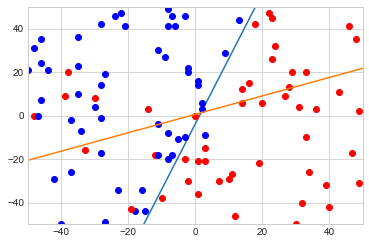

In [337]:
print("Final w:",w)
print("Final hypothesis: x2 = ",-w[1]/w[2],"x1 -",w[0]/w[2])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.plot(x,a*x+b)
for i in range(100):
    if(y[i]==1):
        plt.plot(x1[i],x2[i],'o',color='blue')
    else:
        plt.plot(x1[i],x2[i],'o',color='red')
plt.plot(x,-w[1]/w[2]*x-w[0]/w[2])

Final w hat: [-1, -45, 16]
Final pocket hypothesis: x2 =  2.8125 x1 - -0.0625


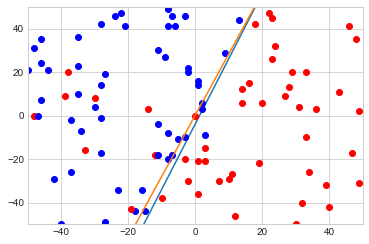

In [338]:
print("Final w hat:",w_pocket)
print("Final pocket hypothesis: x2 = ",-w_pocket[1]/w_pocket[2],"x1 -",w_pocket[0]/w_pocket[2])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.plot(x,a*x+b)
for i in range(100):
    if(y[i]==1):
        plt.plot(x1[i],x2[i],'o',color='blue')
    else:
        plt.plot(x1[i],x2[i],'o',color='red')
plt.plot(x,-w_pocket[1]/w_pocket[2]*x-w_pocket[0]/w_pocket[2])

E_in(w):  [1118, 791, 727, 788, 585, 512, 644, 711, 645, 676, 572, 695, 752, 507, 574, 538, 646, 610, 791, 784, 708, 630, 747, 640, 552, 579, 570, 577, 674, 642, 588, 606, 669, 708, 773, 729, 669, 580, 573, 475, 542, 728, 592, 593, 643, 675, 553, 616, 849, 580, 603, 511, 754, 612, 591, 584, 614, 521, 599, 554, 562, 645, 638, 668, 569, 600, 613, 547, 686, 480, 678, 498, 642, 541, 652, 554, 611, 619, 665, 635, 612, 546, 536, 666, 493, 596, 540, 464, 562, 648, 648, 521, 603, 697, 607, 552, 548, 538, 629, 772, 585, 539, 627, 693, 730, 593, 618, 696, 755, 696, 608, 657, 537, 638, 636, 549, 629, 673, 607, 743, 677, 720, 795, 609, 820, 729, 663, 555, 787, 627, 587, 538, 661, 628, 590, 669, 618, 562, 600, 544, 594, 671, 557, 550, 816, 706, 747, 656, 637, 668, 597, 664, 748, 671, 648, 573, 764, 720, 746, 625, 719, 707, 641, 569, 506, 506, 603, 569, 517, 545, 580, 645, 599, 677, 528, 553, 555, 582, 608, 473, 651, 515, 550, 717, 693, 586, 560, 497, 553, 711, 675, 635, 602, 538, 587, 648, 650, 515

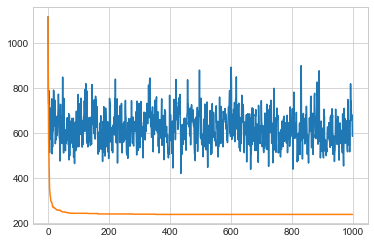

In [339]:
print("E_in(w): ", e_in)
print("E_in(w hat): ",e_in_pocket)
plt.plot(e_in)
plt.plot(e_in_pocket)
plt.show()

E_out(w):  [11321, 7099, 6193, 6864, 3656, 3100, 4850, 5673, 4759, 5460, 4180, 5403, 6488, 3456, 3887, 3439, 4719, 4769, 6685, 6649, 6401, 4756, 6947, 5256, 3807, 4177, 4207, 4153, 5159, 5002, 4165, 4447, 5437, 5874, 6769, 5917, 5282, 4113, 3911, 2346, 3549, 6161, 4234, 3893, 4680, 5378, 3631, 4660, 7753, 4430, 3956, 3591, 6625, 4361, 4152, 4187, 4504, 3222, 4025, 3547, 3884, 5131, 4676, 5522, 3715, 4326, 4417, 3833, 5742, 2998, 5745, 3343, 4997, 3821, 5120, 4222, 4229, 4663, 5641, 4470, 4620, 3617, 3646, 5349, 3143, 4392, 3427, 2825, 4189, 5247, 5274, 3526, 4332, 5574, 4230, 3598, 3708, 3612, 5135, 7181, 4322, 3154, 4987, 5661, 6047, 4514, 4483, 5517, 6668, 5883, 4313, 4984, 3665, 5065, 4966, 3582, 4471, 5385, 4466, 6291, 5443, 5972, 7100, 4781, 7223, 6028, 5104, 3528, 7037, 5102, 4511, 3857, 5195, 4351, 4419, 5512, 4951, 3872, 4572, 3125, 4021, 5406, 3811, 4029, 7339, 5736, 6520, 5374, 5181, 5070, 4587, 5388, 6437, 5310, 5426, 4122, 6724, 6057, 6526, 4859, 6178, 6245, 4593, 4187, 299

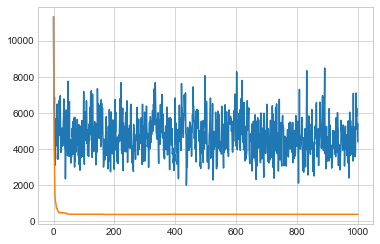

In [340]:
print("E_out(w): ", e_out)
print("E_out(w hat): ",e_out_pocket)
plt.plot(e_out)
plt.plot(e_out_pocket)
plt.show()